# 사전 세팅

In [1]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/likelion_CoronaCosumePattern_project1/data/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/likelion_CoronaCosumePattern_project1/data/'

Mounted at /gdrive
 신한카드_코로나19_카드이용건수
'서울시 코로나19 확진자 현황.csv'
 신한카드_코로나19_카드이용건수.xlsx
 covid-19-data-master
' 한국문화관광연구원_소비자동향지수 현황(지출항목별 CSI).csv'
'한국문화관광연구원_소비자동향지수 전망(지출항목별 CSI).csv'
'한국문화관광연구원_문화체육관광 소비자물가지수.csv'
 new_cases_by_quater.csv
'South Korea Vaccinations.csv'
 서울특별시_소비자_물가지수.txt


In [2]:
# 한글 폰트 적용
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import randn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 사용 데이터
 * 한국문화관광연구원_소비자동향지수 현황(지출항목별 CSI).csv

 * 한국문화관광연구원_소비자동향지수 전망(지출항목별 CSI).csv

 * new_cases_by_quater.csv

 * South Korea Vaccinations.csv
 

##1. 한국문화관광연구원_소비자동향지수 현황(지출항목별 CSI)

In [4]:
temp_consumer_df = pd.read_csv('/gdrive/MyDrive/likelion_CoronaCosumePattern_project1/data/ 한국문화관광연구원_소비자동향지수 현황(지출항목별 CSI).csv', encoding='utf-16', delimiter='\t', index_col='세부항목')
display(temp_consumer_df.info())
display(temp_consumer_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 전체 to 600만원 이상
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   분류          253 non-null    object 
 1   항목          253 non-null    object 
 2   2020년 04분기  240 non-null    float64
 3   2020년 03분기  239 non-null    float64
 4   2020년 02분기  238 non-null    float64
 5   2020년 01분기  240 non-null    float64
 6   2019년 04분기  240 non-null    float64
 7   2019년 03분기  240 non-null    float64
 8   2019년 02분기  240 non-null    float64
 9   2019년 01분기  240 non-null    float64
 10  2018년 04분기  240 non-null    float64
 11  2018년 03분기  240 non-null    float64
 12  2018년 02분기  240 non-null    float64
 13  2018년 01분기  240 non-null    float64
 14  2017년 04분기  240 non-null    float64
 15  2017년 03분기  240 non-null    float64
 16  2017년 02분기  208 non-null    float64
 17  2017년 01분기  208 non-null    float64
 18  2016년 04분기  208 non-null    float64
 19  2016년 03분기  208 non-null    

None

,분류,항목,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기,2017년 04분기,2017년 03분기,2017년 02분기,2017년 01분기,2016년 04분기,2016년 03분기,2016년 02분기,2016년 01분기,2015년 04분기,2015년 03분기,2015년 02분기,2015년 01분기,2014년 04분기,2014년 03분기,2014년 02분기,2014년 01분기,2013년 04분기,2013년 03분기,2013년 02분기
세부항목,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
전체,오프라인 문화생활비,전체,66.4,70.7,67.7,64.0,96.2,95.0,96.0,90.1,93.7,97.7,96.2,91.9,97.2,97.1,95.5,92.8,90.1,99.9,95.1,89.3,98.4,100.8,87.5,91.0,93.0,92.5,99.4,100.5,96.1,98.6,100.7
20대,오프라인 문화생활비,가구주연령,67.5,63.8,56.8,55.8,96.5,95.7,97.2,89.6,98.4,100.2,102.4,100.5,100.1,91.9,93.0,91.1,103.9,99.5,99.1,94.7,104.7,100.0,99.9,93.1,95.9,84.8,92.3,88.7,98.3,91.8,99.9
30대,오프라인 문화생활비,가구주연령,57.5,60.8,61.4,57.2,93.4,93.2,97.1,88.4,95.9,96.0,97.4,86.4,95.6,94.7,97.7,90.2,88.0,100.3,93.5,86.8,92.1,98.0,84.4,90.5,88.3,89.1,85.2,85.5,91.4,93.2,91.5
40대,오프라인 문화생활비,가구주연령,61.0,64.9,59.9,53.2,101.8,94.9,97.4,89.1,91.0,98.5,96.3,90.2,98.9,98.8,92.1,92.8,86.0,98.2,93.8,84.4,99.5,99.7,83.8,86.5,92.7,93.2,87.5,91.3,89.6,92.8,89.9
50대,오프라인 문화생활비,가구주연령,66.4,70.8,65.7,63.4,94.4,94.7,94.8,87.9,92.9,97.7,93.8,92.5,97.8,97.5,96.6,92.2,89.8,100.9,94.2,89.7,98.9,104.1,86.4,92.7,94.0,93.7,90.0,93.7,90.4,93.7,88.8


### 1-1 각 항목 별로 분류 
* 가구주연령 : family_age_df

* 가구원 수 : family_num_df

* 월평균 가구 소득 : family_income_df

* 세부항목 : 오프라인 비용(off_), 해외 여행비(off_trip), 온라인 비용(on_), 오락용품 구입비(on_paly)

In [5]:
# 가구주 연령별
family_age_df = temp_consumer_df[temp_consumer_df['항목'] == '가구주연령']  # 가구주 연령으로 분류

family_age_off_df = family_age_df[family_age_df['분류'] == '오프라인 문화생활비'] # 가구주 연령 중 오프라인 문화생활비만 추출
family_age_off_df = family_age_off_df.iloc[0:, 2:14]
display(family_age_off_df)

family_age_off_trip_df = family_age_df[family_age_df['분류'] == '해외 여행비'] # 가구주 연령 중 해외 여행비만 추출
family_age_off_trip_df = family_age_off_trip_df.iloc[0:, 2:14]
display(family_age_off_trip_df)

family_age_on_df = family_age_df[family_age_df['분류'] == '온라인 문화생활비']  # 가구주 연령 중  온라인 문화생활비만 추출
family_age_on_df = family_age_on_df.iloc[0:, 2:14]
display(family_age_on_df)

family_age_on_play_df = family_age_df[family_age_df['분류'] == '오락용품 구입비']  # 가구주 연령 중  오락용품 구입비만 추출
family_age_on_play_df = family_age_on_play_df.iloc[0:, 2:14]
display(family_age_on_play_df)


# 가구원 수
family_num_df = temp_consumer_df[temp_consumer_df['항목'] == '가구원 수']

family_num_off_df = family_num_df[family_num_df['분류'] == '오프라인 문화생활비'] # 가구원 수 중 오프라인 문화생활비만 추출
family_num_off_df = family_num_off_df.iloc[0:, 2:14]
display(family_num_off_df)

family_num_off_trip_df = family_num_df[family_num_df['분류'] == '해외 여행비'] # 가구원 수 중 해외 여행비만 추출
family_num_off_trip_df = family_num_off_trip_df.iloc[0:, 2:14]
display(family_num_off_trip_df)

family_num_on_df = family_num_df[family_num_df['분류'] == '온라인 문화생활비']  # 가구원 수 중 온라인 문화생활비만 추출
family_num_on_df = family_num_on_df.iloc[0:, 2:14]
display(family_num_on_df)

family_num_on_play_df = family_num_df[family_num_df['분류'] == '오락용품 구입비']  # 가구원 수 중 오락용품 구입비만 추출
family_num_on_play_df = family_num_on_play_df.iloc[0:, 2:14]
display(family_num_on_play_df)


# 월평균 가구 소득
family_income_df = temp_consumer_df[temp_consumer_df['항목'] == '월평균 가구 소득']
family_income_df.fillna(method='ffill', inplace=True)

family_income_off_df = family_income_df[family_income_df['분류'] == '오프라인 문화생활비'] # 월평균 가구 소득중 오프라인 문화생활비만 추출
family_income_off_df = family_income_off_df.iloc[0:, 2:14]
display(family_income_off_df)

family_income_off_trip_df = family_income_df[family_income_df['분류'] == '해외 여행비'] # 월평균 가구 소득중 해외 여행비만 추출
family_income_off_trip_df = family_income_off_trip_df.iloc[0:, 2:14]
display(family_income_off_trip_df)

family_income_on_df = family_income_df[family_income_df['분류'] == '온라인 문화생활비']  # 월평균 가구 소득중  온라인 문화생활비만 추출
family_income_on_df = family_income_on_df.iloc[0:, 2:14]
display(family_income_on_df)

family_income_on_play_df = family_income_df[family_income_df['분류'] == '오락용품 구입비']  # 월평균 가구 소득중  오락용품 구입비만 추출
family_income_on_play_df = family_income_on_play_df.iloc[0:, 2:14]
display(family_income_on_play_df)




,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
20대,67.5,63.8,56.8,55.8,96.5,95.7,97.2,89.6,98.4,100.2,102.4,100.5
30대,57.5,60.8,61.4,57.2,93.4,93.2,97.1,88.4,95.9,96.0,97.4,86.4
40대,61.0,64.9,59.9,53.2,101.8,94.9,97.4,89.1,91.0,98.5,96.3,90.2
50대,66.4,70.8,65.7,63.4,94.4,94.7,94.8,87.9,92.9,97.7,93.8,92.5
60대 이상,79.5,88.2,88.7,86.1,94.4,96.9,94.4,95.8,94.0,97.1,95.7,94.9


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
20대,85.8,94.2,83.9,83.2,96.6,98.6,101.2,101.7,102.5,105.2,104.7,101.8
30대,80.3,85.4,79.3,78.8,88.6,100.2,98.9,100.1,95.7,103.2,102.8,102.4
40대,85.5,89.7,84.9,76.7,98.4,99.9,99.2,102.4,99.6,102.7,102.3,101.4
50대,85.8,90.5,86.0,79.1,96.4,94.5,98.6,103.0,97.7,103.1,101.8,103.9
60대 이상,91.1,94.8,94.4,91.9,97.0,98.0,100.6,99.9,98.9,99.6,105.7,98.7


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
20대,120.8,114.1,NaN,116.5,110.4,106.1,104.2,109.7,104.3,105.3,107.6,108.3
30대,118.3,117.4,113.9,104.4,101.1,105.2,102.1,101.6,104.9,102.1,101.7,99.5
40대,114.1,115.5,110.9,108.0,102.9,102.2,99.8,100.2,99.7,102.0,102.2,103.8
50대,104.7,107.2,107.9,100.4,100.6,102.1,100.8,98.9,99.6,99.6,100.4,100.0
60대 이상,98.9,99.8,99.5,97.6,96.8,99.8,99.3,99.2,99.4,99.0,100.7,100.5


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
20대,105.8,104.3,99.4,97.1,99.8,98.8,97.5,99.2,104.2,100.5,99.1,100.0
30대,117.1,114.4,111.5,105.7,106.3,103.5,103.3,107.7,111.2,104.5,109.6,106.9
40대,102.8,105.8,107.3,103.2,104.9,95.7,103.0,98.7,105.3,99.3,104.6,99.4
50대,95.8,100.1,100.4,96.8,96.4,97.0,97.1,98.1,95.2,98.2,98.9,98.1
60대 이상,96.5,98.3,101.6,99.0,94.8,99.9,99.3,101.0,102.2,99.8,101.8,99.8


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
1인 가구,69.9,75.8,71.1,71.7,95.2,95.9,97.9,90.7,98.9,96.8,98.7,96.0
2-3인 가구,67.4,72.0,69.5,64.0,96.6,94.9,94.5,90.6,91.9,98.1,94.4,90.4
4인 이상 가구,60.2,61.6,59.4,54.2,96.7,94.3,96.9,88.1,91.3,97.8,96.8,90.2


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
1인 가구,88.2,92.2,88.3,87.9,94.3,98.5,99.7,100.5,95.9,101.7,100.6,99.9
2-3인 가구,85.6,91.5,86.0,80.1,95.7,97.7,100.0,102.6,98.6,103.9,103.8,102.0
4인 이상 가구,83.7,86.9,83.9,76.7,97.2,97.9,97.9,100.7,100.9,100.6,104.7,103.5


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
1인 가구,109.7,111.1,109.8,104.2,104.2,104.0,101.2,102.5,102.3,102.7,102.6,103.6
2-3인 가구,109.1,106.1,107.4,102.4,99.2,101.9,100.4,99.8,99.6,100.6,101.0,100.9
4인 이상 가구,110.5,117.0,111.4,106.1,102.4,102.2,101.0,100.4,102.1,99.9,102.4,101.0


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
1인 가구,100.2,100.1,101.5,96.7,97.0,96.6,98.5,99.4,100.1,98.7,99.1,99.7
2-3인 가구,101.7,104.2,105.3,101.6,100.5,99.4,100.1,102.2,102.8,100.0,103.2,100.8
4인 이상 가구,106.0,108.3,105.4,102.7,103.8,99.2,102.5,99.0,106.2,101.9,106.7,101.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
99만원 이하,81.7,87.8,84.7,85.1,93.0,96.3,96.9,96.7,96.6,98.2,96.6,99.3
100만원-199만원 이하,77.3,79.4,76.0,72.9,94.6,93.0,93.1,91.4,91.3,99.7,96.5,91.4
200만원-299만원 이하,68.2,70.2,69.5,65.6,90.0,93.2,93.3,86.8,94.7,94.7,98.4,94.7
300만원-399만원 이하,58.5,68.7,64.3,61.9,96.5,94.0,96.7,87.8,90.8,93.7,94.4,88.8
400만원-499만원 이하,59.8,62.5,63.9,59.7,98.4,95.4,93.4,91.9,95.0,97.4,96.4,90.3
500만원 이상,59.8,62.5,63.9,59.7,98.4,95.4,93.4,91.9,95.0,97.4,96.4,90.3
500만원-599만원 이하,63.1,61.2,56.9,63.0,96.2,97.2,97.7,88.9,93.2,102.6,91.2,88.6
600만원 이상,61.9,64.6,56.0,47.6,102.9,96.2,99.9,89.0,94.9,100.1,98.6,91.8


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
99만원 이하,90.6,97.7,95.2,92.5,89.8,94.5,98.6,99.8,95.8,102.2,99.4,97.5
100만원-199만원 이하,88.9,90.6,89.2,93.8,91.1,92.0,96.9,100.9,98.6,96.1,102.2,97.3
200만원-299만원 이하,89.6,88.2,90.3,82.7,92.3,97.6,98.0,99.0,96.5,97.4,102.3,100.5
300만원-399만원 이하,80.1,87.9,87.2,82.4,98.0,96.2,97.5,99.0,98.9,104.3,100.9,97.5
400만원-499만원 이하,82.4,88.6,85.2,76.4,96.5,101.0,99.9,99.5,99.0,100.8,100.7,100.9
500만원-599만원 이하,88.1,90.5,81.8,82.6,99.7,98.7,99.5,103.1,98.4,106.4,104.7,108.2
600만원 이상,84.3,90.4,74.8,67.8,98.5,102.3,105.2,108.0,101.3,108.9,108.8,108.4


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
99만원 이하,100.7,105.7,103.6,102.7,97.5,101.5,98.4,98.6,100.4,100.4,101.7,101.0
100만원-199만원 이하,104.4,100.2,104.7,99.6,98.6,103.4,100.7,101.8,98.8,101.2,100.6,103.0
200만원-299만원 이하,109.7,106.0,105.0,100.9,99.7,100.7,100.0,96.7,98.4,100.7,102.4,102.3
300만원-399만원 이하,110.8,108.4,108.8,102.1,103.7,102.4,98.8,102.2,102.4,99.8,100.4,103.0
400만원-499만원 이하,114.7,115.6,111.9,104.1,102.0,100.8,101.6,101.9,101.2,102.3,102.5,98.6
500만원 이상,114.7,115.6,111.9,104.1,102.0,100.8,101.6,101.9,101.2,102.3,102.5,98.6
500만원-599만원 이하,108.5,117.5,109.2,105.7,105.0,105.0,100.6,99.2,101.1,102.0,101.7,99.2
600만원 이상,114.3,115.8,119.1,109.0,100.7,103.9,104.9,103.4,103.6,101.3,102.8,103.4


,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,
99만원 이하,95.2,99.4,99.2,99.2,94.9,97.6,97.6,100.2,99.3,99.2,99.5,99.1
100만원-199만원 이하,98.0,96.5,100.9,96.6,93.6,93.1,101.7,99.1,101.6,98.6,100.7,99.7
200만원-299만원 이하,104.1,100.8,103.1,98.7,99.4,98.9,98.8,98.5,103.3,99.9,101.6,100.1
300만원-399만원 이하,102.0,106.0,103.6,98.8,103.9,101.2,100.4,104.3,105.6,99.6,103.4,102.8
400만원-499만원 이하,102.9,107.1,108.9,100.0,102.7,97.2,100.1,102.2,104.0,100.3,106.4,98.4
500만원 이상,102.9,107.1,108.9,100.0,102.7,97.2,100.1,102.2,104.0,100.3,106.4,98.4
500만원-599만원 이하,102.7,108.9,108.6,100.5,103.7,96.9,99.5,100.0,104.0,102.1,104.0,101.0
600만원 이상,107.3,107.8,107.0,106.1,99.6,101.4,102.6,100.1,100.5,101.0,103.8,101.0


### 1-2 각 항목 별로 시각화
* 가구주연령 : family_age_df

* 가구원 수 : family_num_df

* 월평균 가구 소득 : family_income_df

* 세부항목 : 오프라인 비용(off_), 해외 여행비(off_trip), 온라인 비용(on_), 오락용품 구입비(on_paly)

In [6]:
import seaborn as sns
# 시각화 여러개 나오게 하기

figure, ((ax1,ax2,ax3, ax4), (ax5,ax6,ax7,ax8) , (ax9,ax10,ax11,ax12)) = plt.subplots(nrows = 3, ncols =4 )
figure.set_size_inches(70,30)

# 가구주연령별
ax1.set_title('가구주연령별(오프라인비용)', fontsize=20)
sns.lineplot(data = family_age_off_df.T, marker='o', linewidth=3, ax= ax1)
ax1.set_ylabel('CSI', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)

ax2.set_title('가구주연령별(해외 여행비)', fontsize=20)
sns.lineplot(data = family_age_off_trip_df.T, marker='o', linewidth=3, ax= ax2)
ax2.set_ylabel('CSI', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)

ax3.set_title('가구주연령별(온라인비용)', fontsize=20)
sns.lineplot(data = family_age_on_df.T, marker='o', linewidth=3, ax= ax3)
ax3.set_ylabel('CSI', fontsize=14)
ax3.set_xlabel('Date', fontsize=14)

ax4.set_title('가구주연령별(오락용품 구입비)', fontsize=20)
sns.lineplot(data = family_age_on_play_df.T, marker='o', linewidth=3, ax= ax4)
ax4.set_ylabel('CSI', fontsize=14)
ax4.set_xlabel('Date', fontsize=14)

# 가구원 수별

ax5.set_title('가구원 수(오프라인비용)', fontsize=20)
sns.lineplot(data = family_num_off_df.T, marker='o', linewidth=3, ax= ax5)
ax5.set_ylabel('CSI', fontsize=14)
ax5.set_xlabel('Date', fontsize=14)

ax6.set_title('가구원 수(해외 여행비)', fontsize=20)
sns.lineplot(data = family_num_off_trip_df.T, marker='o', linewidth=3, ax= ax6)
ax6.set_ylabel('CSI', fontsize=14)
ax6.set_xlabel('Date', fontsize=14)

ax7.set_title('가구원 수(온라인비용)', fontsize=20)
sns.lineplot(data = family_num_on_df.T, marker='o', linewidth=3, ax= ax7)
ax7.set_ylabel('CSI', fontsize=14)
ax7.set_xlabel('Date', fontsize=14)

ax8.set_title('가구원 수(오락용품 구입비)', fontsize=20)
sns.lineplot(data = family_num_on_play_df.T, marker='o', linewidth=3, ax= ax8)
ax8.set_ylabel('CSI', fontsize=14)
ax8.set_xlabel('Date', fontsize=14)

# 월평균 가구 소득

ax9.set_title('월평균 가구 소득(오프라인비용)', fontsize=20)
sns.lineplot(data = family_income_off_df.T, marker='o', linewidth=3, ax= ax9)
ax9.set_ylabel('CSI', fontsize=14)
ax9.set_xlabel('Date', fontsize=14)

ax10.set_title('월평균 가구 소득(해외 여행비)', fontsize=20)
sns.lineplot(data = family_income_off_trip_df.T, marker='o', linewidth=3, ax= ax10)
ax10.set_ylabel('CSI', fontsize=14)
ax10.set_xlabel('Date', fontsize=14)

ax11.set_title('월평균 가구 소득(온라인비용)', fontsize=20)
sns.lineplot(data = family_income_on_df.T, marker='o', linewidth=3, ax= ax11)
ax11.set_ylabel('CSI', fontsize=14)
ax11.set_xlabel('Date', fontsize=14)

ax12.set_title('월평균 가구 소득(오락용품 구입비)', fontsize=20)
sns.lineplot(data = family_income_on_play_df.T, marker='o', linewidth=3, ax= ax12)
ax12.set_ylabel('CSI', fontsize=14)
ax12.set_xlabel('Date', fontsize=14)

Output hidden; open in https://colab.research.google.com to view.

### 1-3 각 항목 별 히트맵
가구주연령 : family_age_df

가구원 수 : family_num_df

월평균 가구 소득 : family_income_df

세부항목 : 오프라인 비용(off_), 해외 여행비(off_trip), 온라인 비용(on_), 오락용품 구입비(on_paly)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 0.98, '월평균 가구 소득(오락용품 구입비)')

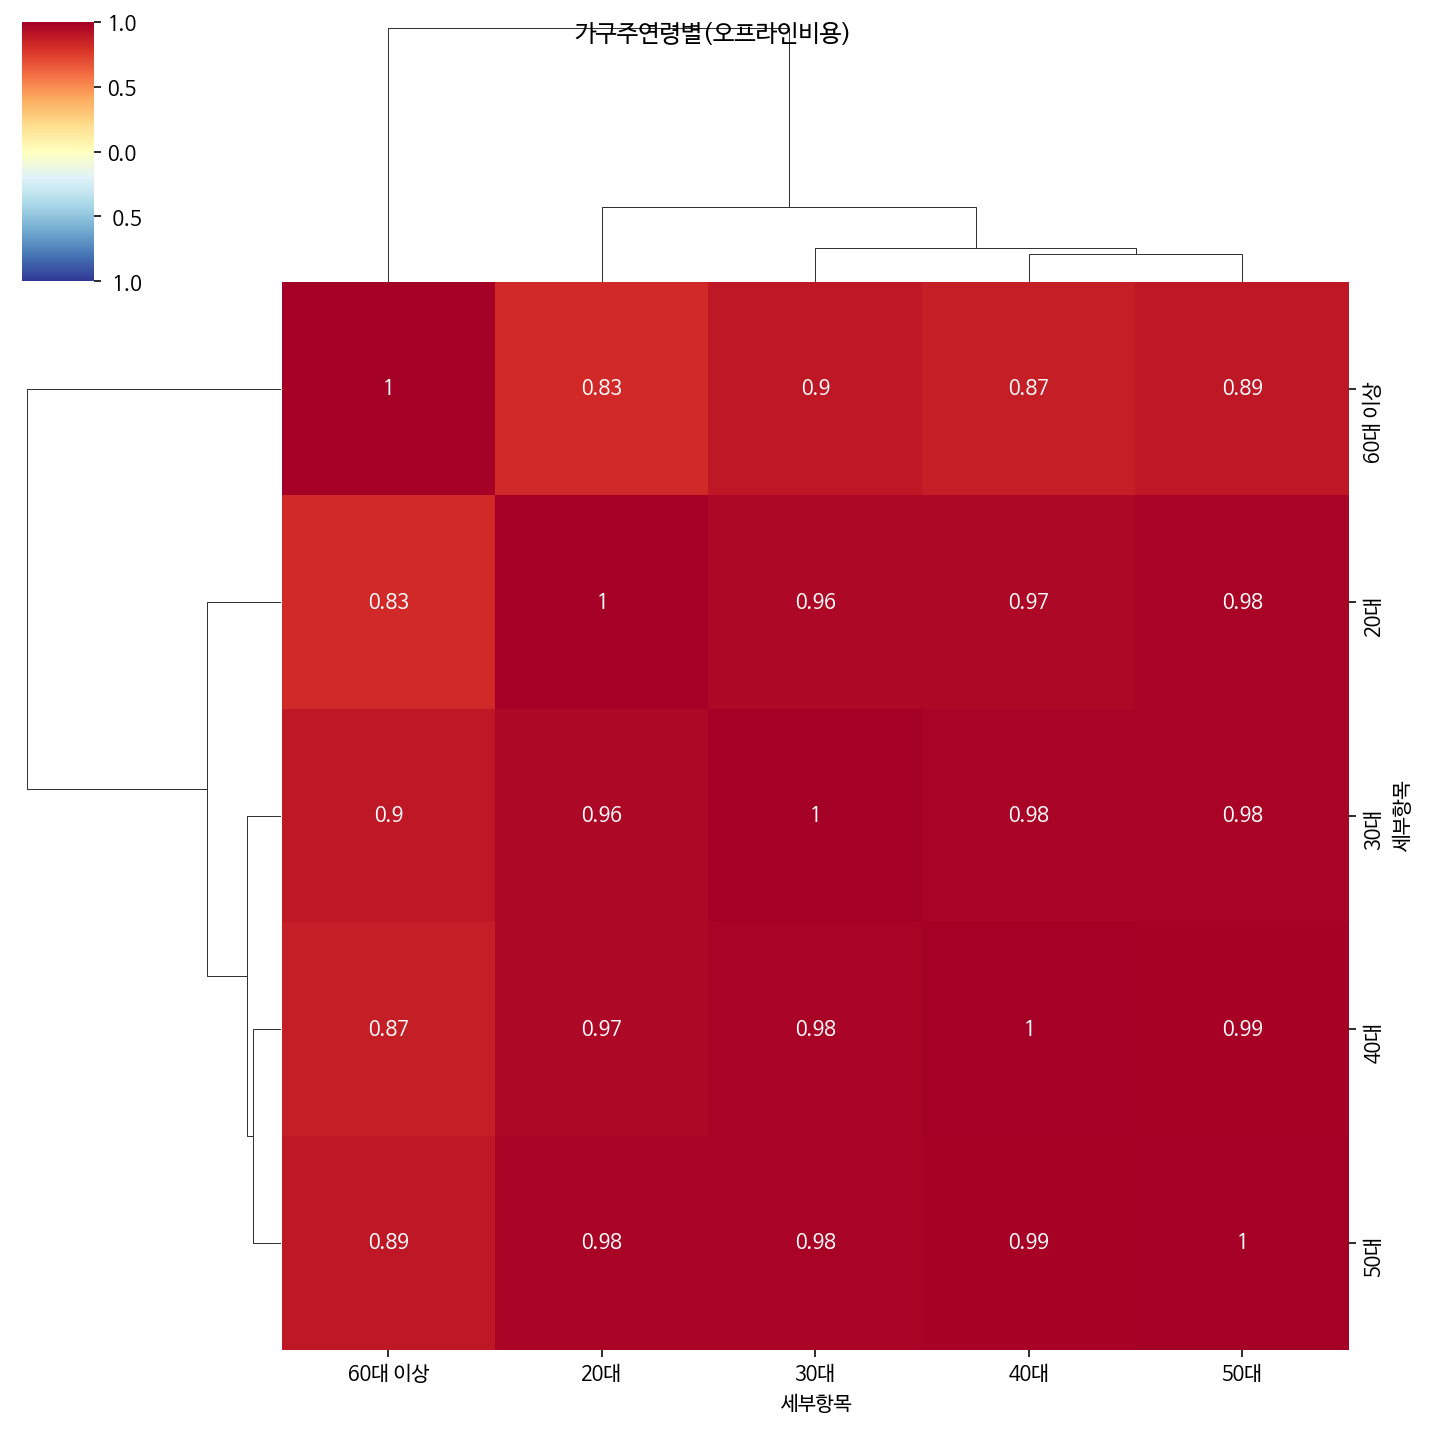

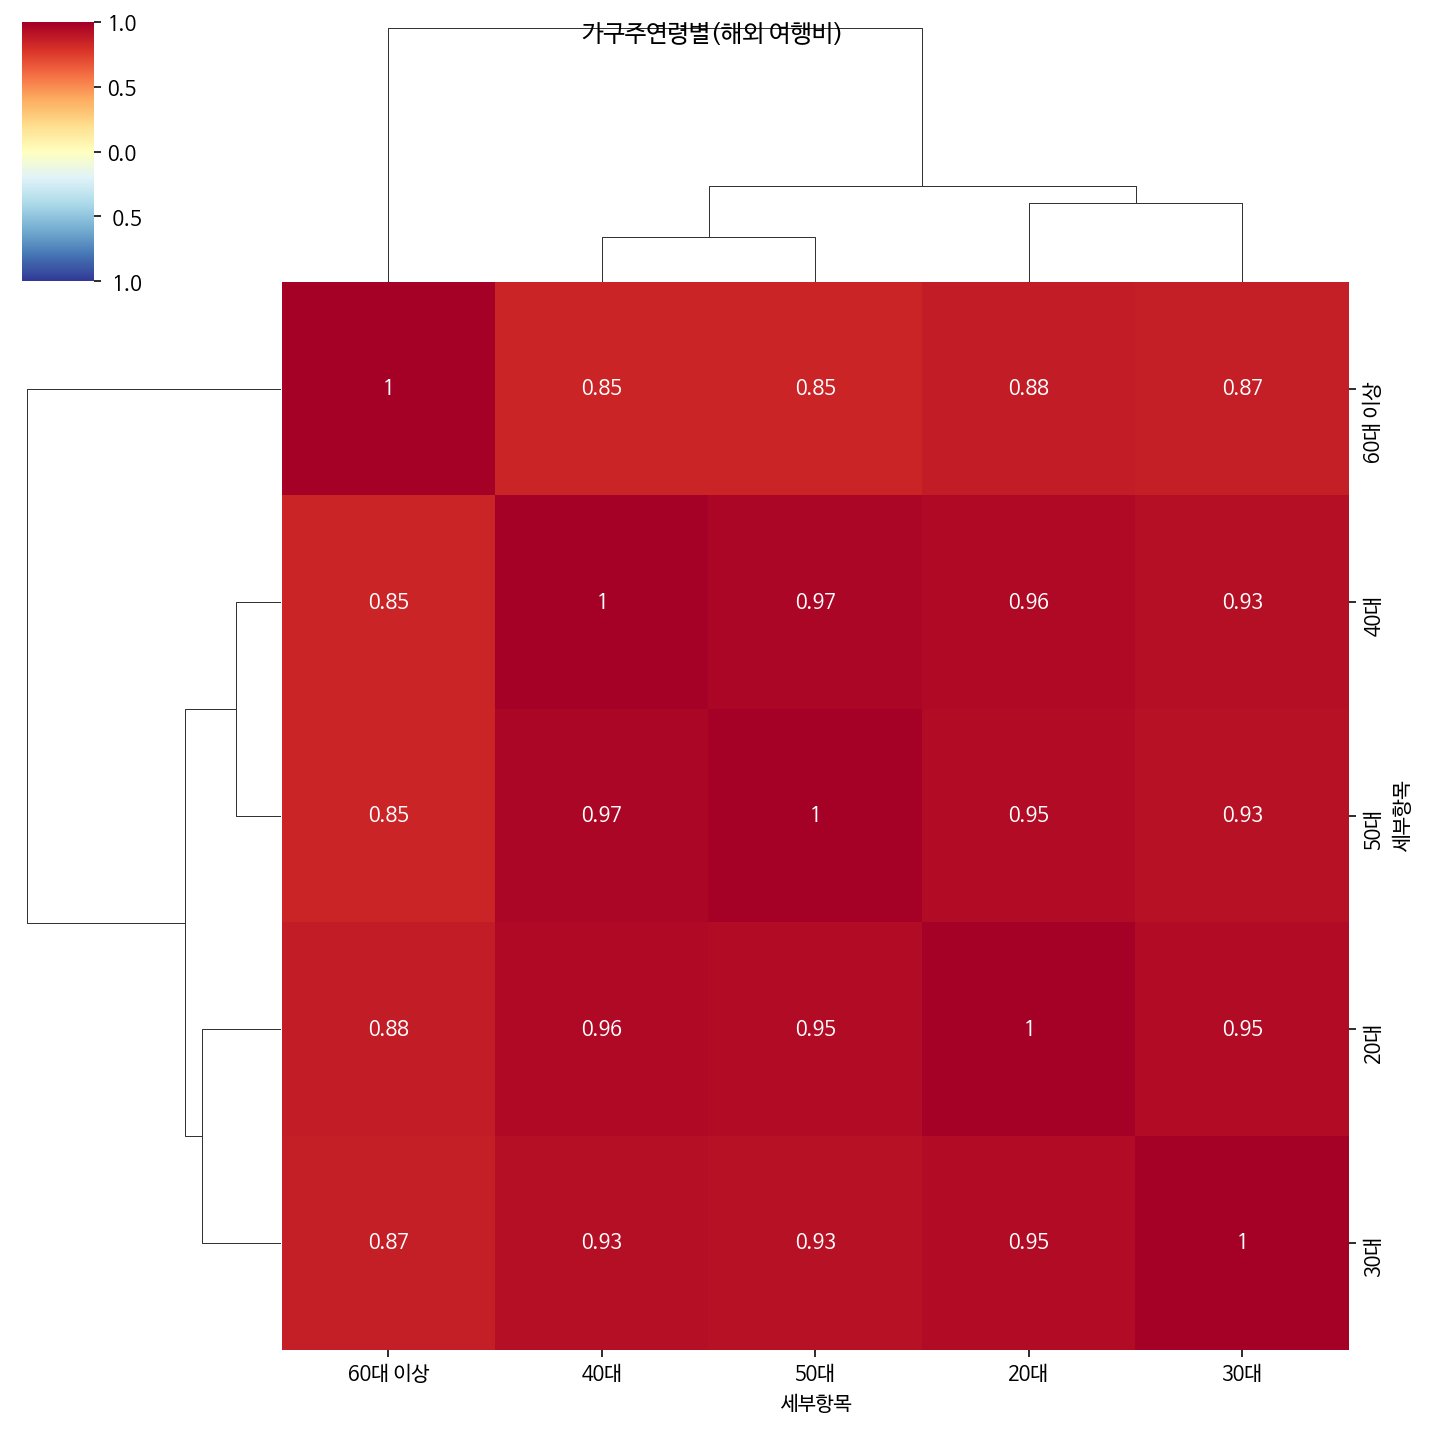

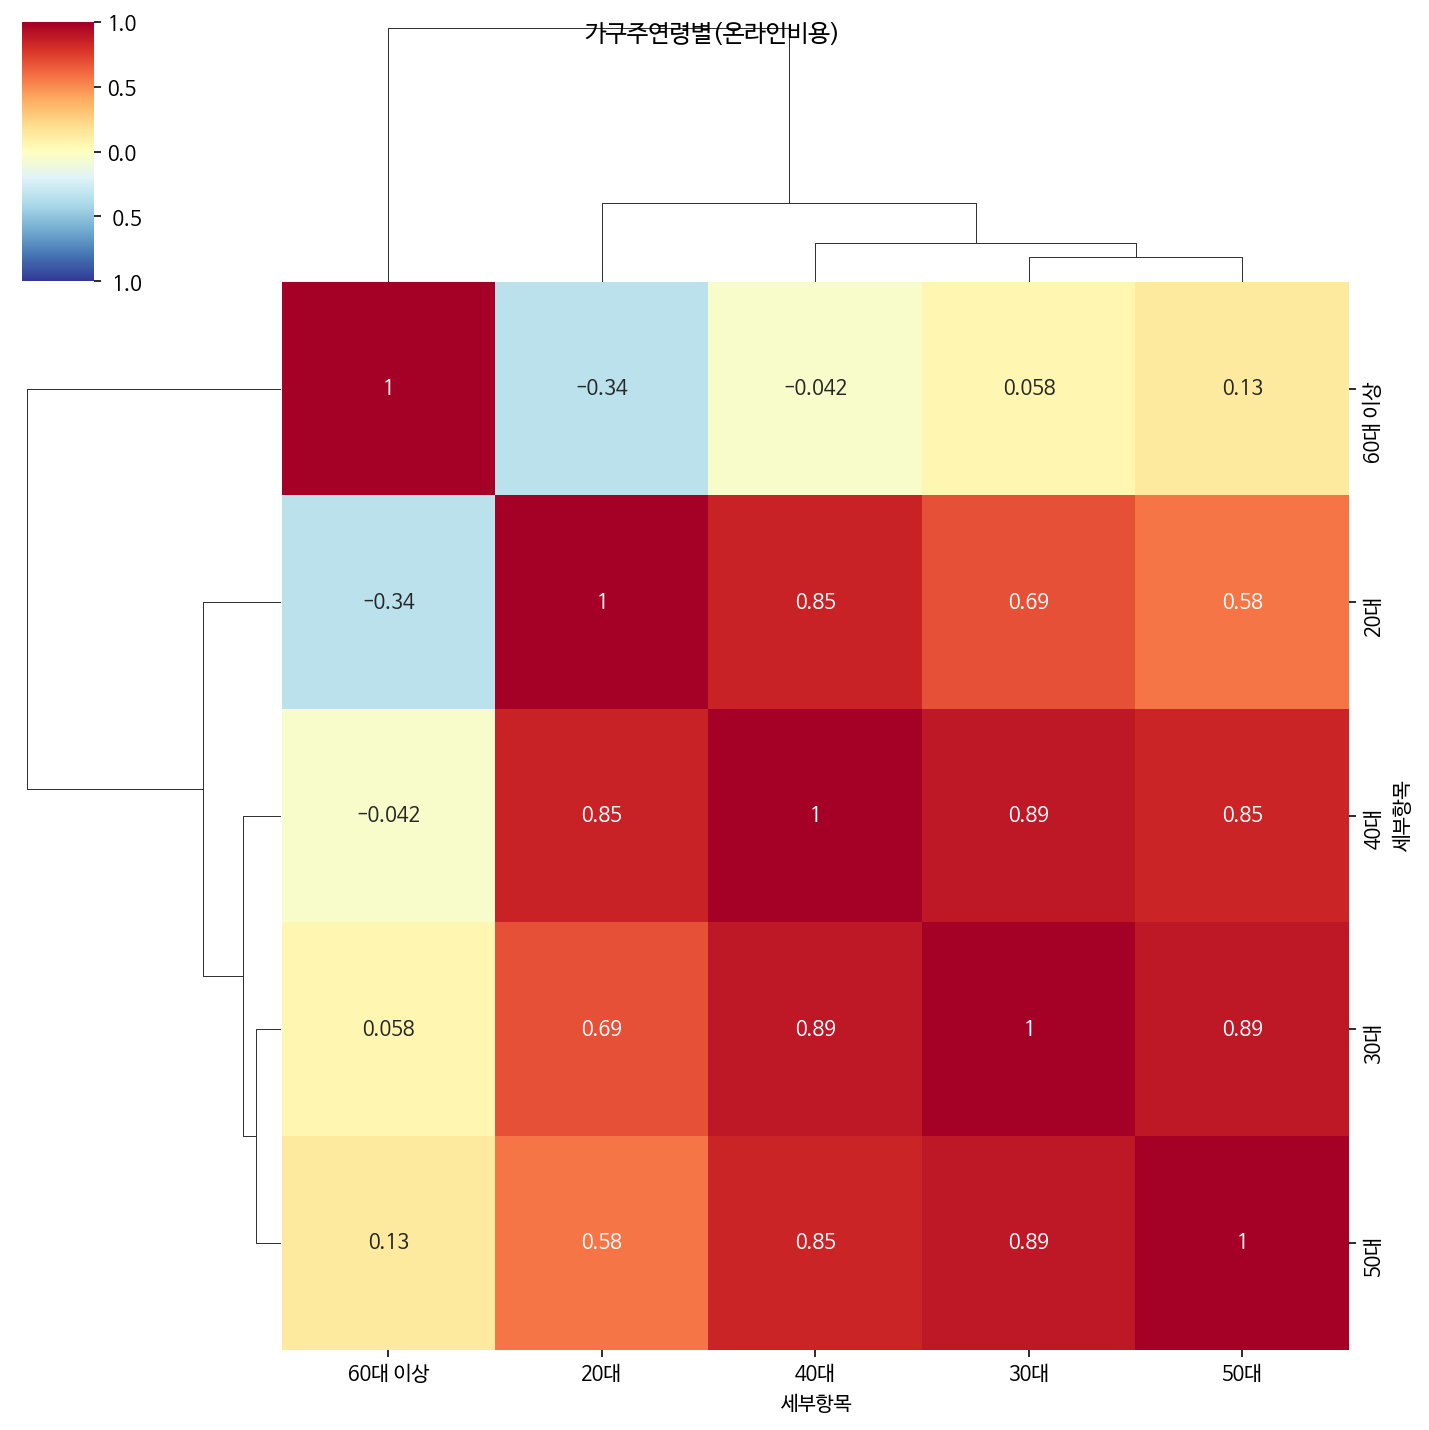

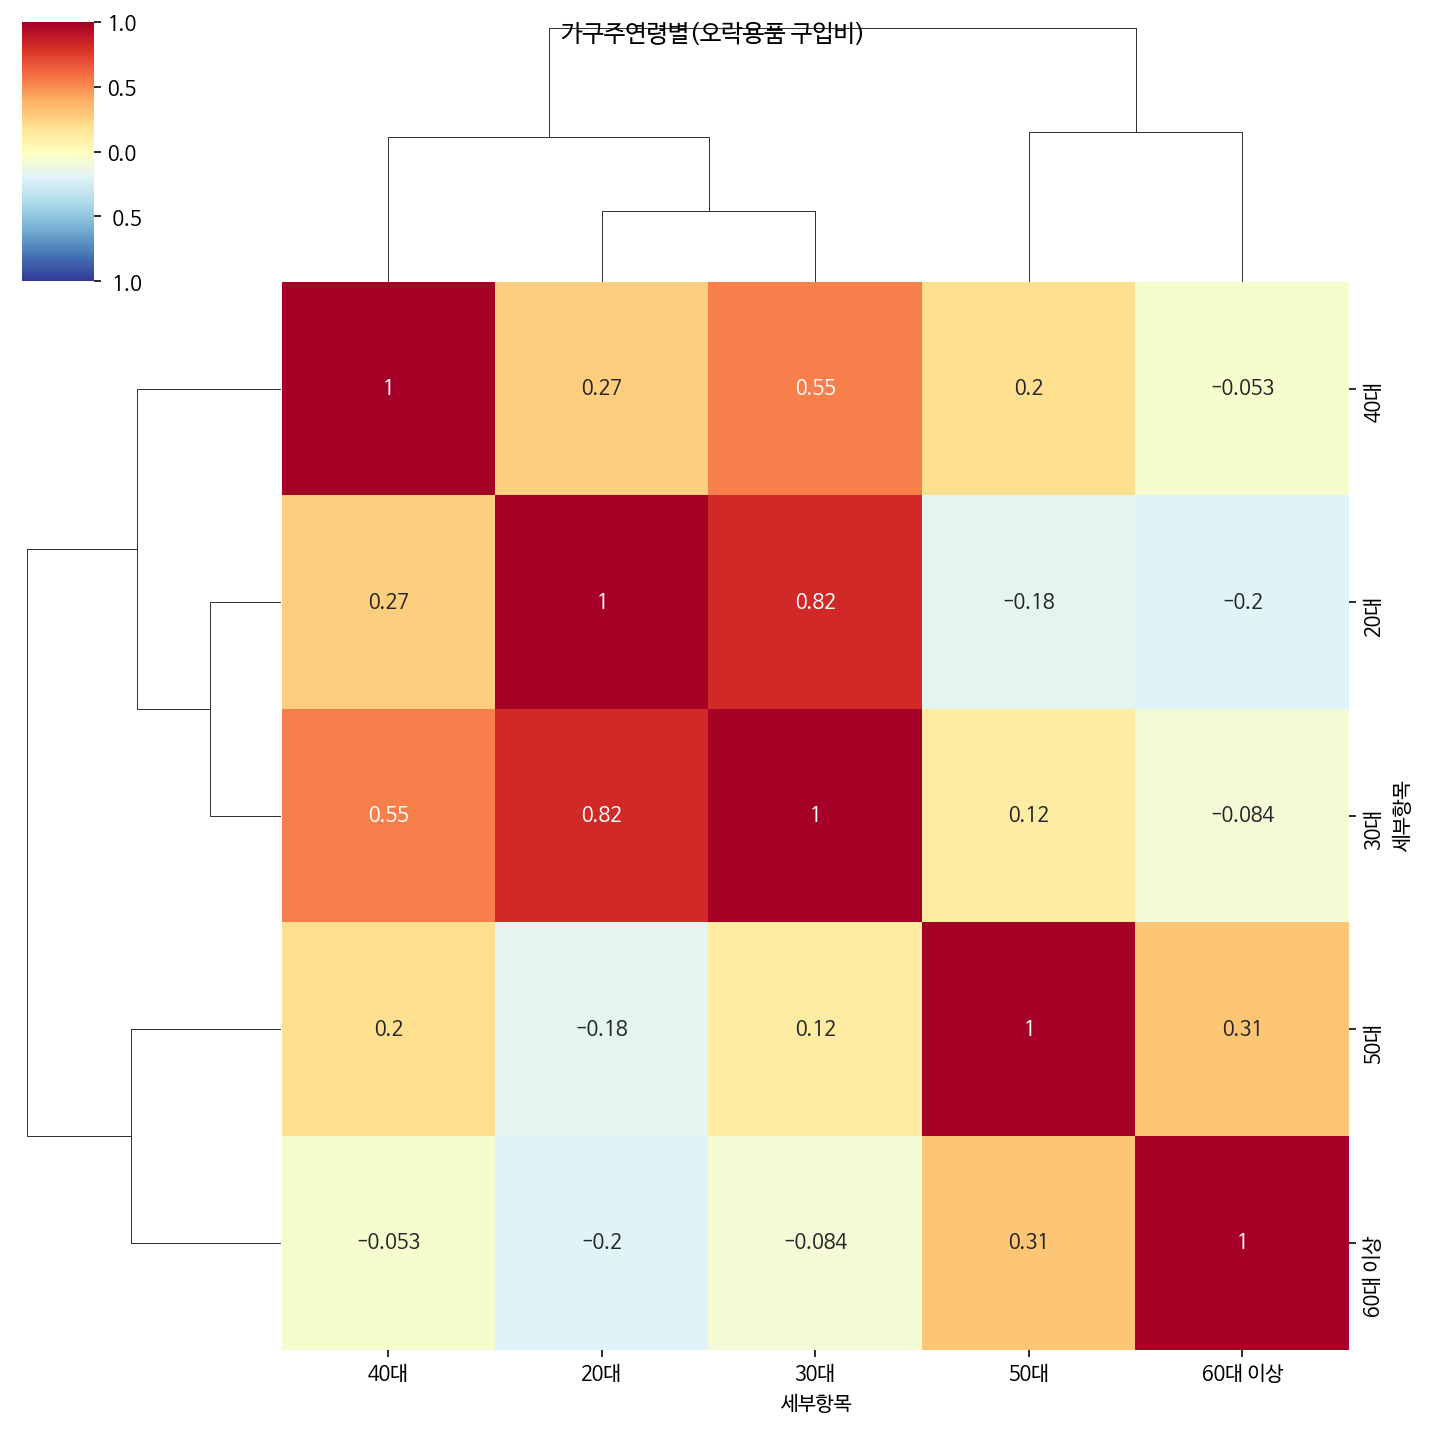

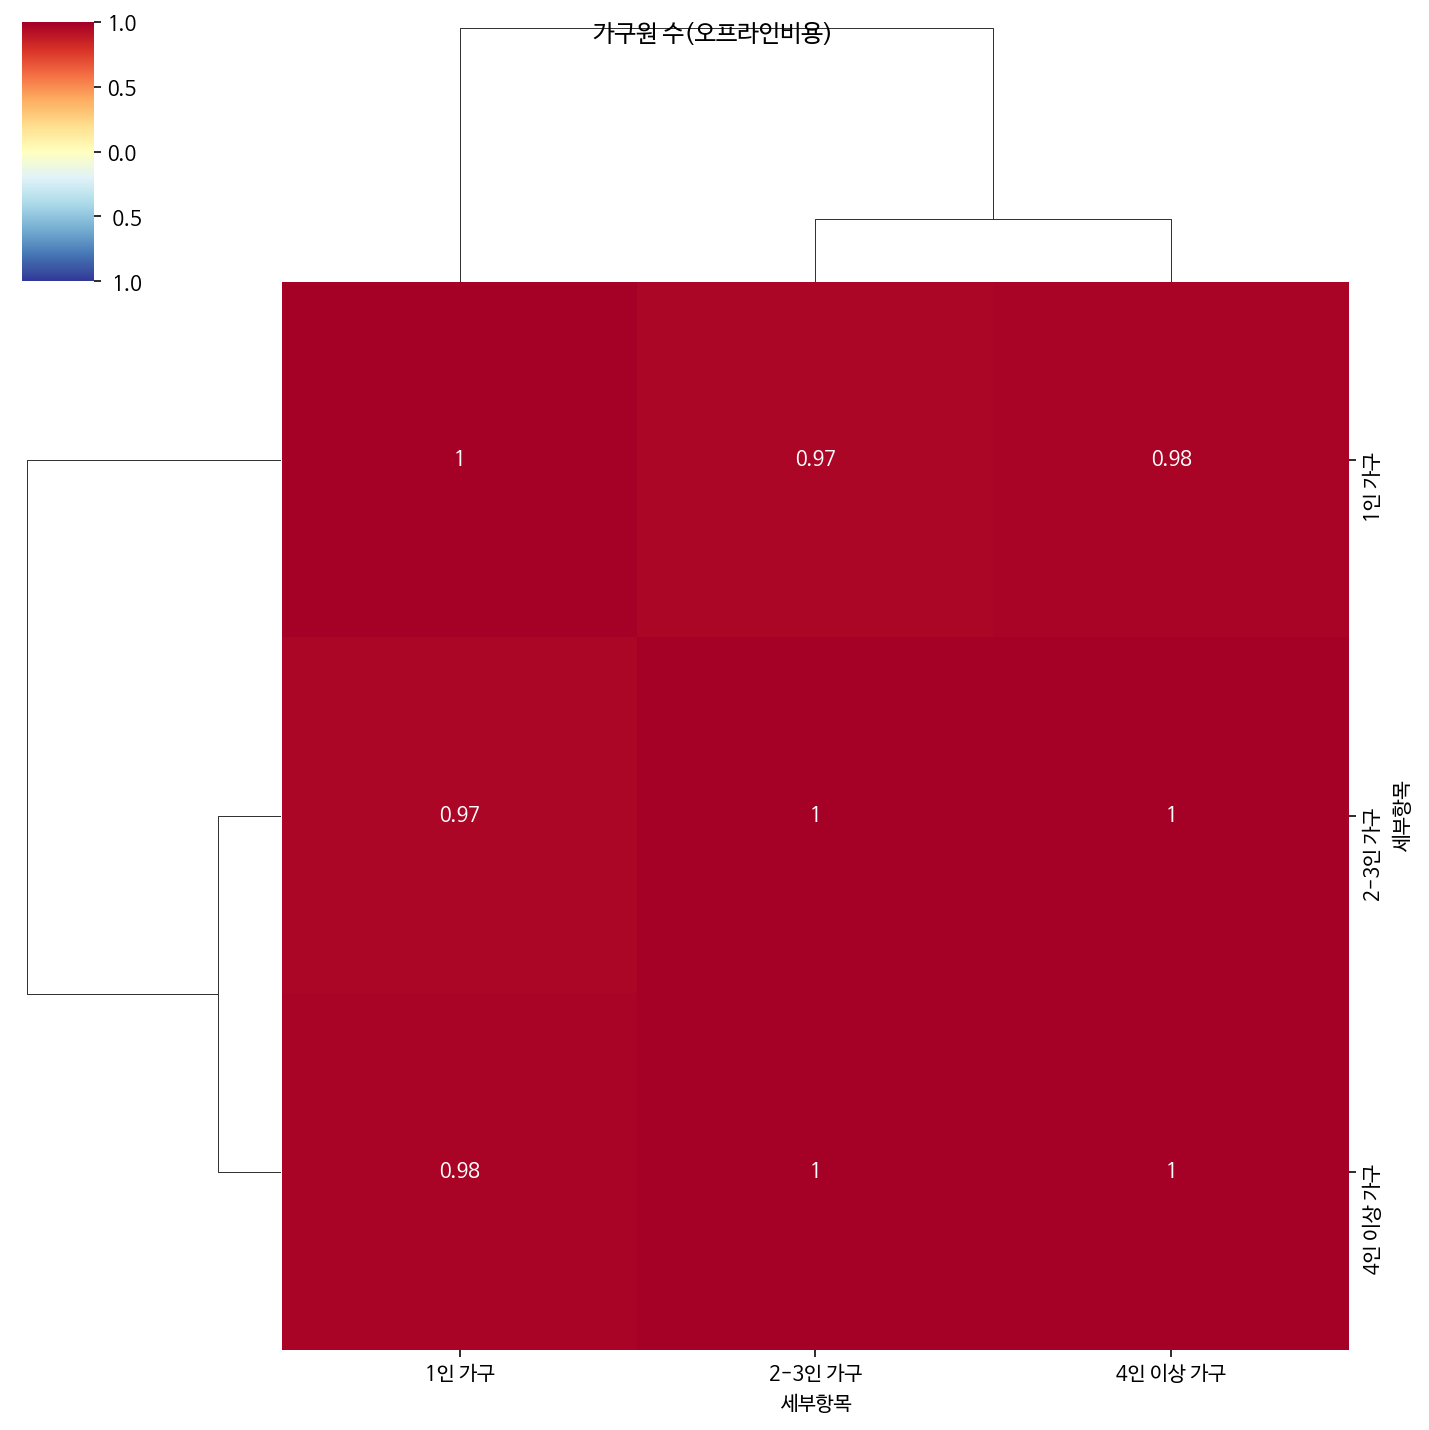

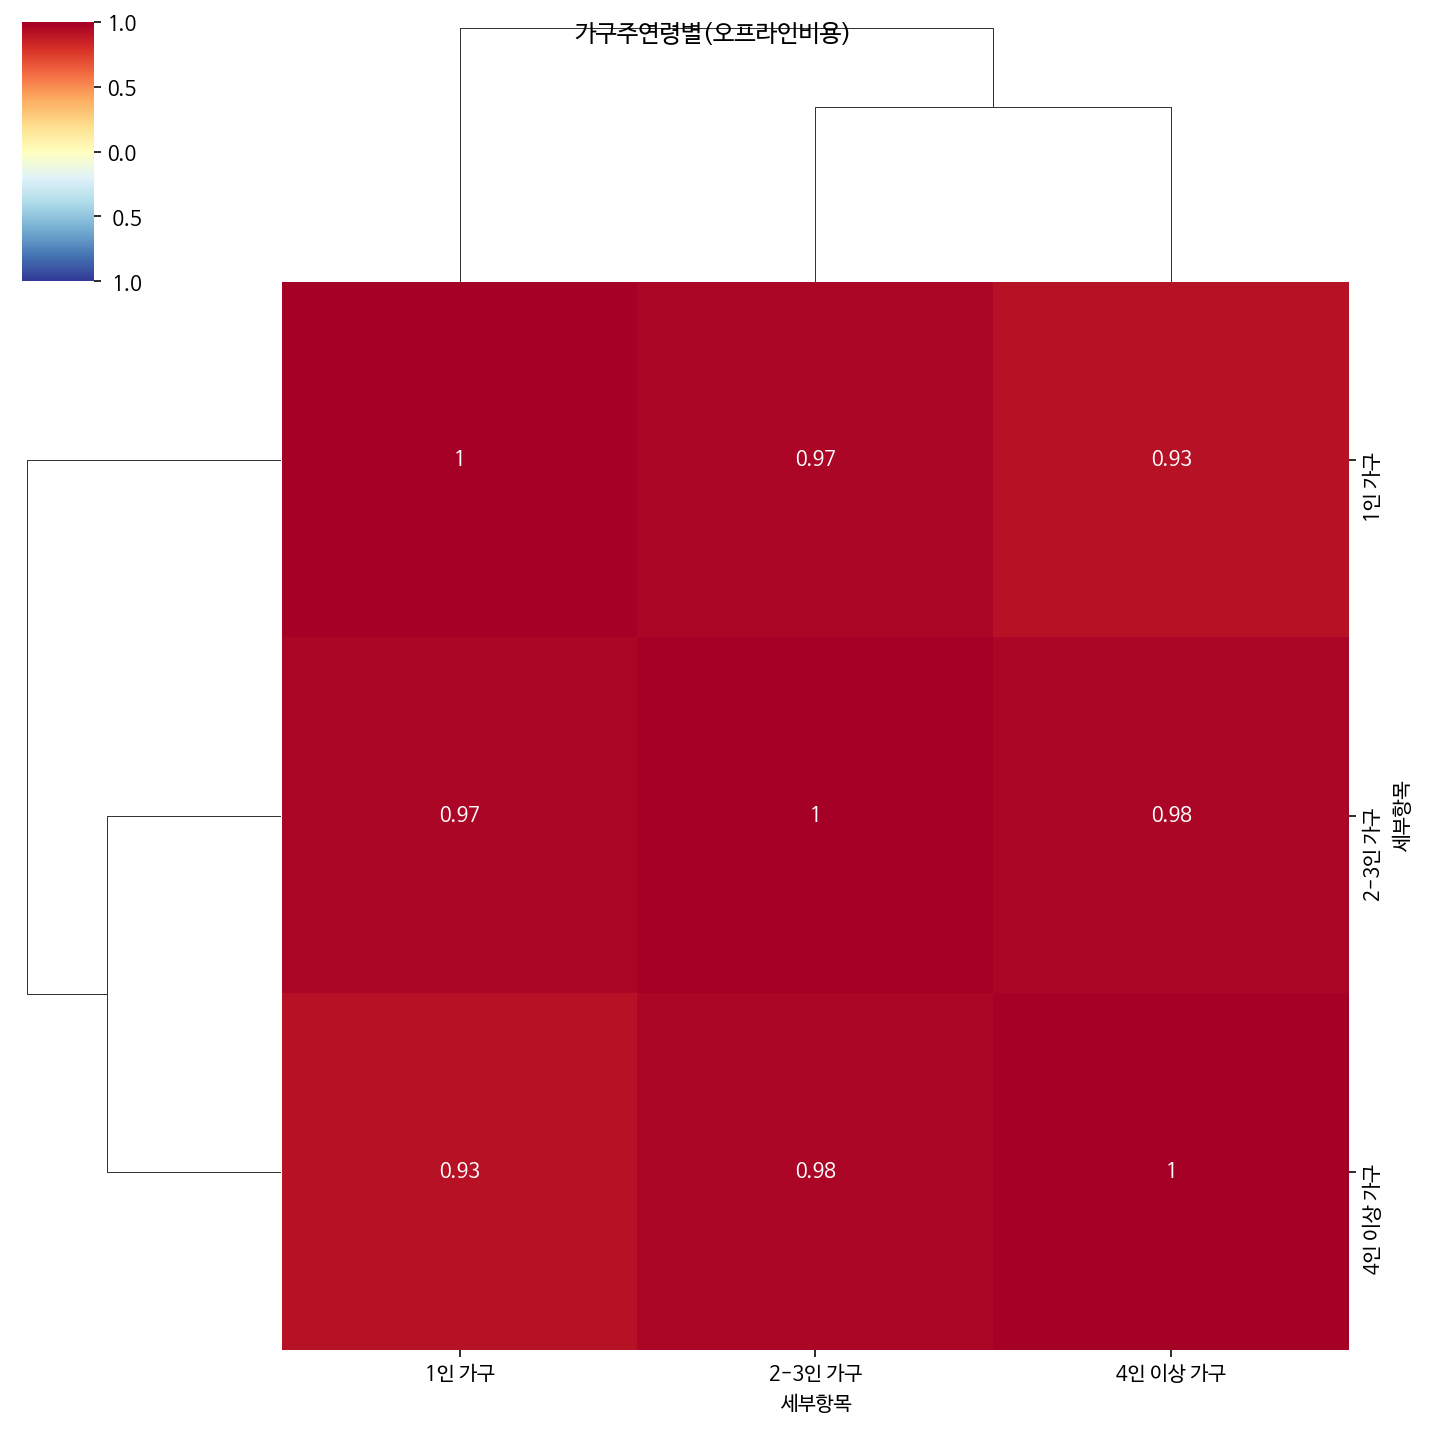

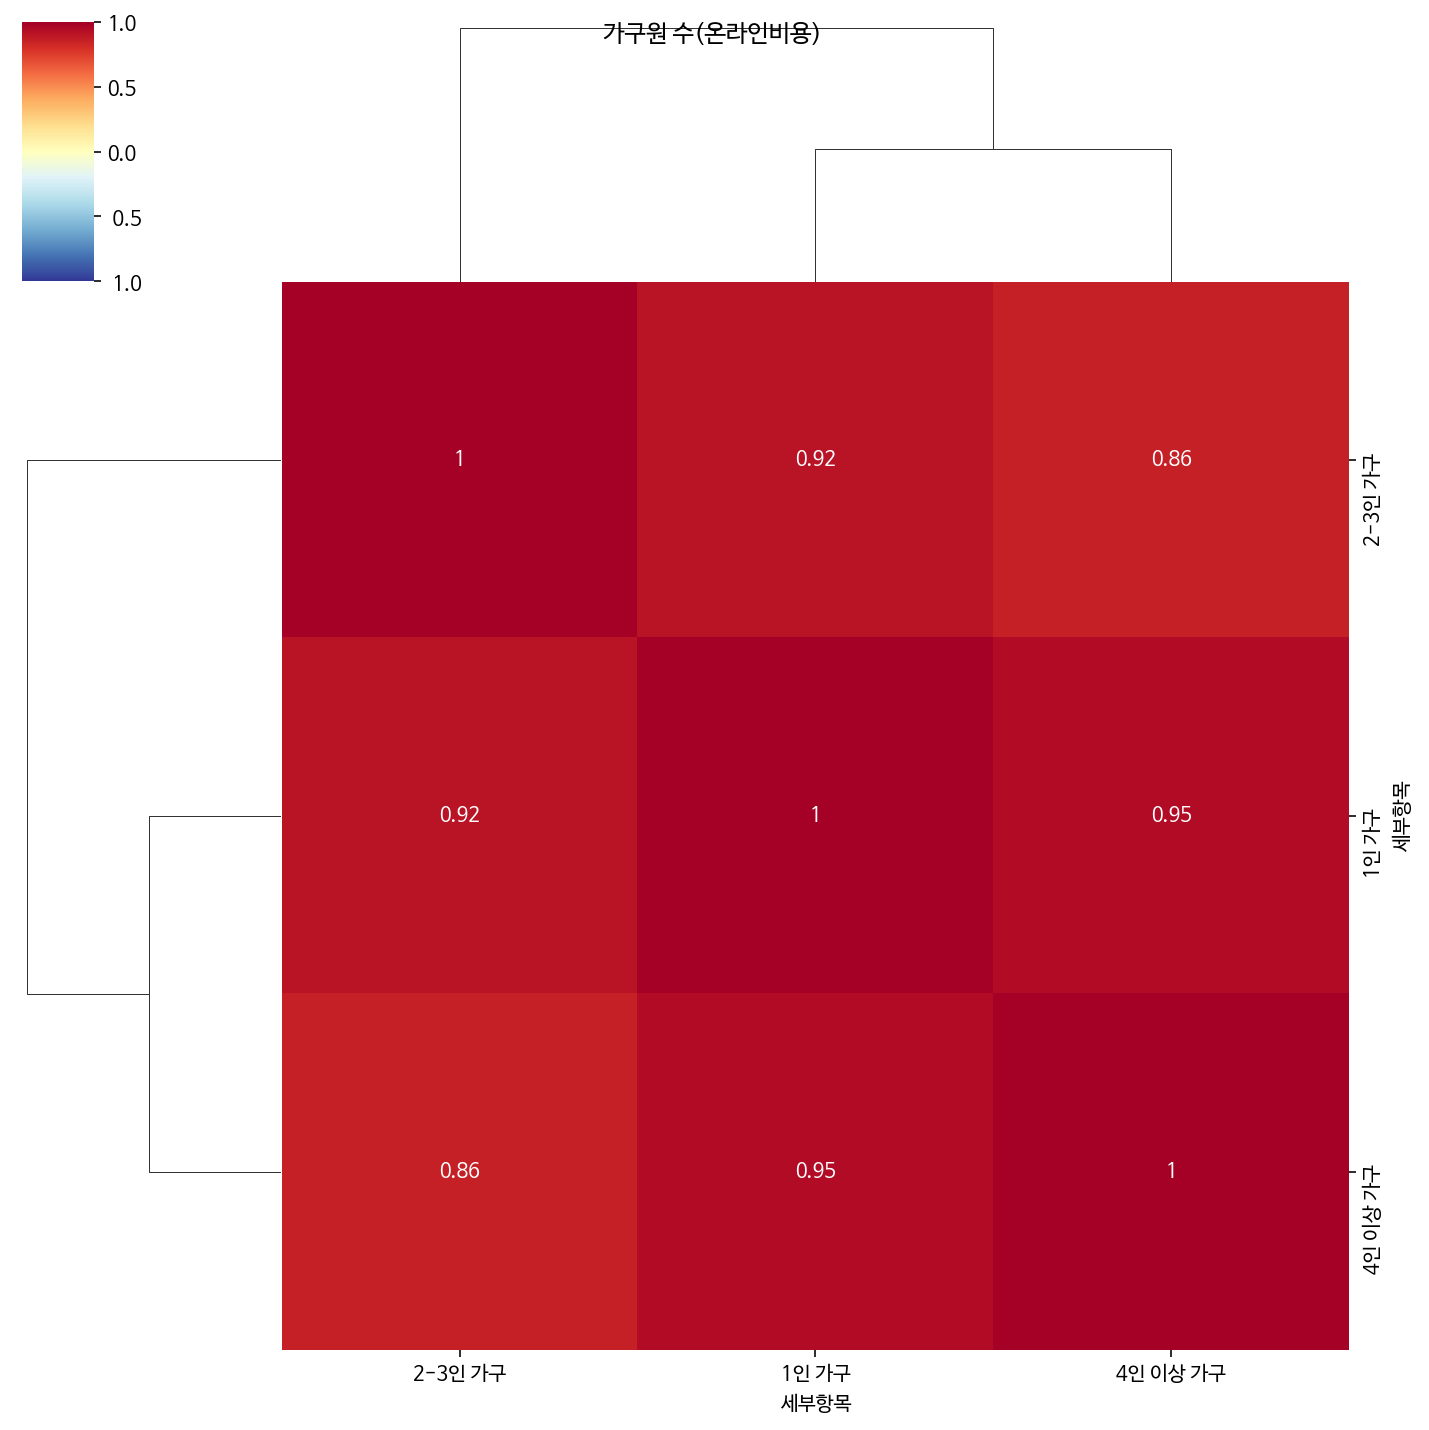

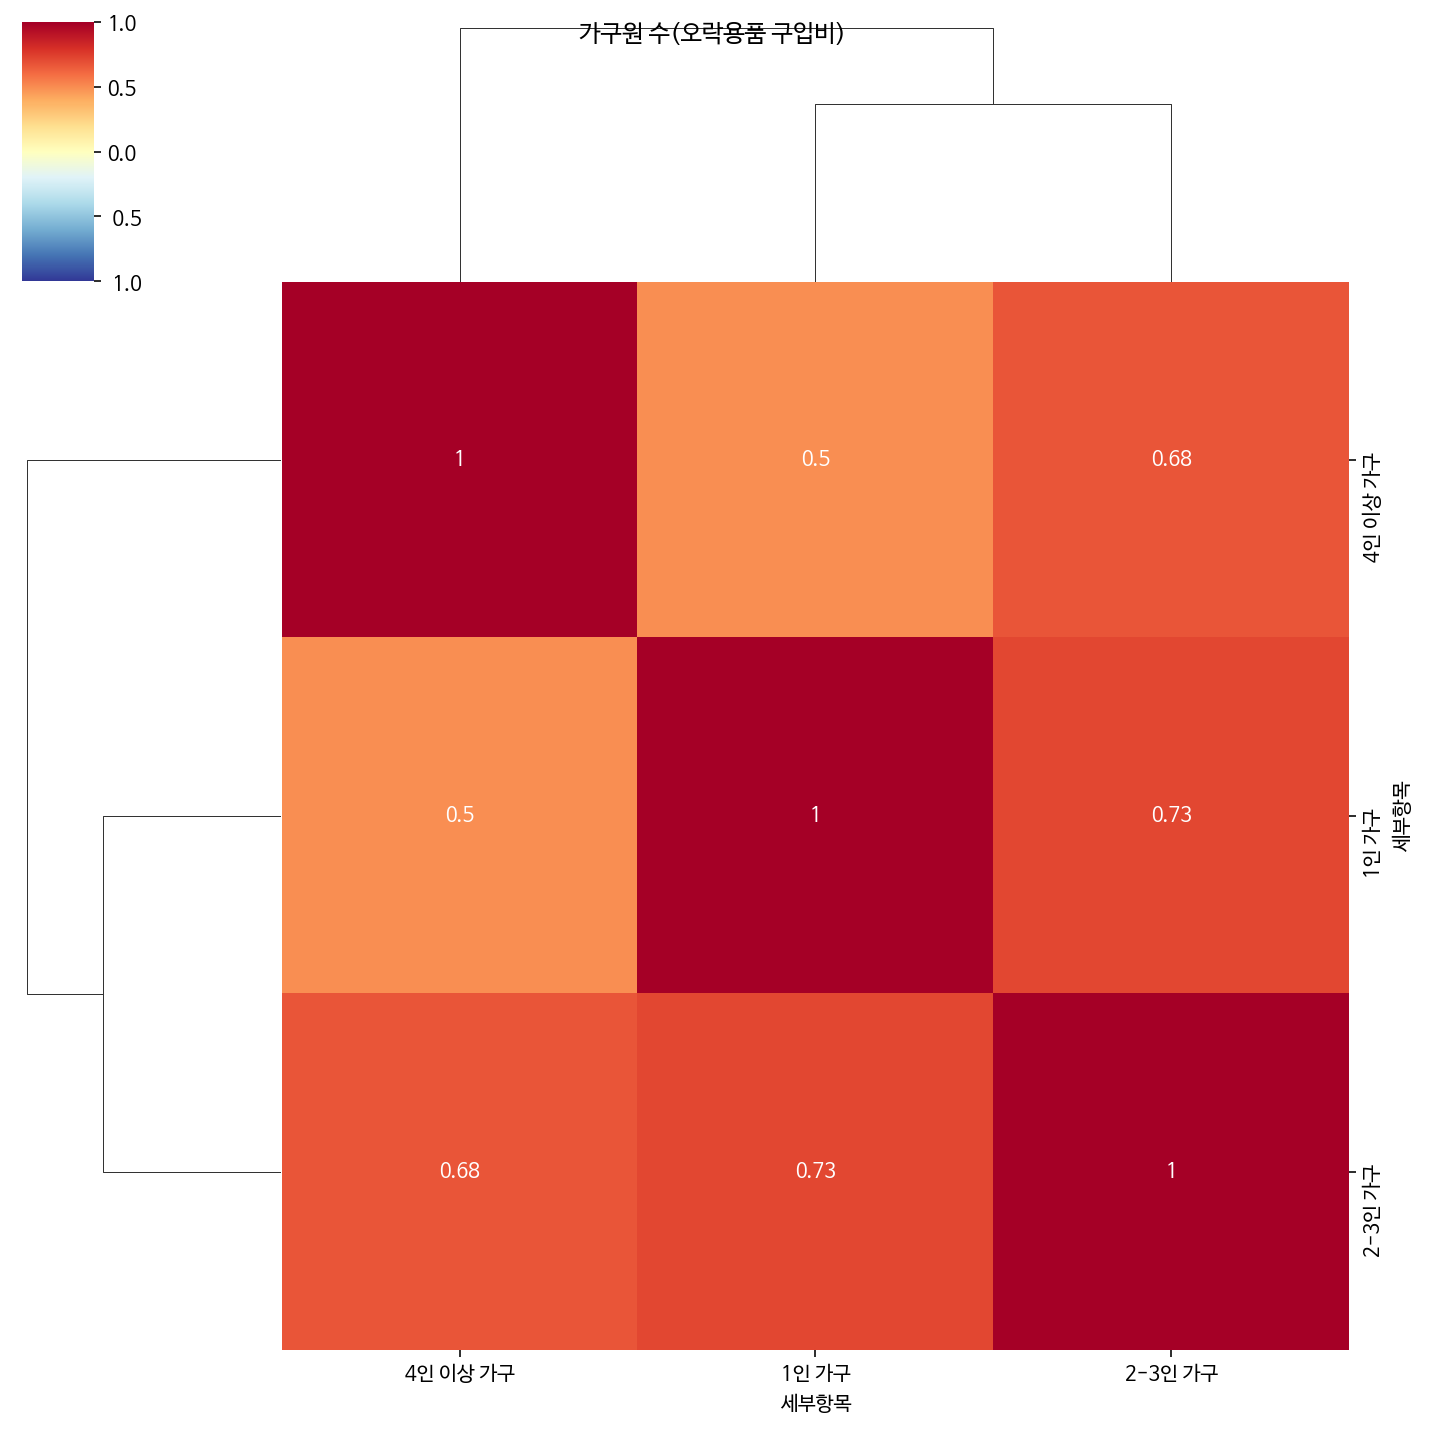

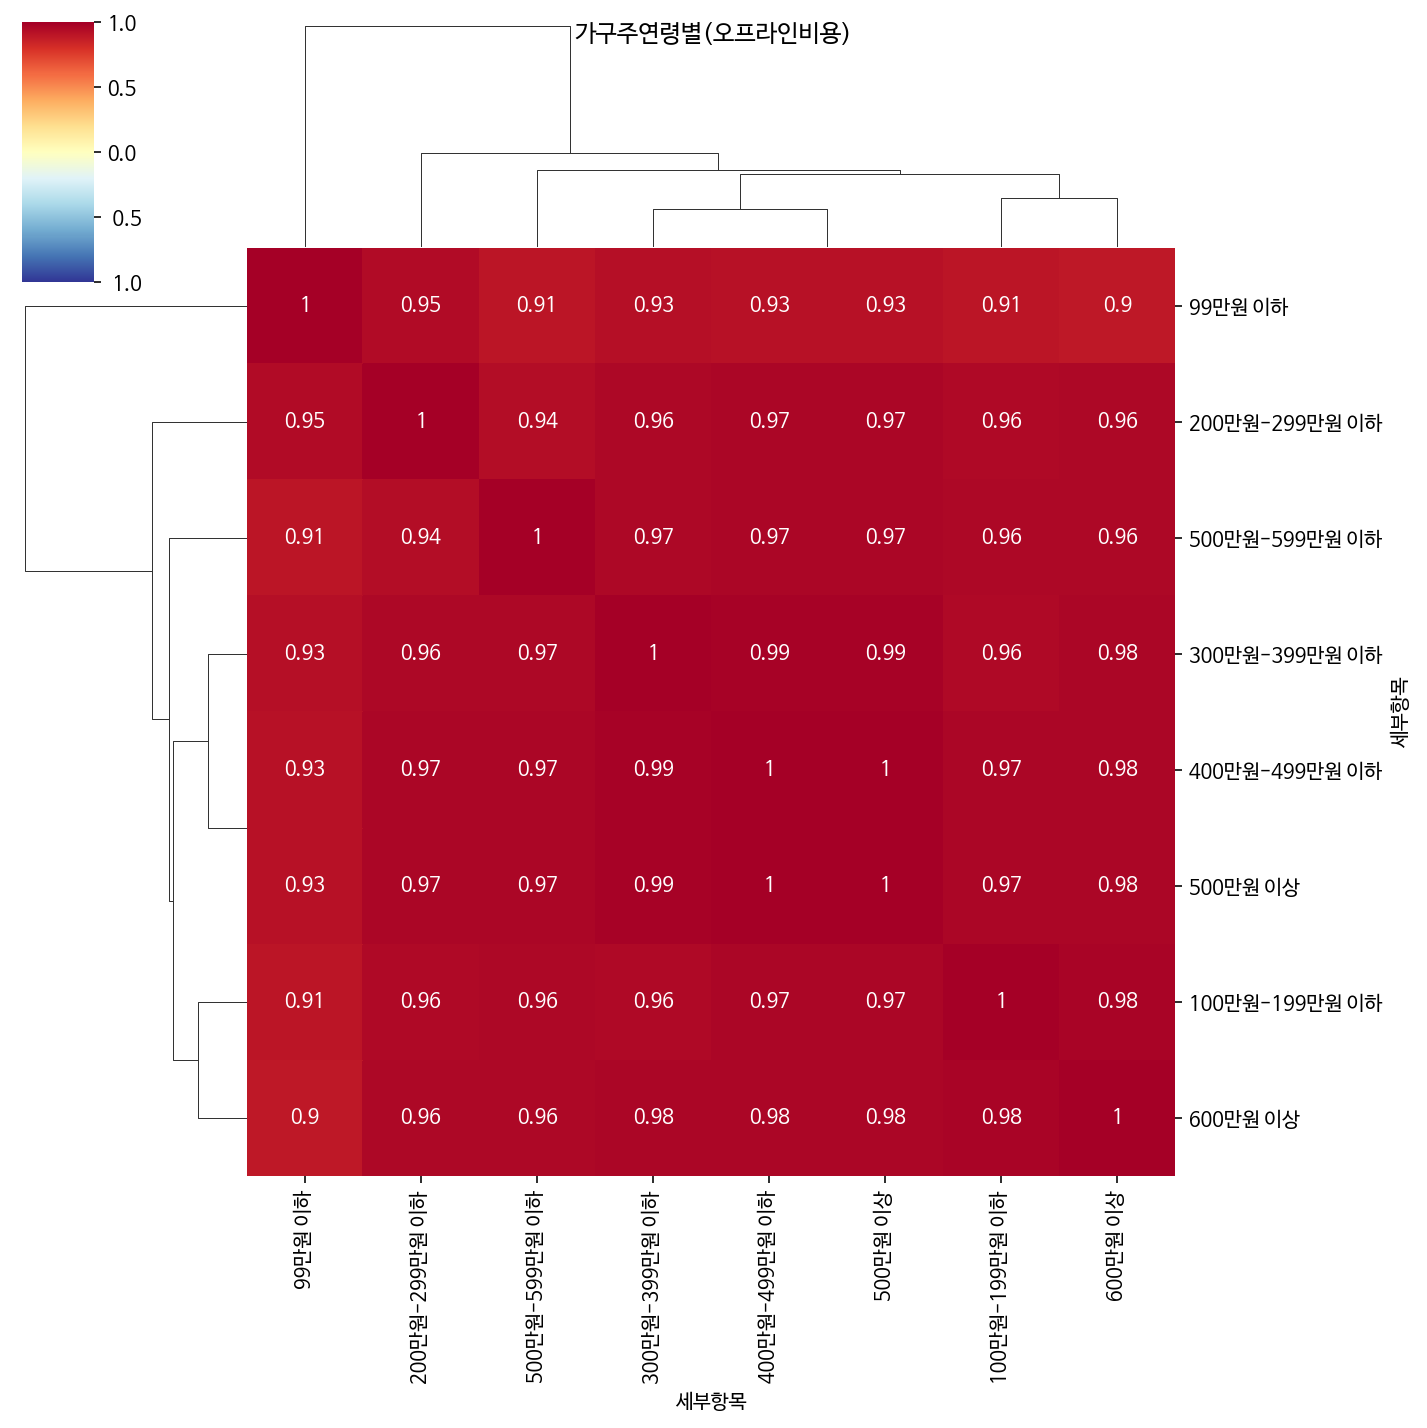

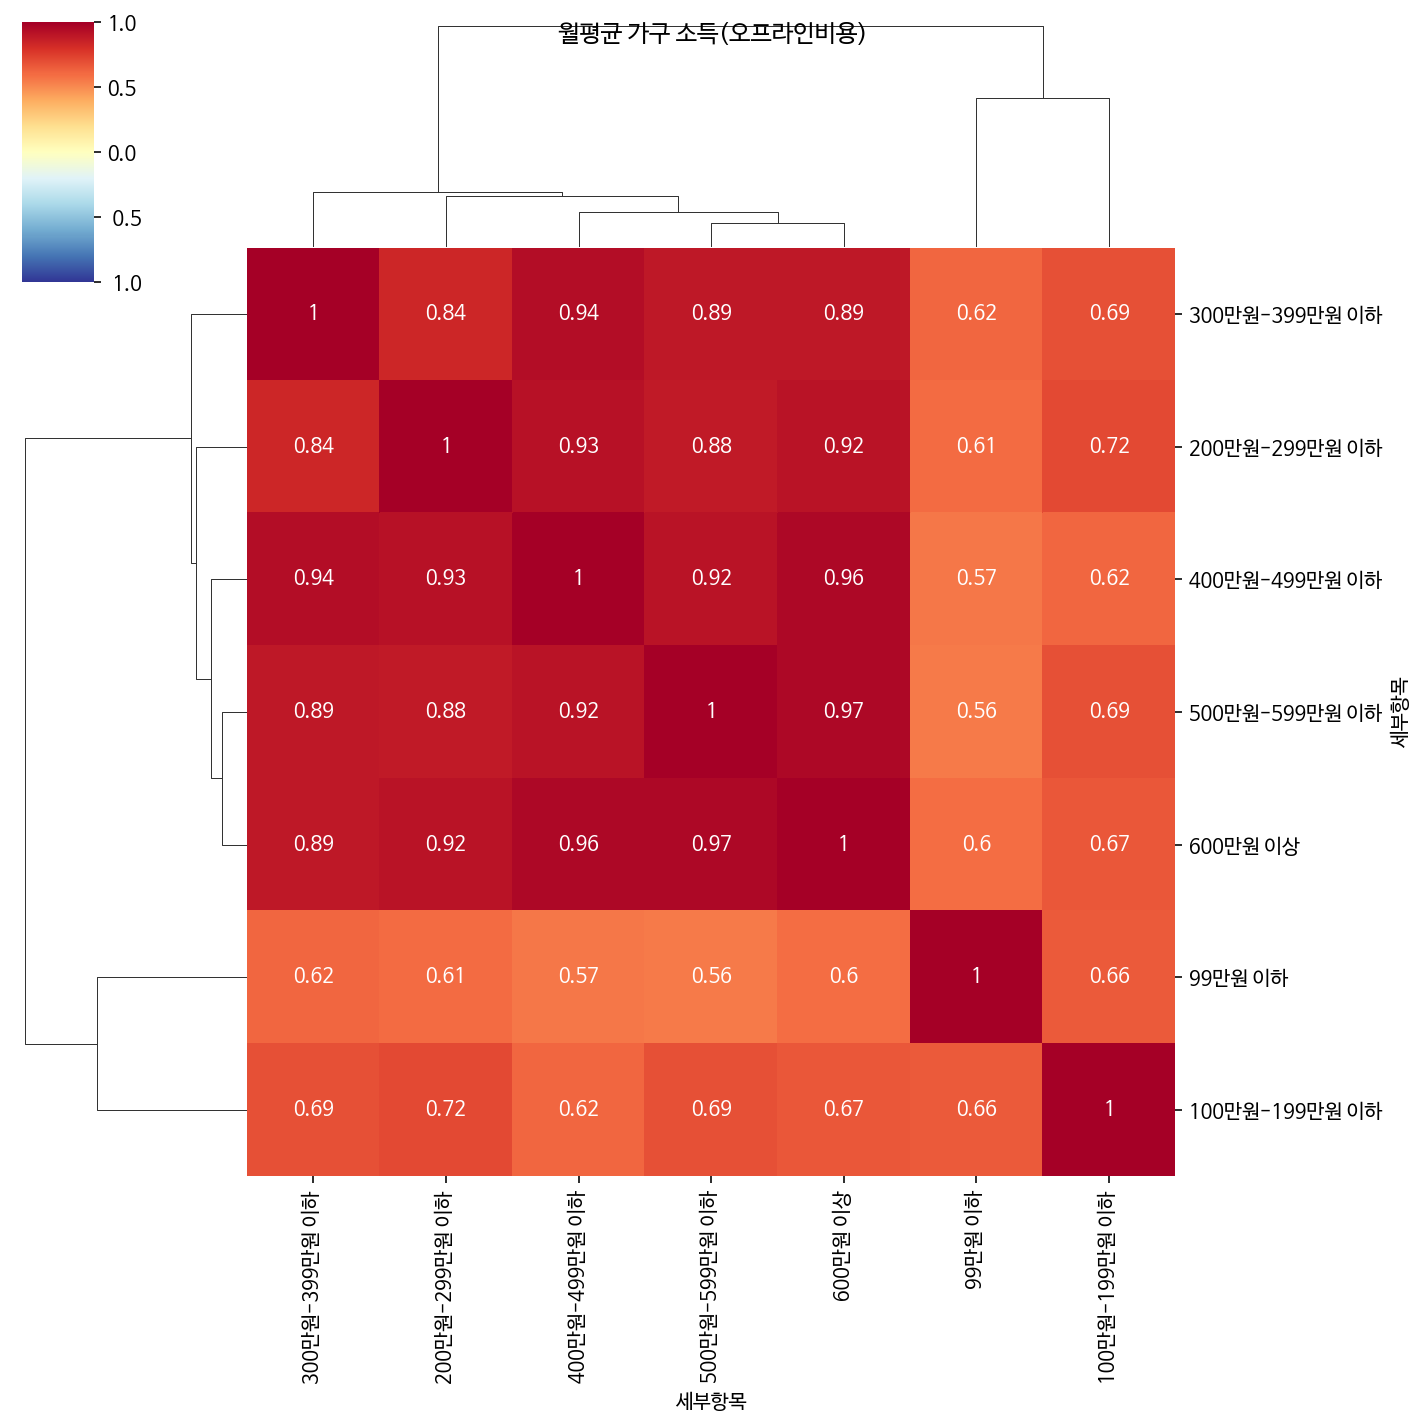

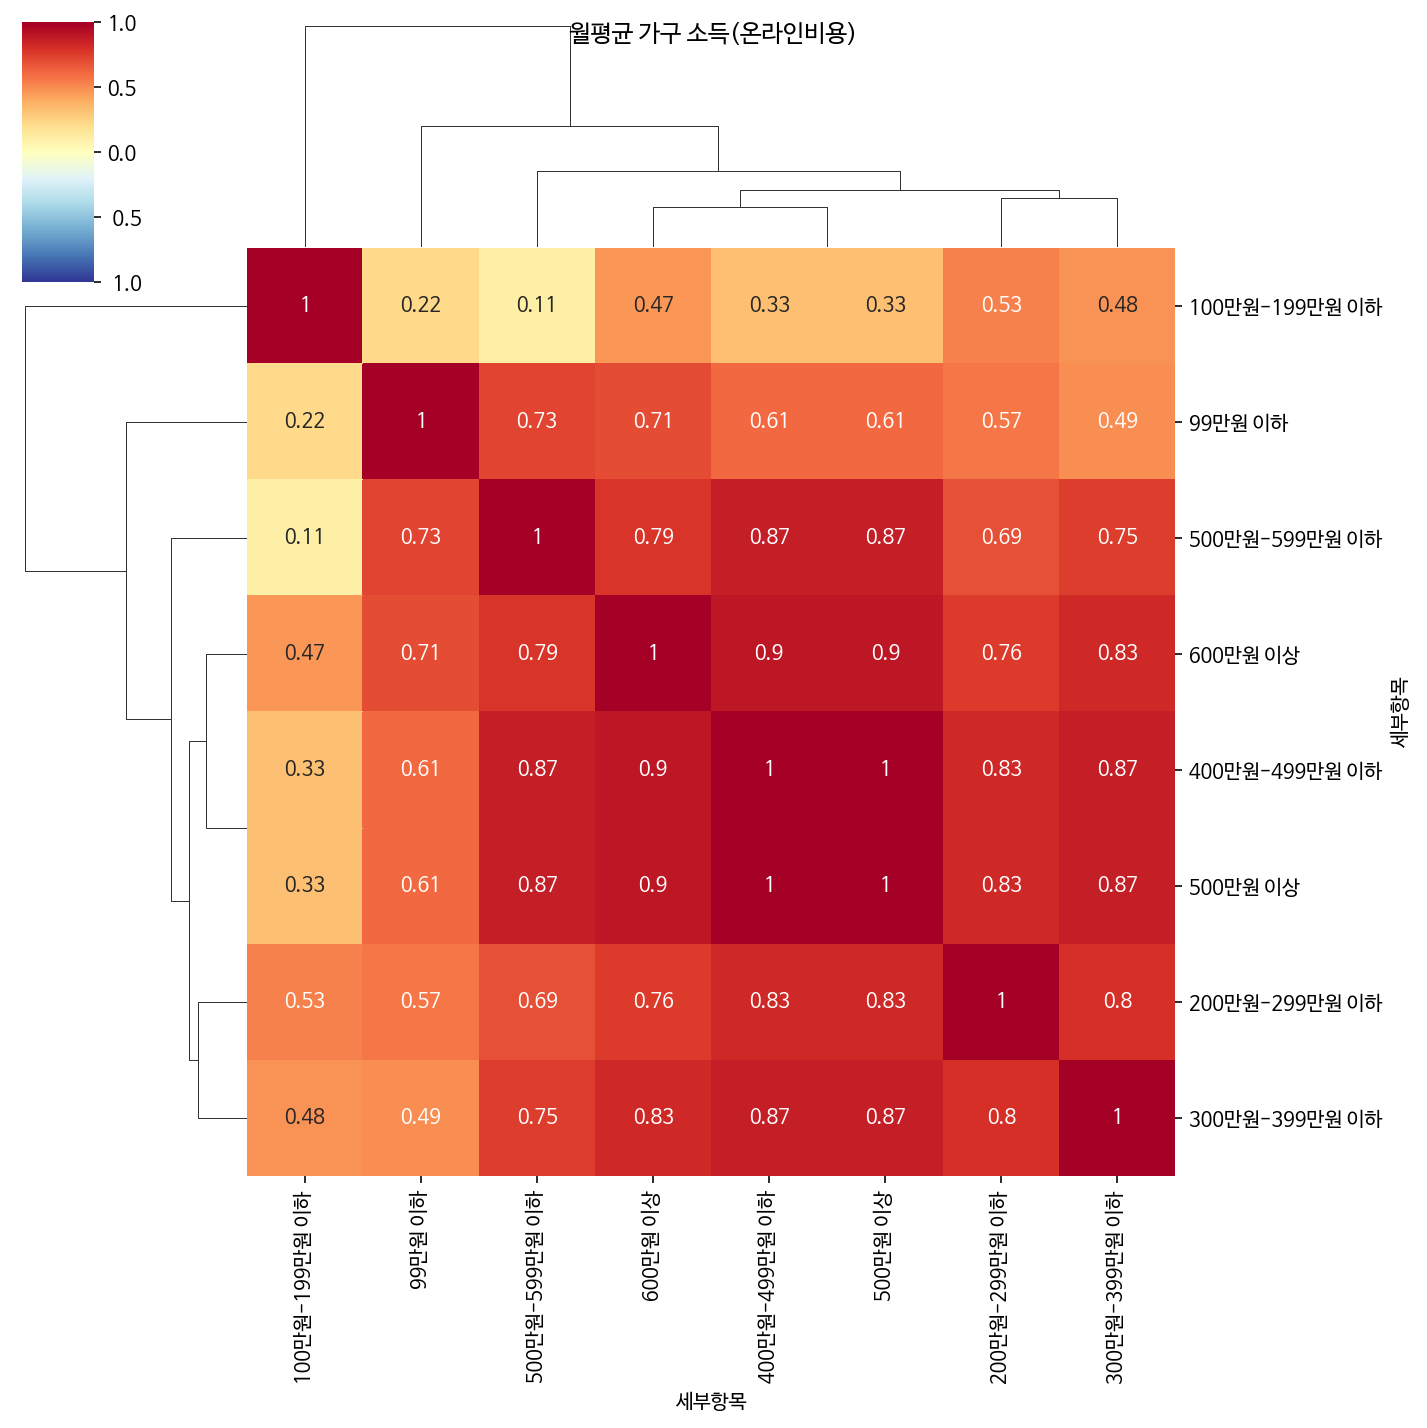

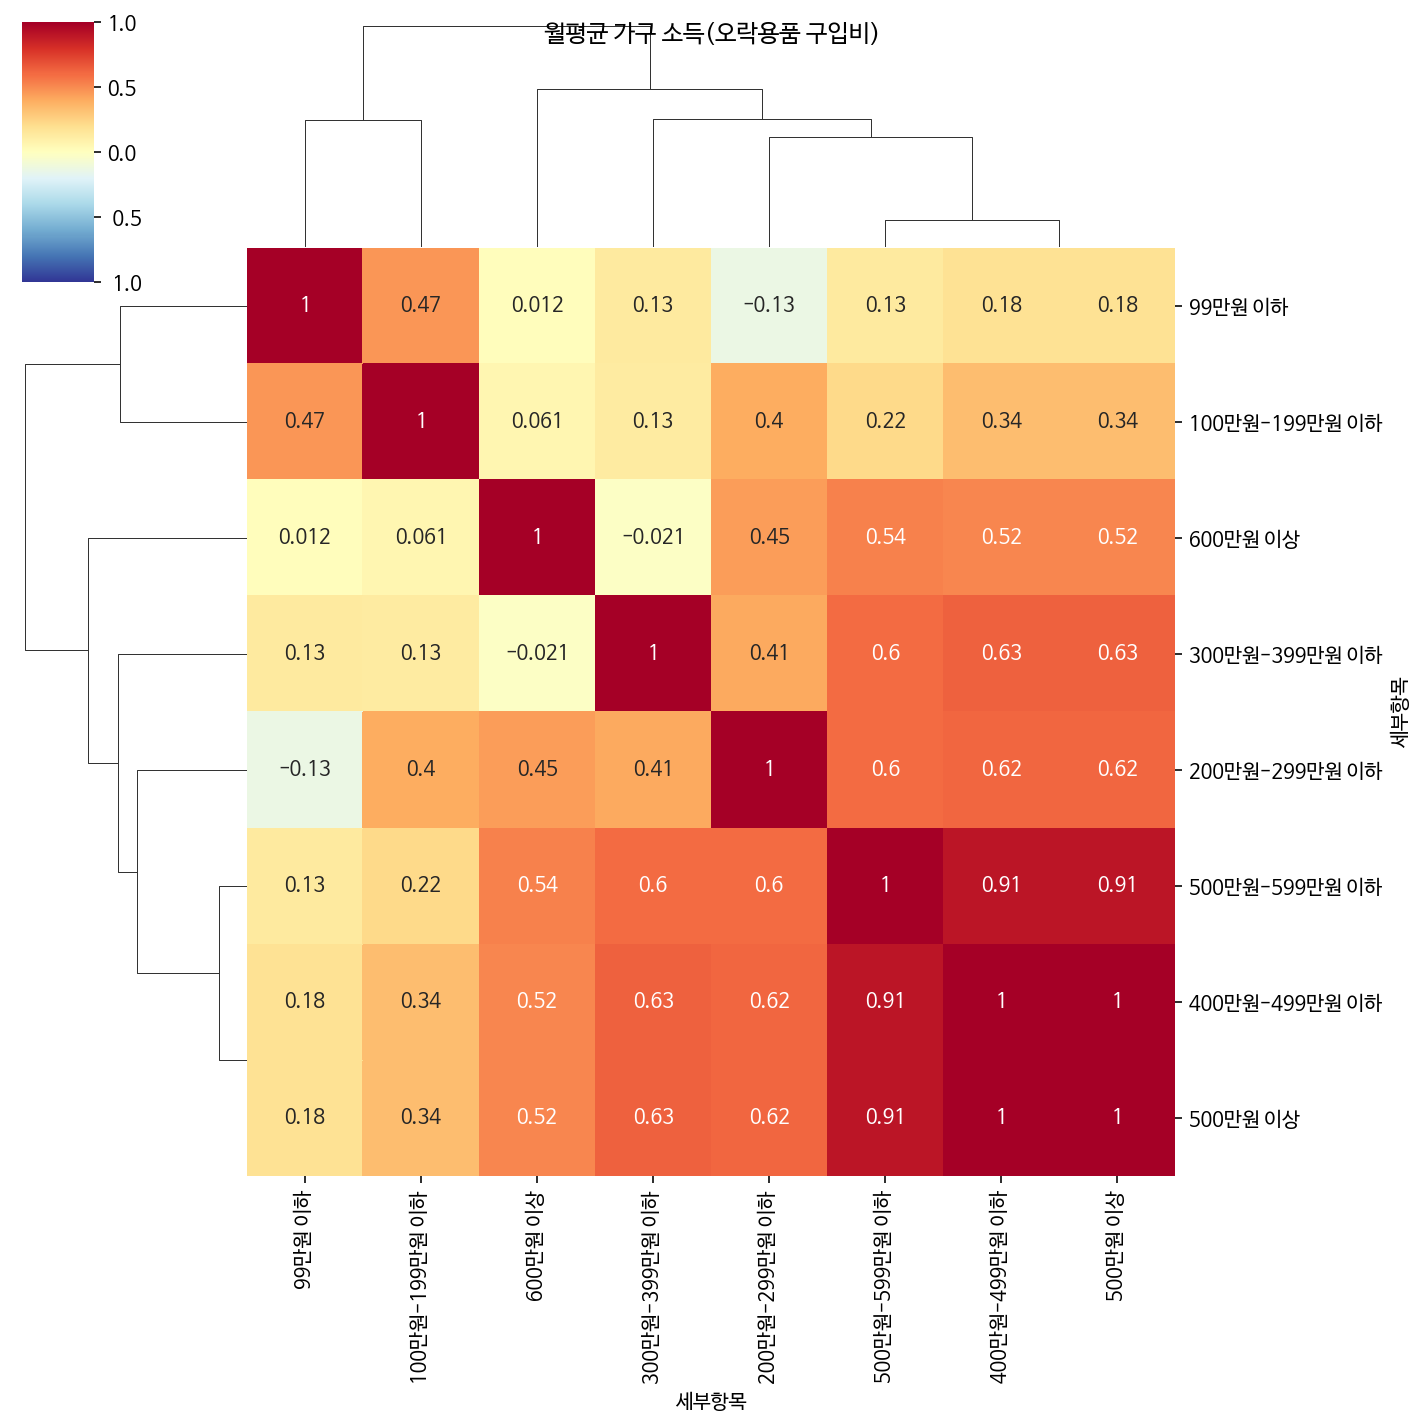

In [194]:
# 가구주연령별
df = family_age_off_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(오프라인비용)')

df = family_age_off_trip_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(해외 여행비)')

df = family_age_on_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(온라인비용)')

df = family_age_on_play_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(오락용품 구입비)')

# 가구원 수별

df = family_num_off_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구원 수(오프라인비용)')

df = family_num_off_trip_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(오프라인비용)')

df = family_num_on_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구원 수(온라인비용)')

df = family_num_on_play_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구원 수(오락용품 구입비)')

# 월평균 가구 소득

df = family_income_off_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(오프라인비용)')

df = family_income_off_trip_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('월평균 가구 소득(오프라인비용)')

df = family_income_on_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('월평균 가구 소득(온라인비용)')

df = family_income_on_play_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('월평균 가구 소득(오락용품 구입비)')

## 2. 한국문화관광연구원_소비자동향지수 전망(지출항목별 CSI)

In [7]:
future_consumer_df = pd.read_csv('/gdrive/MyDrive/likelion_CoronaCosumePattern_project1/data/한국문화관광연구원_소비자동향지수 전망(지출항목별 CSI).csv', encoding='utf-16', delimiter='\t', index_col='세부항목')
display(temp_consumer_df.info())
display(temp_consumer_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 전체 to 600만원 이상
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   분류          253 non-null    object 
 1   항목          253 non-null    object 
 2   2020년 04분기  240 non-null    float64
 3   2020년 03분기  239 non-null    float64
 4   2020년 02분기  238 non-null    float64
 5   2020년 01분기  240 non-null    float64
 6   2019년 04분기  240 non-null    float64
 7   2019년 03분기  240 non-null    float64
 8   2019년 02분기  240 non-null    float64
 9   2019년 01분기  240 non-null    float64
 10  2018년 04분기  240 non-null    float64
 11  2018년 03분기  240 non-null    float64
 12  2018년 02분기  240 non-null    float64
 13  2018년 01분기  240 non-null    float64
 14  2017년 04분기  240 non-null    float64
 15  2017년 03분기  240 non-null    float64
 16  2017년 02분기  208 non-null    float64
 17  2017년 01분기  208 non-null    float64
 18  2016년 04분기  208 non-null    float64
 19  2016년 03분기  208 non-null    

None

,분류,항목,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기,2017년 04분기,2017년 03분기,2017년 02분기,2017년 01분기,2016년 04분기,2016년 03분기,2016년 02분기,2016년 01분기,2015년 04분기,2015년 03분기,2015년 02분기,2015년 01분기,2014년 04분기,2014년 03분기,2014년 02분기,2014년 01분기,2013년 04분기,2013년 03분기,2013년 02분기
세부항목,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
전체,오프라인 문화생활비,전체,66.4,70.7,67.7,64.0,96.2,95.0,96.0,90.1,93.7,97.7,96.2,91.9,97.2,97.1,95.5,92.8,90.1,99.9,95.1,89.3,98.4,100.8,87.5,91.0,93.0,92.5,99.4,100.5,96.1,98.6,100.7
20대,오프라인 문화생활비,가구주연령,67.5,63.8,56.8,55.8,96.5,95.7,97.2,89.6,98.4,100.2,102.4,100.5,100.1,91.9,93.0,91.1,103.9,99.5,99.1,94.7,104.7,100.0,99.9,93.1,95.9,84.8,92.3,88.7,98.3,91.8,99.9
30대,오프라인 문화생활비,가구주연령,57.5,60.8,61.4,57.2,93.4,93.2,97.1,88.4,95.9,96.0,97.4,86.4,95.6,94.7,97.7,90.2,88.0,100.3,93.5,86.8,92.1,98.0,84.4,90.5,88.3,89.1,85.2,85.5,91.4,93.2,91.5
40대,오프라인 문화생활비,가구주연령,61.0,64.9,59.9,53.2,101.8,94.9,97.4,89.1,91.0,98.5,96.3,90.2,98.9,98.8,92.1,92.8,86.0,98.2,93.8,84.4,99.5,99.7,83.8,86.5,92.7,93.2,87.5,91.3,89.6,92.8,89.9
50대,오프라인 문화생활비,가구주연령,66.4,70.8,65.7,63.4,94.4,94.7,94.8,87.9,92.9,97.7,93.8,92.5,97.8,97.5,96.6,92.2,89.8,100.9,94.2,89.7,98.9,104.1,86.4,92.7,94.0,93.7,90.0,93.7,90.4,93.7,88.8


### 2-1 각 항목 별로 분류
* 가구주연령 : future_family_age_df

* 가구원 수 : future_family_num_df

* 월평균 가구 소득 : future_family_income_df

* 세부항목 : 오프라인 비용(off_), 해외 여행비(off_trip), 온라인 비용(on_), 오락용품 구입비(on_paly)

In [8]:
# 가구주 연령별
future_family_age_df = future_consumer_df[future_consumer_df['항목'] == '가구주연령']  # 가구주 연령으로 분류

future_family_age_off_df = future_family_age_df[future_family_age_df['분류'] == '오프라인 문화생활비'] # 가구주 연령 중 오프라인 문화생활비만 추출
future_family_age_off_df = future_family_age_off_df.iloc[0:, 2:15]
display(future_family_age_off_df)

future_family_age_off_trip_df = future_family_age_df[future_family_age_df['분류'] == '해외 여행비'] # 가구주 연령 중 해외 여행비만 추출
future_family_age_off_trip_df = future_family_age_off_trip_df.iloc[0:, 2:15]
display(future_family_age_off_trip_df)

future_family_age_on_df = future_family_age_df[future_family_age_df['분류'] == '온라인 문화생활비']  # 가구주 연령 중  온라인 문화생활비만 추출
future_family_age_on_df = future_family_age_on_df.iloc[0:, 2:15]
display(future_family_age_on_df)

future_family_age_on_play_df = future_family_age_df[future_family_age_df['분류'] == '오락용품 구입비']  # 가구주 연령 중  오락용품 구입비만 추출
future_family_age_on_play_df = future_family_age_on_play_df.iloc[0:, 2:15]
display(future_family_age_on_play_df)


# 가구원 수
future_family_num_df = future_consumer_df[future_consumer_df['항목'] == '가구원 수']

future_family_num_off_df = future_family_num_df[future_family_num_df['분류'] == '오프라인 문화생활비'] # 가구원 수 중 오프라인 문화생활비만 추출
future_family_num_off_df = future_family_num_off_df.iloc[0:, 2:15]
display(future_family_num_off_df)

future_family_num_off_trip_df = future_family_num_df[future_family_num_df['분류'] == '해외 여행비'] # 가구원 수 중 해외 여행비만 추출
future_family_num_off_trip_df = future_family_num_off_trip_df.iloc[0:, 2:15]
display(future_family_num_off_trip_df)

future_family_num_on_df = future_family_num_df[future_family_num_df['분류'] == '온라인 문화생활비']  # 가구원 수 중 온라인 문화생활비만 추출
future_family_num_on_df = future_family_num_on_df.iloc[0:, 2:15]
display(future_family_num_on_df)

future_family_num_on_play_df = future_family_num_df[future_family_num_df['분류'] == '오락용품 구입비']  # 가구원 수 중 오락용품 구입비만 추출
future_family_num_on_play_df = future_family_num_on_play_df.iloc[0:, 2:15]
display(future_family_num_on_play_df)


# 월평균 가구 소득
future_family_income_df = future_consumer_df[future_consumer_df['항목'] == '월평균 가구 소득']
future_family_income_df.fillna(method='ffill', inplace=True)

future_family_income_off_df = future_family_income_df[future_family_income_df['분류'] == '오프라인 문화생활비'] # 월평균 가구 소득중 오프라인 문화생활비만 추출
future_family_income_off_df = future_family_income_off_df.iloc[0:, 2:15]
display(future_family_income_off_df)

future_family_income_off_trip_df = future_family_income_df[future_family_income_df['분류'] == '해외 여행비'] # 월평균 가구 소득중 해외 여행비만 추출
future_family_income_off_trip_df = future_family_income_off_trip_df.iloc[0:, 2:15]
display(future_family_income_off_trip_df)

future_family_income_on_df = future_family_income_df[future_family_income_df['분류'] == '온라인 문화생활비']  # 월평균 가구 소득중  온라인 문화생활비만 추출
future_family_income_on_df = future_family_income_on_df.iloc[0:, 2:15]
display(future_family_income_on_df)

future_family_income_on_play_df = future_family_income_df[future_family_income_df['분류'] == '오락용품 구입비']  # 월평균 가구 소득중  오락용품 구입비만 추출
future_family_income_on_play_df = future_family_income_on_play_df.iloc[0:, 2:15]
display(future_family_income_on_play_df)


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
20대,95.7,96.8,102.6,92.7,103.5,99.4,104.7,110.0,96.3,110.0,110.5,107.2,104.3
30대,83.7,85.7,96.9,94.1,93.2,102.0,108.6,107.8,95.2,100.5,104.7,108.0,99.2
40대,84.6,87.4,99.7,94.2,102.4,105.7,104.6,104.9,98.4,106.7,109.4,105.3,104.9
50대,83.3,91.2,99.6,88.4,96.4,104.3,101.1,102.8,96.1,105.7,105.2,102.8,100.7
60대 이상,90.6,95.9,100.5,97.3,97.6,103.2,97.0,99.9,98.7,102.7,99.1,100.1,98.2


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
20대,90.8,96.3,97.5,91.3,98.9,101.4,110.8,106.3,105.4,103.3,113.3,108.5,108.8
30대,88.9,90.7,92.7,87.6,97.1,101.9,116.4,107.0,106.5,101.8,112.5,106.9,106.5
40대,87.7,91.9,94.4,92.9,104.5,98.1,106.5,104.7,104.8,103.6,111.8,106.7,107.4
50대,90.6,94.4,97.0,89.1,101.8,104.9,109.4,104.5,103.9,104.9,109.4,107.1,106.7
60대 이상,94.0,95.7,99.5,94.5,103.8,105.2,99.7,104.9,105.7,102.2,104.7,105.1,100.3


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
20대,111.4,107.4,104.4,105.6,102.6,98.5,100.8,105.6,100.6,101.3,100.9,103.4,100.1
30대,111.0,108.1,103.4,101.8,96.9,100.2,101.6,99.3,100.7,99.3,99.8,101.7,100.7
40대,105.3,105.5,104.5,101.9,101.7,101.0,102.4,100.3,98.7,102.8,101.4,100.4,100.8
50대,99.2,103.8,103.5,98.3,97.9,100.5,99.6,99.6,98.8,99.8,100.9,100.5,100.7
60대 이상,96.2,99.4,100.6,99.0,97.6,100.1,98.3,100.0,98.1,100.4,101.5,100.8,98.7


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
20대,102.2,105.1,101.2,97.5,100.6,102.9,98.4,97.8,99.2,102.1,99.7,103.3,99.8
30대,106.7,112.3,103.0,104.4,102.2,108.4,101.5,104.1,102.6,107.9,103.7,115.0,102.9
40대,102.3,103.5,102.9,100.1,96.7,99.3,99.3,103.7,98.5,103.5,101.8,106.4,97.0
50대,96.3,99.2,100.0,99.7,94.9,98.4,97.9,98.5,95.7,98.7,98.2,99.6,95.8
60대 이상,96.2,101.4,100.6,99.3,94.8,102.7,97.7,102.2,101.0,100.3,99.4,101.8,97.7


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
1인 가구,90.5,93.9,100.5,96.2,100.4,101.8,104.0,103.6,97.2,103.9,105.1,104.6,100.0
2-3인 가구,87.7,91.4,99.3,92.6,96.7,105.5,100.2,105.1,96.3,104.9,105.1,103.1,101.2
4인 이상 가구,78.3,85.7,99.1,90.1,98.7,101.8,106.6,103.1,98.5,105.7,106.4,106.1,103.0


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
1인 가구,91.6,93.3,96.8,93.5,100.7,100.8,109.1,104.0,105.1,101.4,109.8,106.0,106.7
2-3인 가구,91.1,95.4,97.3,91.7,103.4,103.0,107.8,106.3,104.4,104.0,111.1,106.9,105.0
4인 이상 가구,87.1,90.2,93.1,87.0,99.9,103.1,107.2,104.5,106.2,104.1,108.2,107.0,106.7


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
1인 가구,105.0,102.9,102.8,101.5,100.4,99.3,102.1,100.2,99.3,100.7,101.4,100.7,100.5
2-3인 가구,101.9,103.5,102.6,99.9,97.7,100.9,100.0,100.7,99.3,100.6,100.4,101.1,99.6
4인 이상 가구,103.7,107.9,104.8,100.8,100.1,100.3,99.6,99.6,98.6,101.1,101.5,101.0,101.4


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
1인 가구,100.4,100.2,101.4,98.0,98.7,99.4,98.0,99.9,100.3,99.8,99.4,99.1,96.9
2-3인 가구,99.5,103.9,101.3,101.4,97.0,102.5,99.8,101.9,99.6,102.0,100.7,105.5,99.0
4인 이상 가구,101.0,107.0,101.9,101.0,95.4,102.7,98.2,102.5,96.6,105.5,101.2,110.2,97.9


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
99만원 이하,90.0,96.4,102.2,96.4,96.0,96.6,98.7,100.5,97.5,102.5,103.3,101.6,102.2
100만원-199만원 이하,92.3,90.5,99.5,96.1,98.3,96.1,99.0,104.4,98.0,103.2,99.5,102.6,94.5
200만원-299만원 이하,87.2,89.7,97.1,90.4,99.3,102.2,102.6,99.0,95.3,100.5,105.1,104.0,96.6
300만원-399만원 이하,83.2,89.8,98.9,88.1,94.1,103.6,103.0,105.0,95.7,103.1,101.8,101.4,100.9
400만원-499만원 이하,83.8,87.8,102.5,94.0,98.0,102.9,102.8,105.5,98.4,109.6,108.6,104.9,107.3
500만원 이상,83.8,87.8,102.5,94.0,98.0,102.9,102.8,105.5,98.4,109.6,108.6,104.9,107.3
500만원-599만원 이하,81.6,91.9,99.7,90.9,97.6,110.5,104.6,105.5,95.2,105.3,106.8,105.0,103.3
600만원 이상,87.4,89.3,98.1,95.4,103.5,108.7,106.8,108.5,99.9,109.8,110.2,108.7,104.4


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
99만원 이하,93.6,98.3,98.8,97.3,96.0,94.3,99.8,101.0,100.6,100.1,103.2,101.5,101.6
100만원-199만원 이하,93.9,92.9,97.5,95.2,94.1,97.0,101.7,102.5,102.6,101.1,103.3,101.3,98.1
200만원-299만원 이하,93.3,89.7,96.7,90.0,98.6,99.5,104.0,104.1,98.7,100.7,109.1,105.1,100.4
300만원-399만원 이하,86.0,92.4,97.9,90.1,100.9,104.1,107.2,101.0,104.8,101.7,110.1,106.3,106.4
400만원-499만원 이하,87.1,93.3,92.8,91.5,100.3,104.0,112.5,106.5,107.5,104.8,108.0,105.4,104.5
500만원-599만원 이하,91.7,93.3,95.1,86.9,108.5,103.5,112.7,109.2,108.0,103.4,105.2,109.4,110.5
600만원 이상,89.0,94.6,93.6,88.3,109.7,108.6,116.3,111.5,112.8,110.8,121.8,113.0,115.0


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
99만원 이하,97.0,101.9,101.4,98.8,98.4,98.2,96.3,98.7,98.9,99.2,101.1,99.9,97.5
100만원-199만원 이하,99.9,97.6,100.8,101.2,95.7,99.0,100.8,102.5,99.4,101.1,100.4,99.9,99.8
200만원-299만원 이하,103.3,103.8,101.4,98.2,99.8,99.3,101.4,97.0,96.1,98.8,99.4,99.9,96.7
300만원-399만원 이하,100.8,104.0,102.6,101.0,101.0,99.5,101.3,101.2,102.4,98.7,99.6,103.3,101.9
400만원-499만원 이하,106.7,104.9,105.3,100.0,98.5,99.2,97.7,99.5,100.5,100.8,99.2,101.9,100.6
500만원 이상,106.7,104.9,105.3,100.0,98.5,99.2,97.7,99.5,100.5,100.8,99.2,101.9,100.6
500만원-599만원 이하,105.6,106.3,102.4,99.1,97.0,102.3,102.5,100.3,96.1,101.9,101.6,98.1,101.1
600만원 이상,107.2,109.4,108.0,104.0,100.3,103.0,101.8,102.2,99.7,105.1,104.2,101.9,103.0


,2021년 01분기,2020년 04분기,2020년 03분기,2020년 02분기,2020년 01분기,2019년 04분기,2019년 03분기,2019년 02분기,2019년 01분기,2018년 04분기,2018년 03분기,2018년 02분기,2018년 01분기
세부항목,,,,,,,,,,,,,
99만원 이하,96.2,100.2,100.8,98.7,95.4,97.1,97.5,100.2,97.8,99.9,100.2,101.3,98.1
100만원-199만원 이하,99.5,100.3,100.6,100.6,93.7,99.0,98.8,101.2,102.7,99.4,99.1,102.3,96.1
200만원-299만원 이하,102.0,103.0,100.9,99.4,100.1,104.3,96.9,98.3,99.6,100.6,100.6,104.4,96.6
300만원-399만원 이하,101.2,104.8,103.0,98.7,98.2,102.4,99.1,105.0,99.3,101.1,100.5,106.4,99.7
400만원-499만원 이하,97.1,104.9,99.2,102.6,92.7,101.4,100.4,101.6,98.7,104.0,101.5,104.5,98.7
500만원 이상,97.1,104.9,99.2,102.6,92.7,101.4,100.4,101.6,98.7,104.0,101.5,104.5,98.7
500만원-599만원 이하,101.8,106.5,101.3,96.6,101.9,103.5,101.7,101.1,97.3,105.0,99.8,106.6,99.8
600만원 이상,101.8,104.9,103.5,104.0,95.9,102.0,98.6,102.4,97.9,105.3,101.0,106.3,97.7


### 2-2 각 항목 별로 시각화

* 가구주연령 : future_family_age_df

* 가구원 수 : future_family_num_df

* 월평균 가구 소득 : future_family_income_df

* 세부항목 : 오프라인 비용(off_), 해외 여행비(off_trip), 온라인 비용(on_), 오락용품 구입비(on_paly)

In [9]:
import seaborn as sns
# 시각화 여러개 나오게 하기

figure, ((ax1,ax2,ax3, ax4), (ax5,ax6,ax7,ax8) , (ax9,ax10,ax11,ax12)) = plt.subplots(nrows = 3, ncols =4 )
figure.set_size_inches(70,30)

# 가구주연령별
ax1.set_title('가구주연령별(오프라인비용)', fontsize=20)
sns.lineplot(data = future_family_age_off_df.T, marker='o', linewidth=3, ax= ax1)
ax1.set_ylabel('CSI', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)

ax2.set_title('가구주연령별(해외 여행비)', fontsize=20)
sns.lineplot(data = future_family_age_off_trip_df.T, marker='o', linewidth=3, ax= ax2)
ax2.set_ylabel('CSI', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)

ax3.set_title('가구주연령별(온라인비용)', fontsize=20)
sns.lineplot(data = future_family_age_on_df.T, marker='o', linewidth=3, ax= ax3)
ax3.set_ylabel('CSI', fontsize=14)
ax3.set_xlabel('Date', fontsize=14)

ax4.set_title('가구주연령별(오락용품 구입비)', fontsize=20)
sns.lineplot(data = future_family_age_on_play_df.T, marker='o', linewidth=3, ax= ax4)
ax4.set_ylabel('CSI', fontsize=14)
ax4.set_xlabel('Date', fontsize=14)

# 가구원 수별

ax5.set_title('가구원 수(오프라인비용)', fontsize=20)
sns.lineplot(data = future_family_num_off_df.T, marker='o', linewidth=3, ax= ax5)
ax5.set_ylabel('CSI', fontsize=14)
ax5.set_xlabel('Date', fontsize=14)

ax6.set_title('가구원 수(해외 여행비)', fontsize=20)
sns.lineplot(data = future_family_num_off_trip_df.T, marker='o', linewidth=3, ax= ax6)
ax6.set_ylabel('CSI', fontsize=14)
ax6.set_xlabel('Date', fontsize=14)

ax7.set_title('가구원 수(온라인비용)', fontsize=20)
sns.lineplot(data = future_family_num_on_df.T, marker='o', linewidth=3, ax= ax7)
ax7.set_ylabel('CSI', fontsize=14)
ax7.set_xlabel('Date', fontsize=14)

ax8.set_title('가구원 수(오락용품 구입비)', fontsize=20)
sns.lineplot(data = future_family_num_on_play_df.T, marker='o', linewidth=3, ax= ax8)
ax8.set_ylabel('CSI', fontsize=14)
ax8.set_xlabel('Date', fontsize=14)

# 월평균 가구 소득

ax9.set_title('월평균 가구 소득(오프라인비용)', fontsize=20)
sns.lineplot(data = future_family_income_off_df.T, marker='o', linewidth=3, ax= ax9)
ax9.set_ylabel('CSI', fontsize=14)
ax9.set_xlabel('Date', fontsize=14)

ax10.set_title('월평균 가구 소득(해외 여행비)', fontsize=20)
sns.lineplot(data = future_family_income_off_trip_df.T, marker='o', linewidth=3, ax= ax10)
ax10.set_ylabel('CSI', fontsize=14)
ax10.set_xlabel('Date', fontsize=14)

ax11.set_title('월평균 가구 소득(온라인비용)', fontsize=20)
sns.lineplot(data = future_family_income_on_df.T, marker='o', linewidth=3, ax= ax11)
ax11.set_ylabel('CSI', fontsize=14)
ax11.set_xlabel('Date', fontsize=14)

ax12.set_title('월평균 가구 소득(오락용품 구입비)', fontsize=20)
sns.lineplot(data = future_family_income_on_play_df.T, marker='o', linewidth=3, ax= ax12)
ax12.set_ylabel('CSI', fontsize=14)
ax12.set_xlabel('Date', fontsize=14)
plt.legend(loc='best')

Output hidden; open in https://colab.research.google.com to view.

### 2-3 각 항목 별 히트맵

* 가구주연령 : future_family_age_df

* 가구원 수 : future_family_num_df

* 월평균 가구 소득 : future_family_income_df

* 세부항목 : 오프라인 비용(off_), 해외 여행비(off_trip), 온라인 비용(on_), 오락용품 구입비(on_paly)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 0.98, '월평균 가구 소득(오락용품 구입비)')

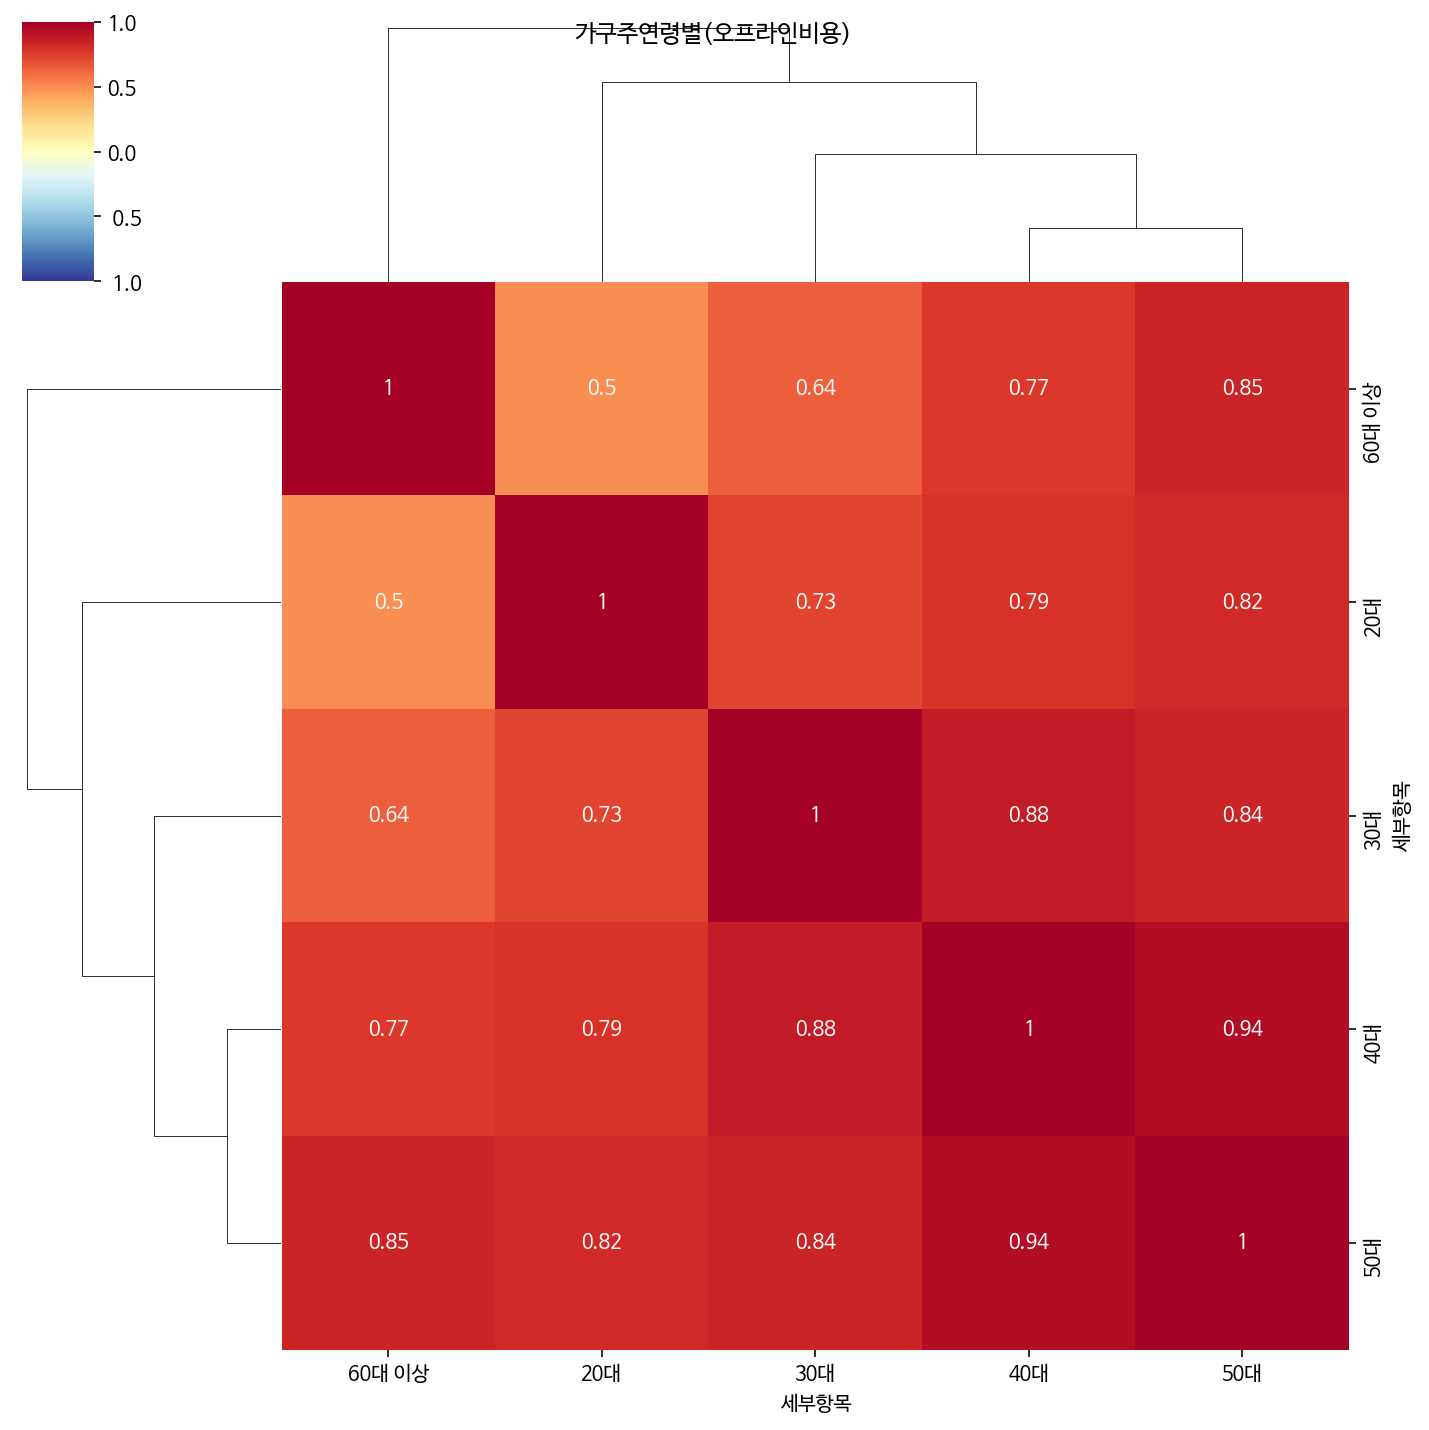

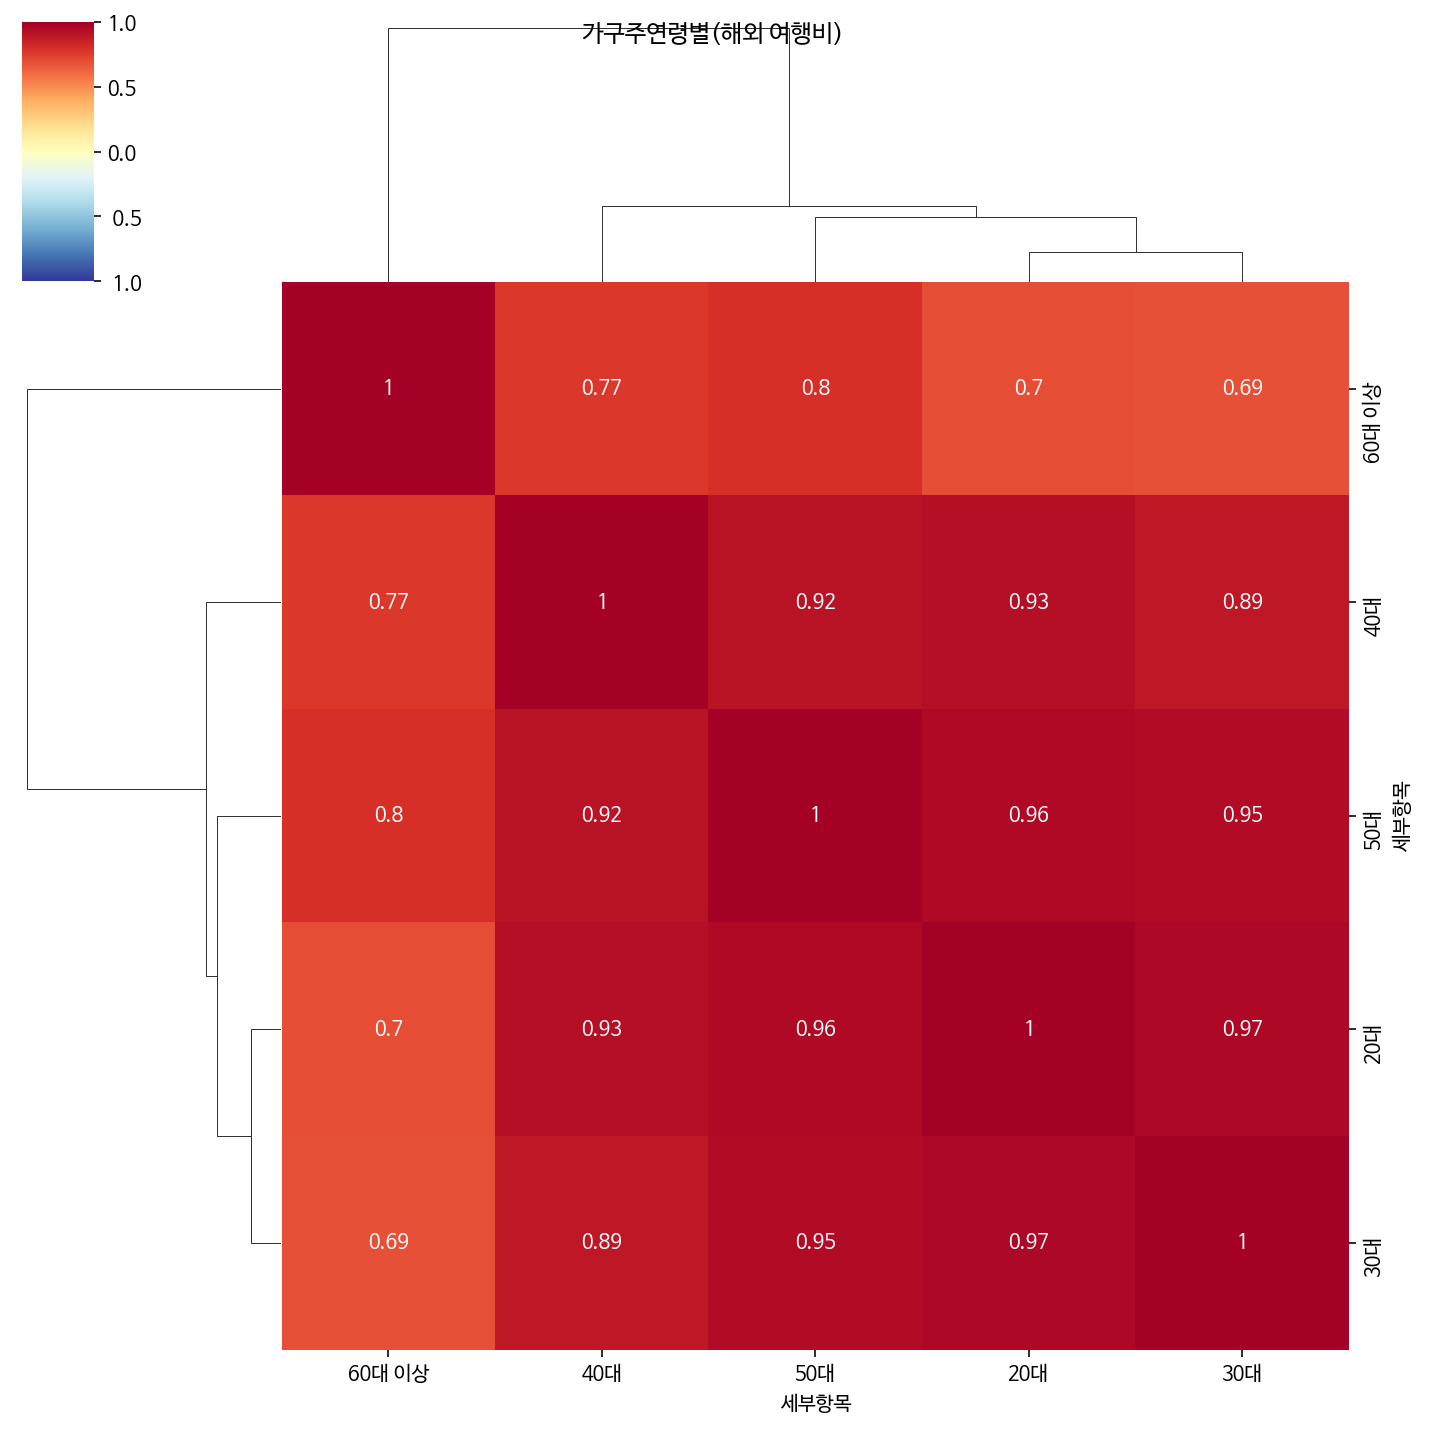

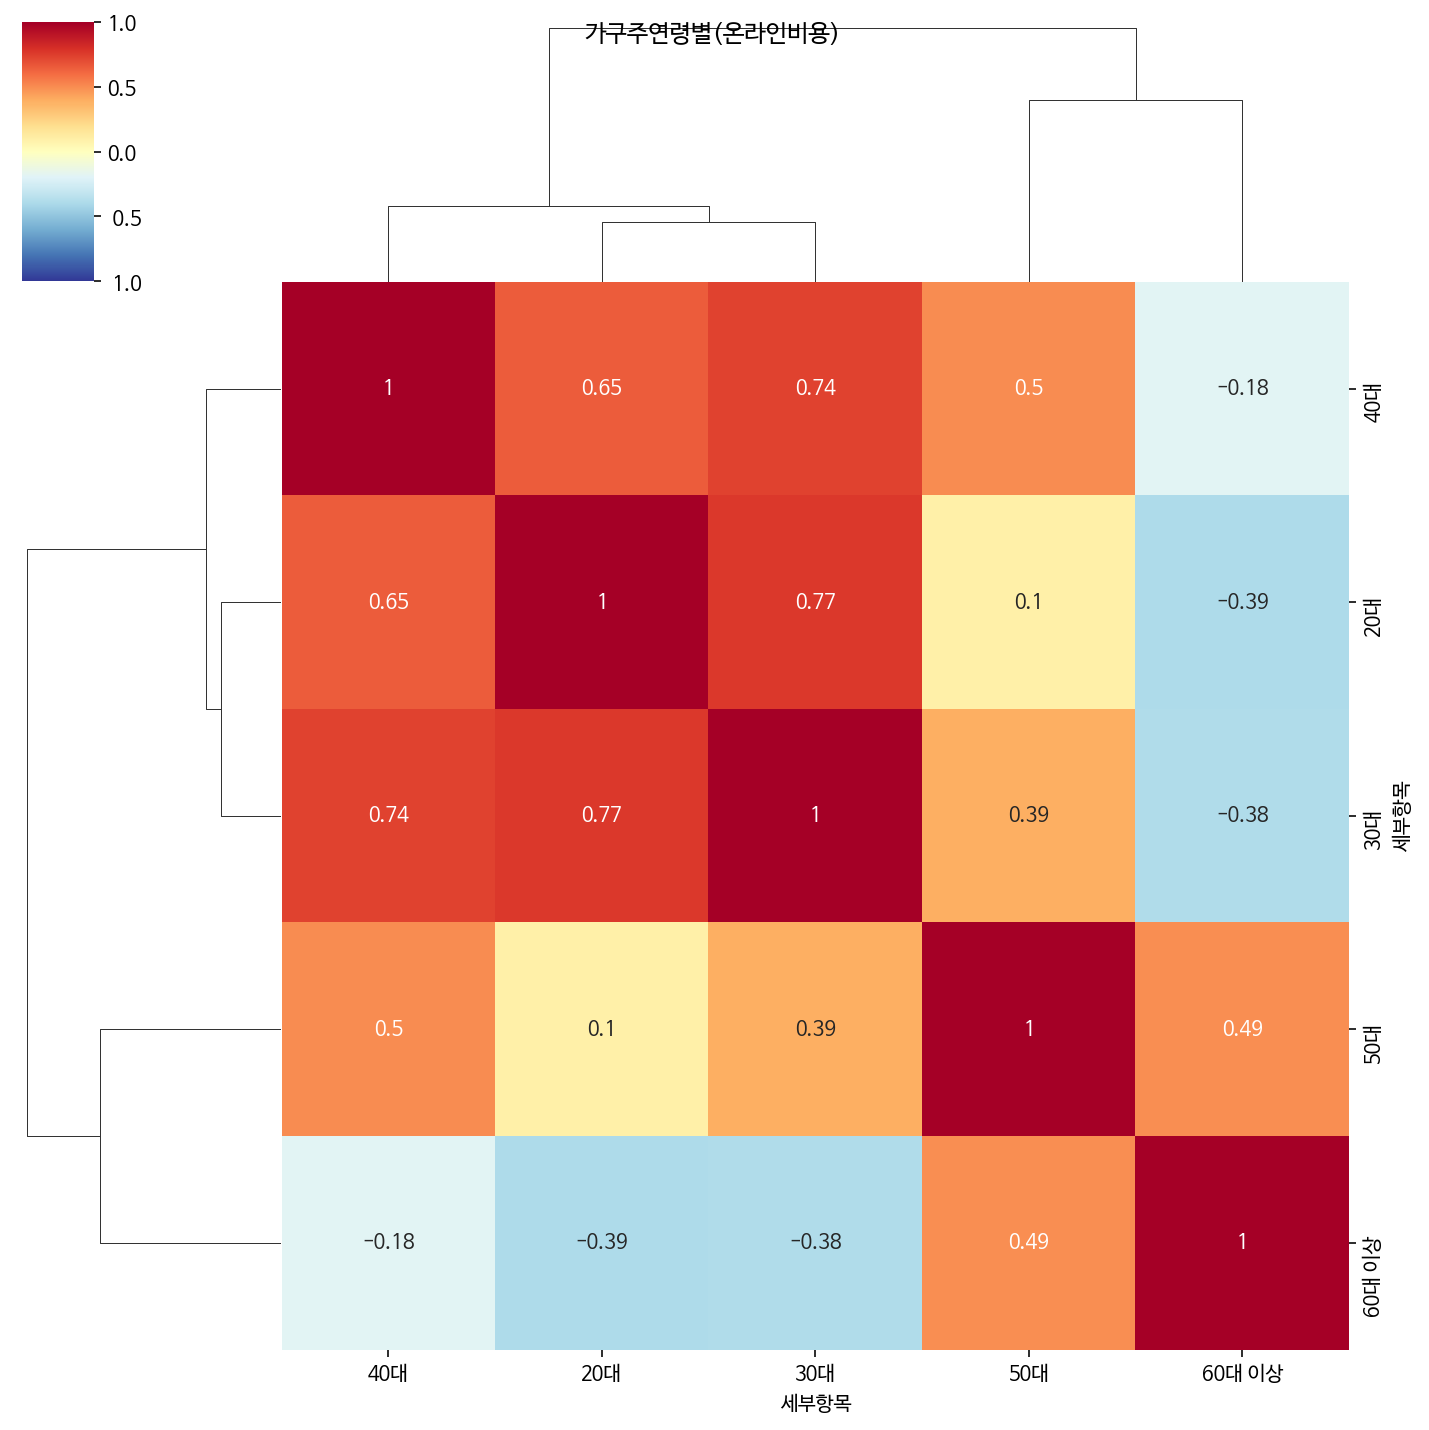

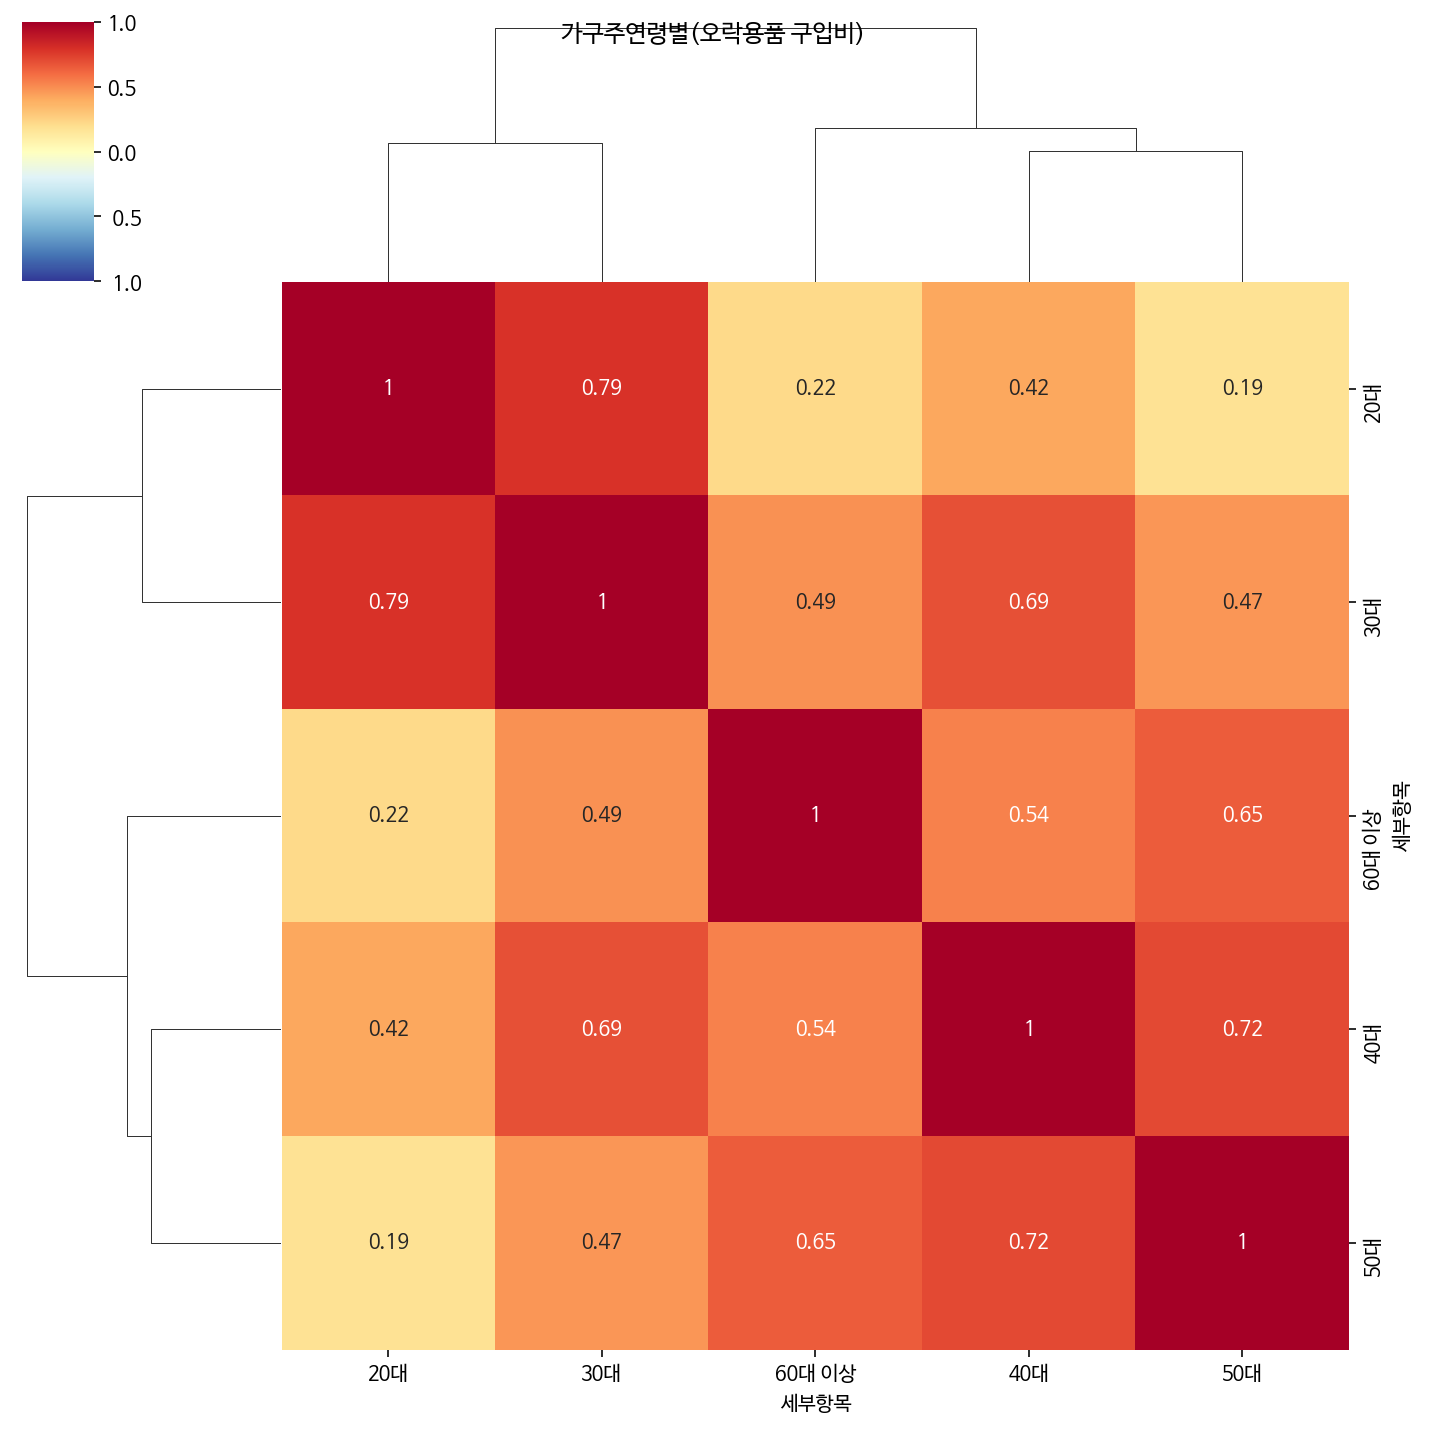

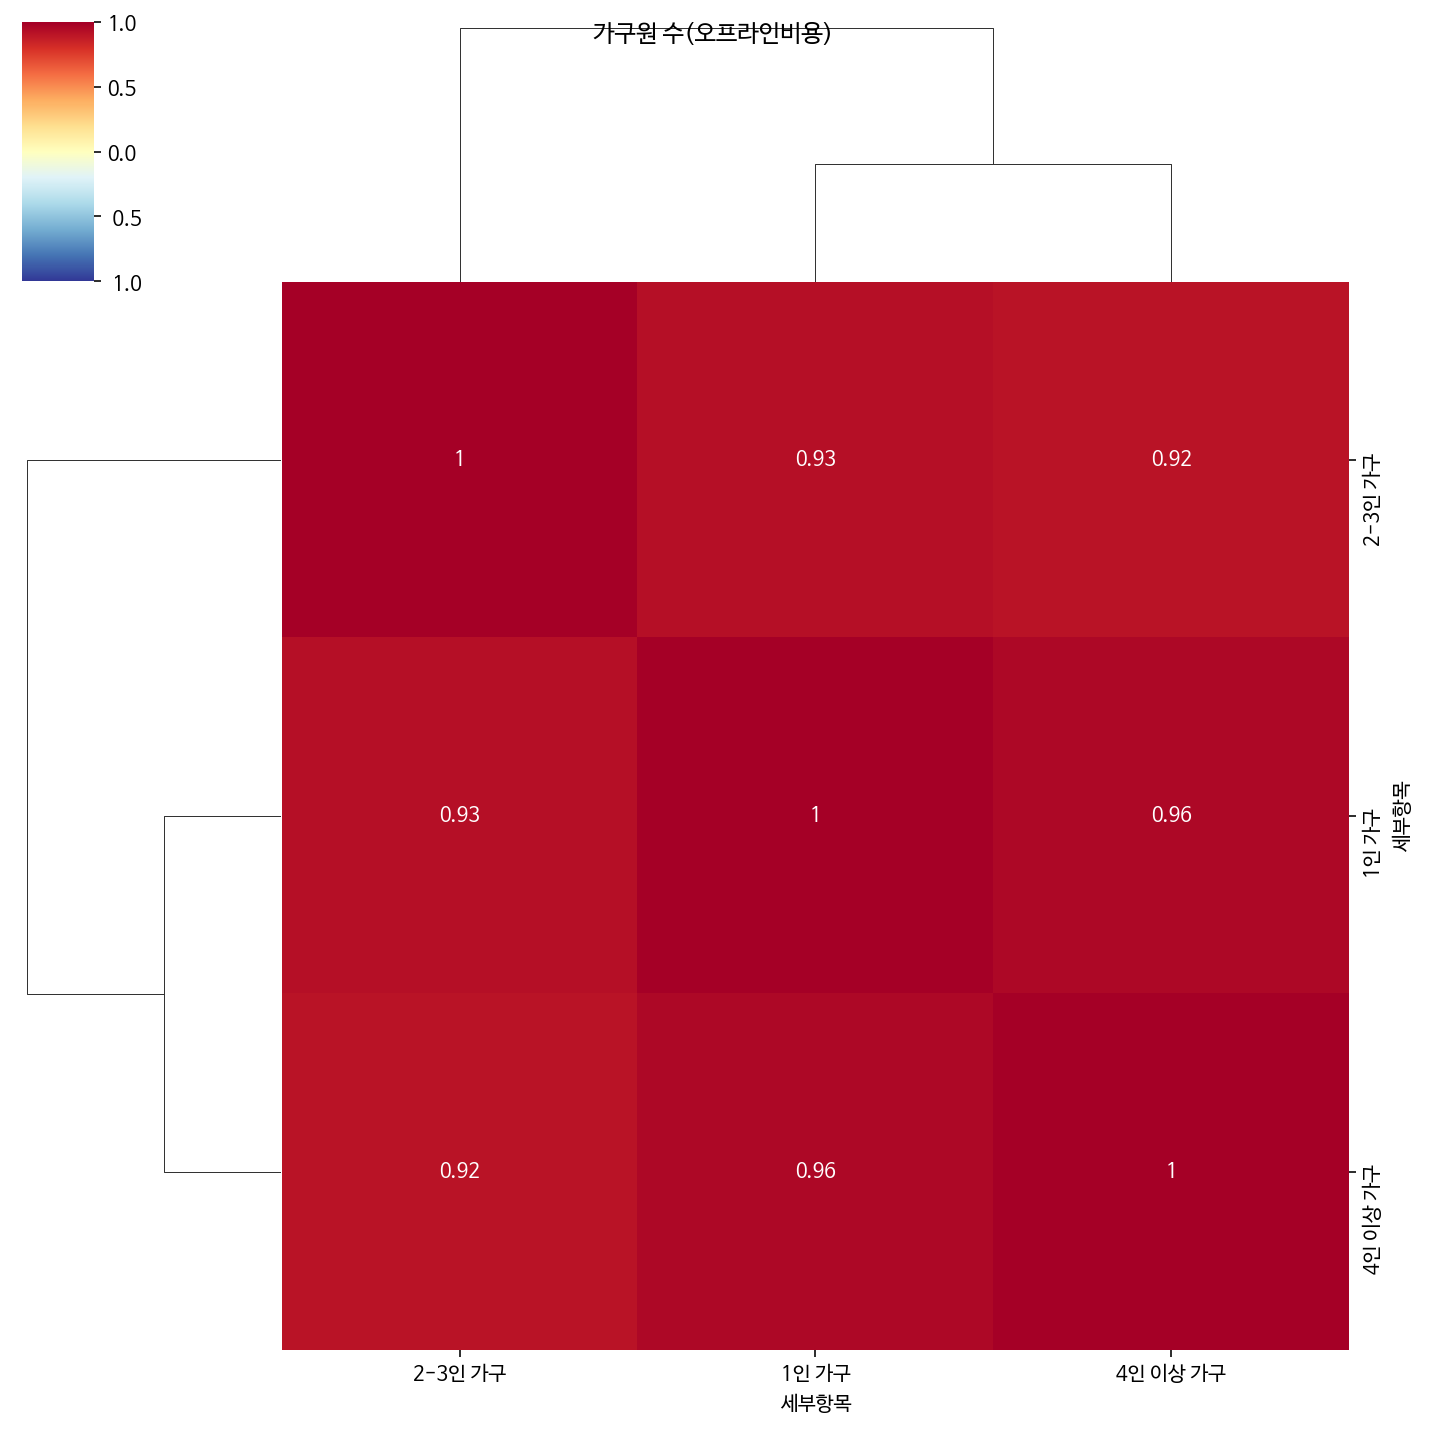

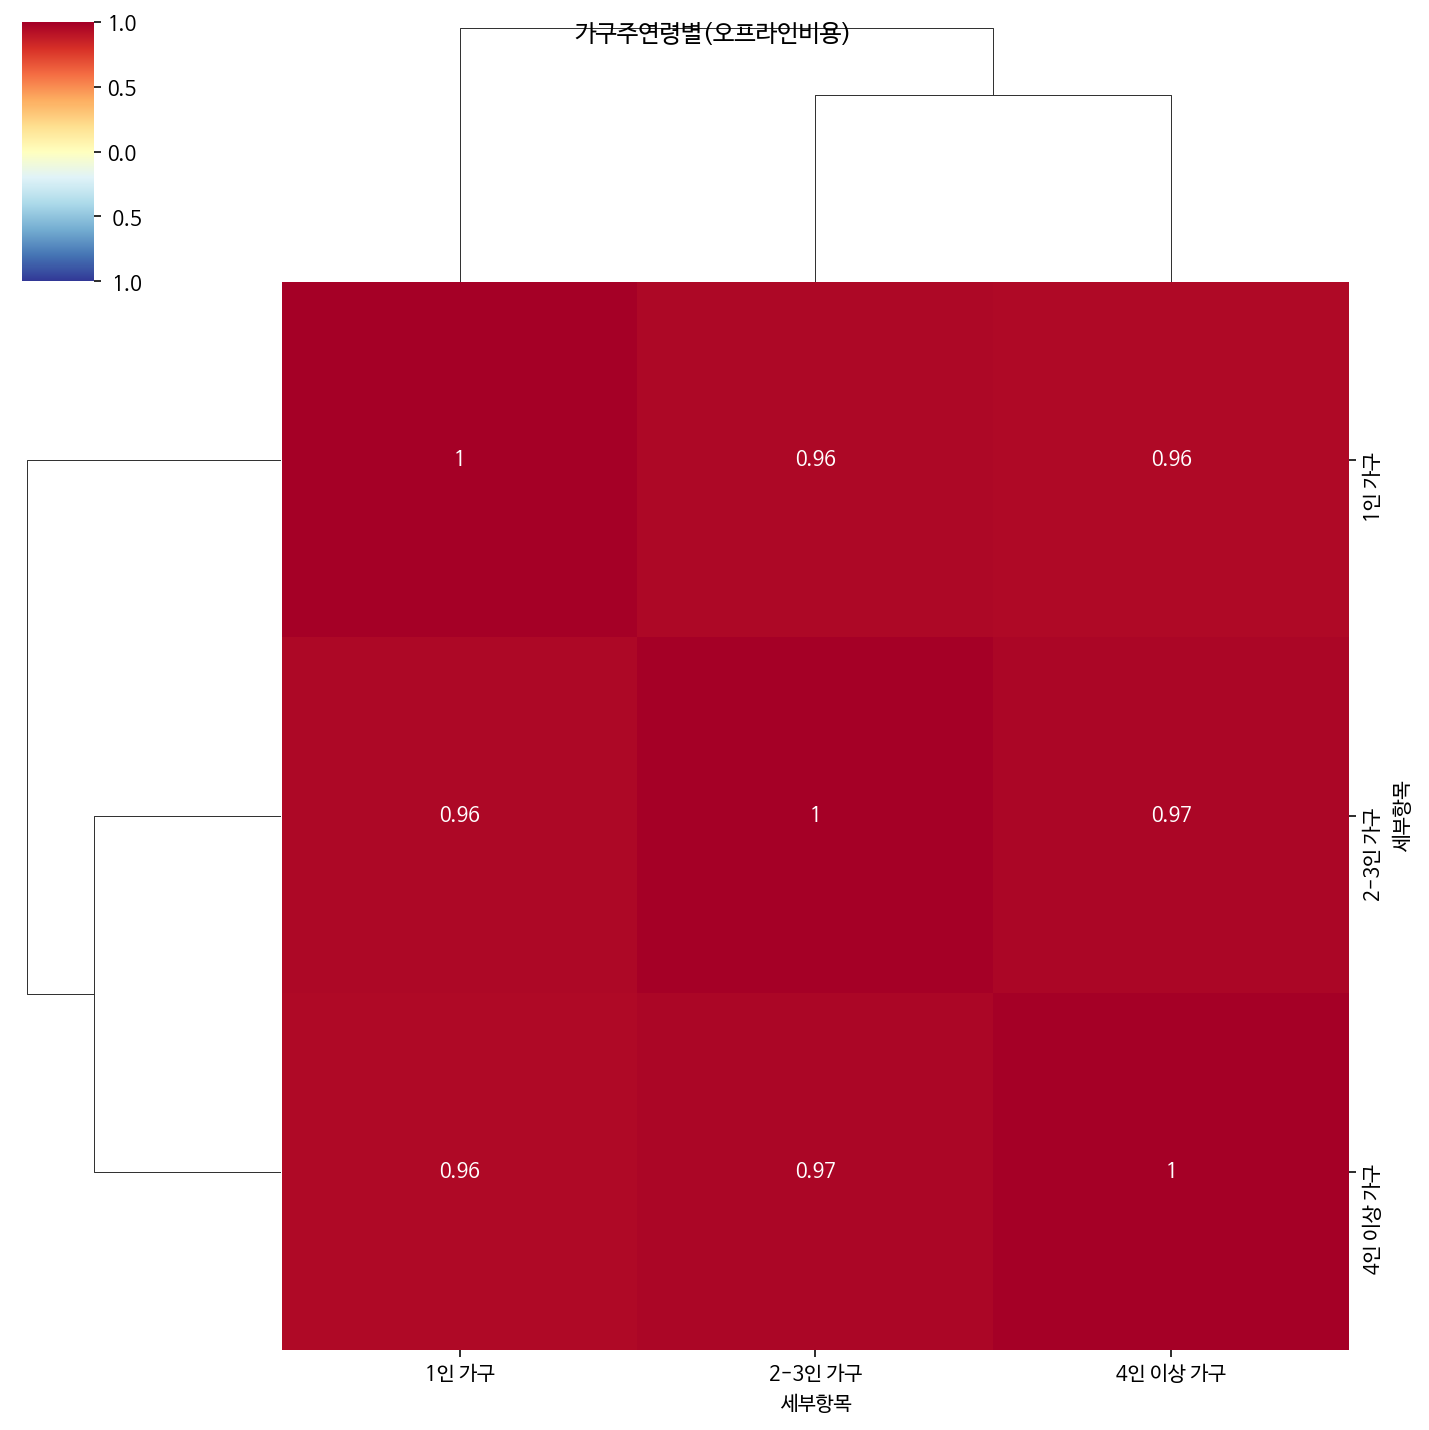

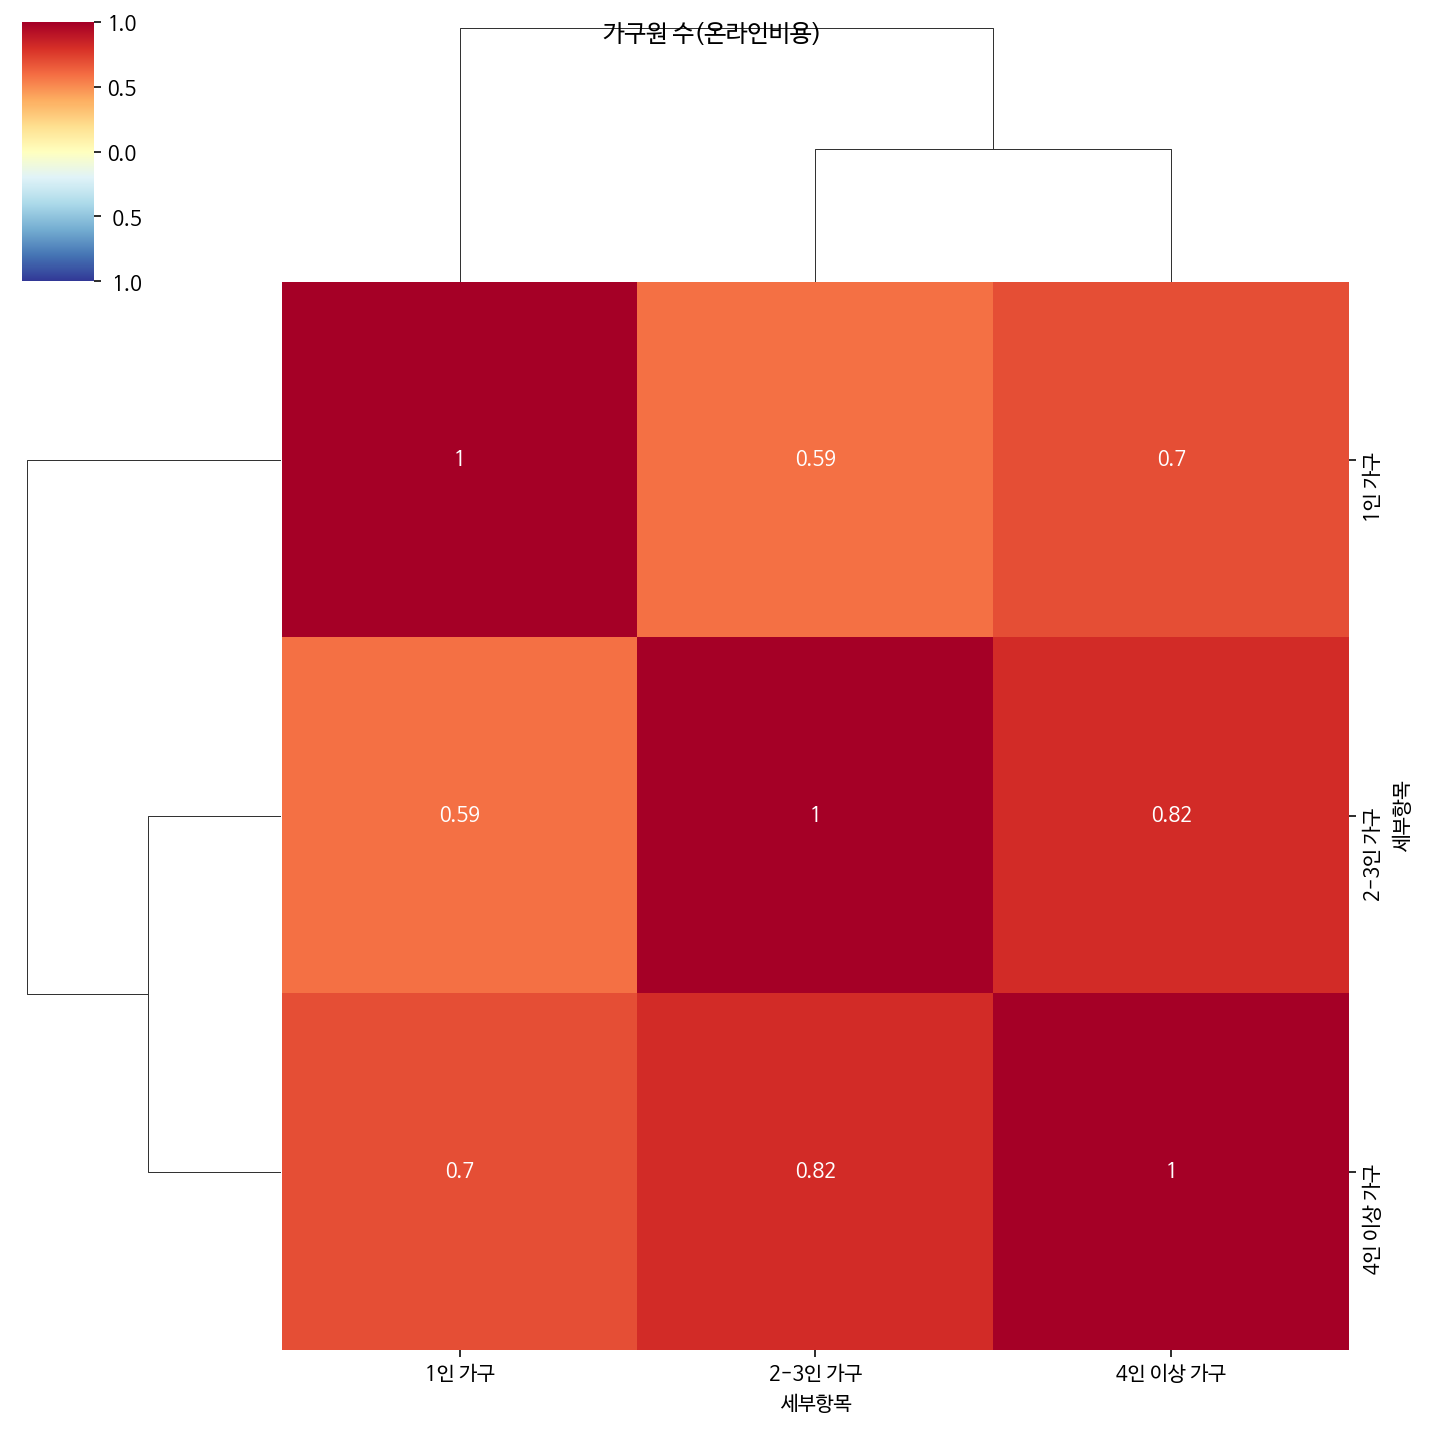

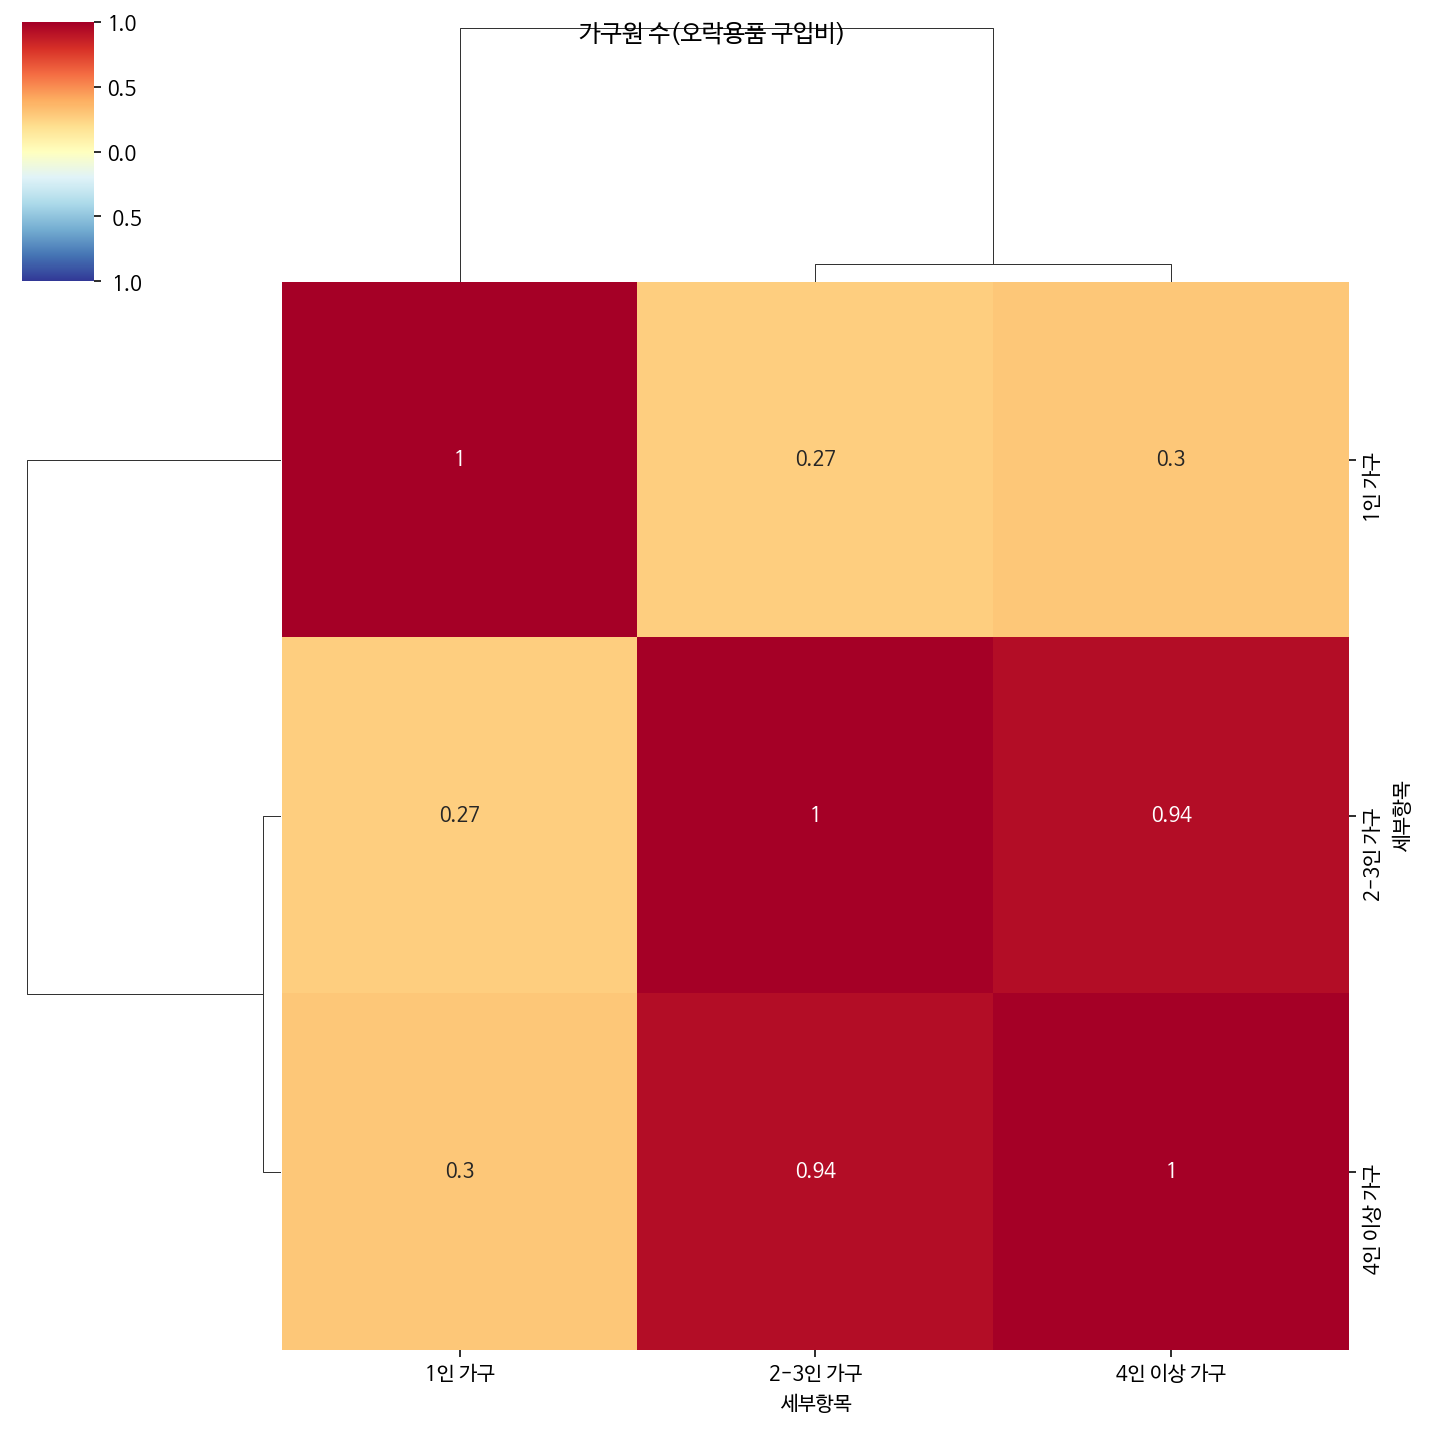

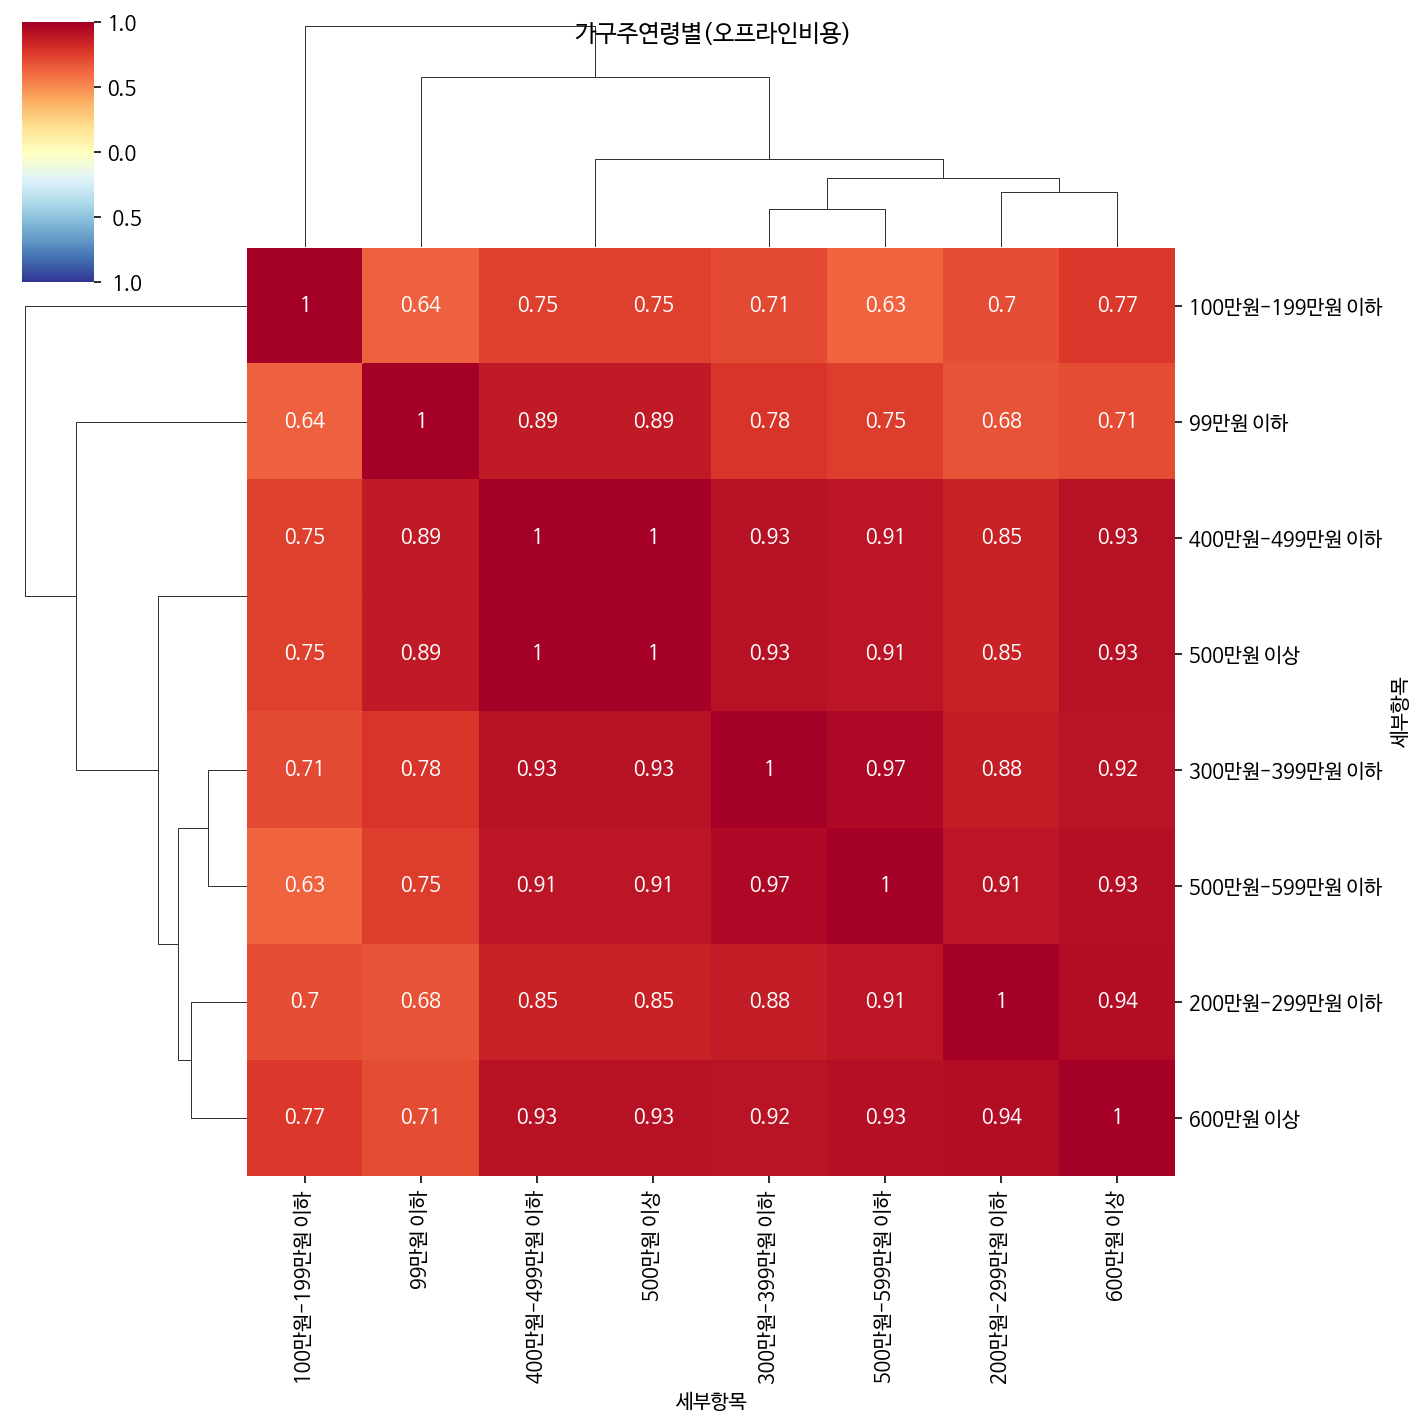

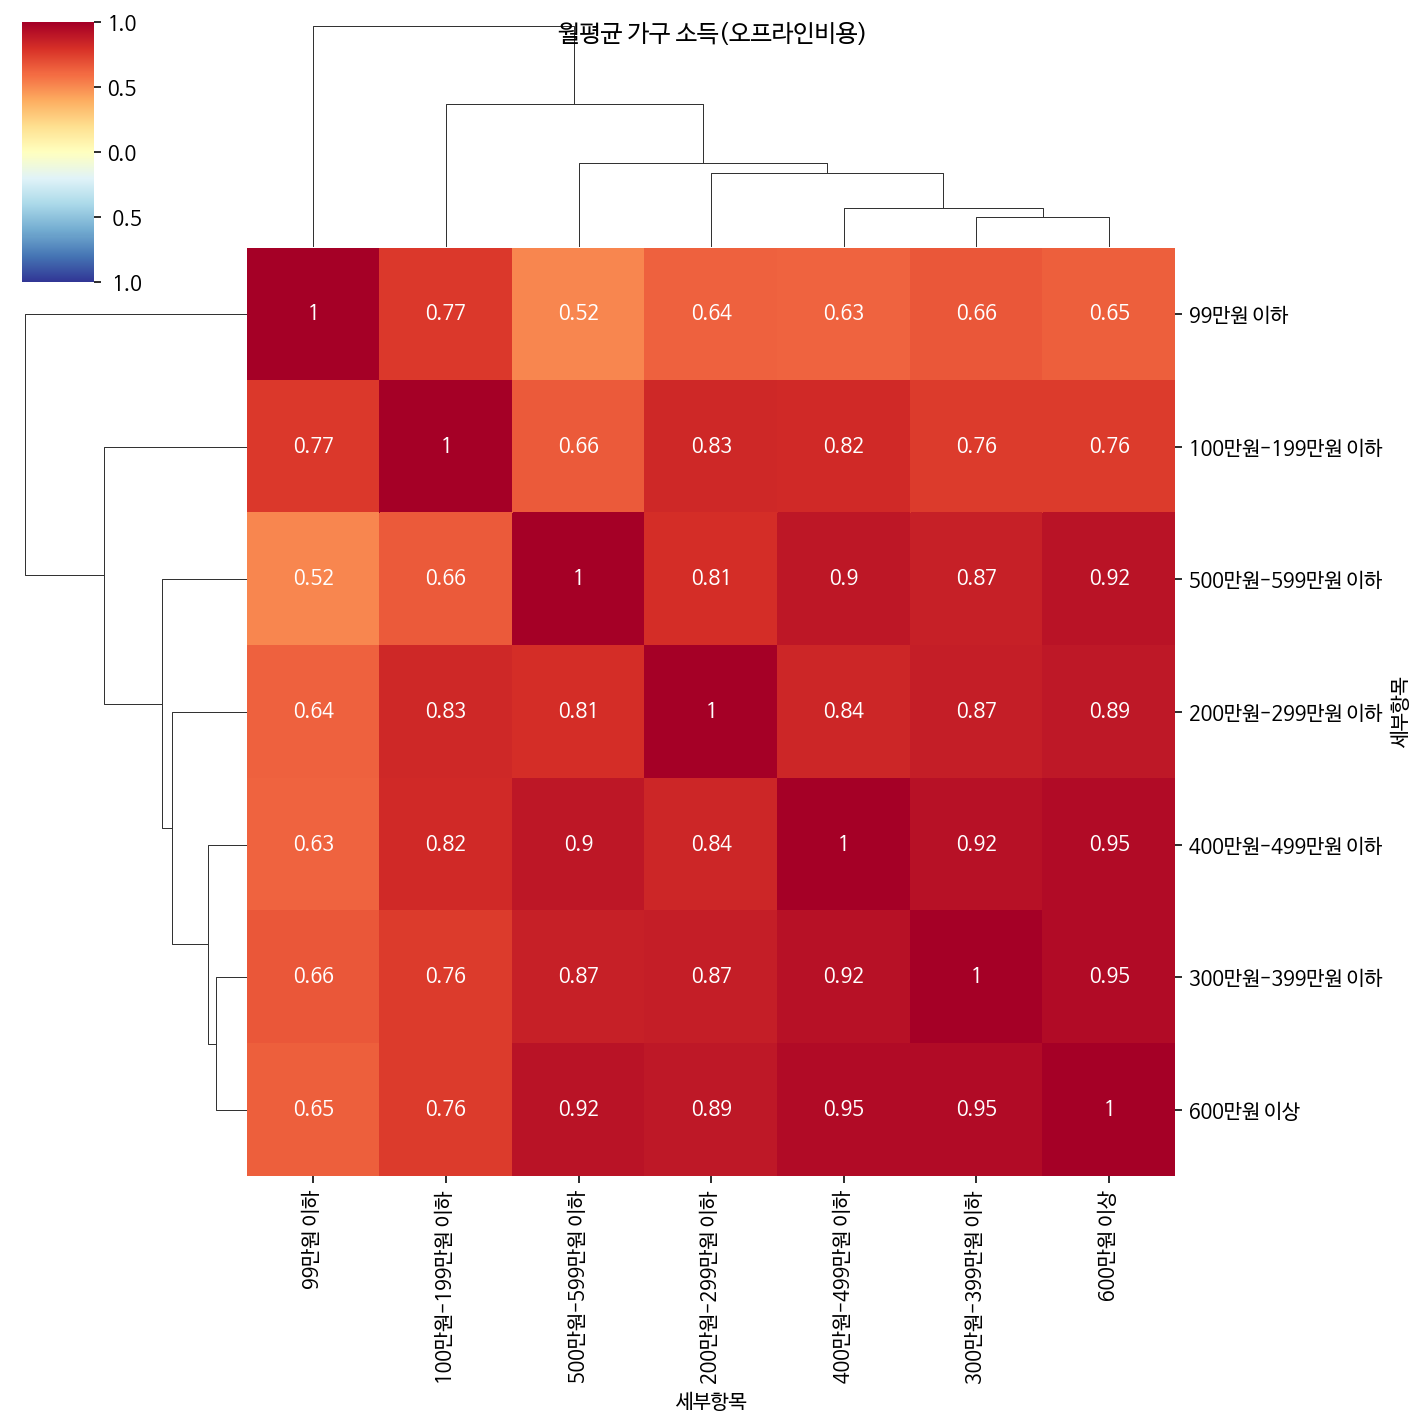

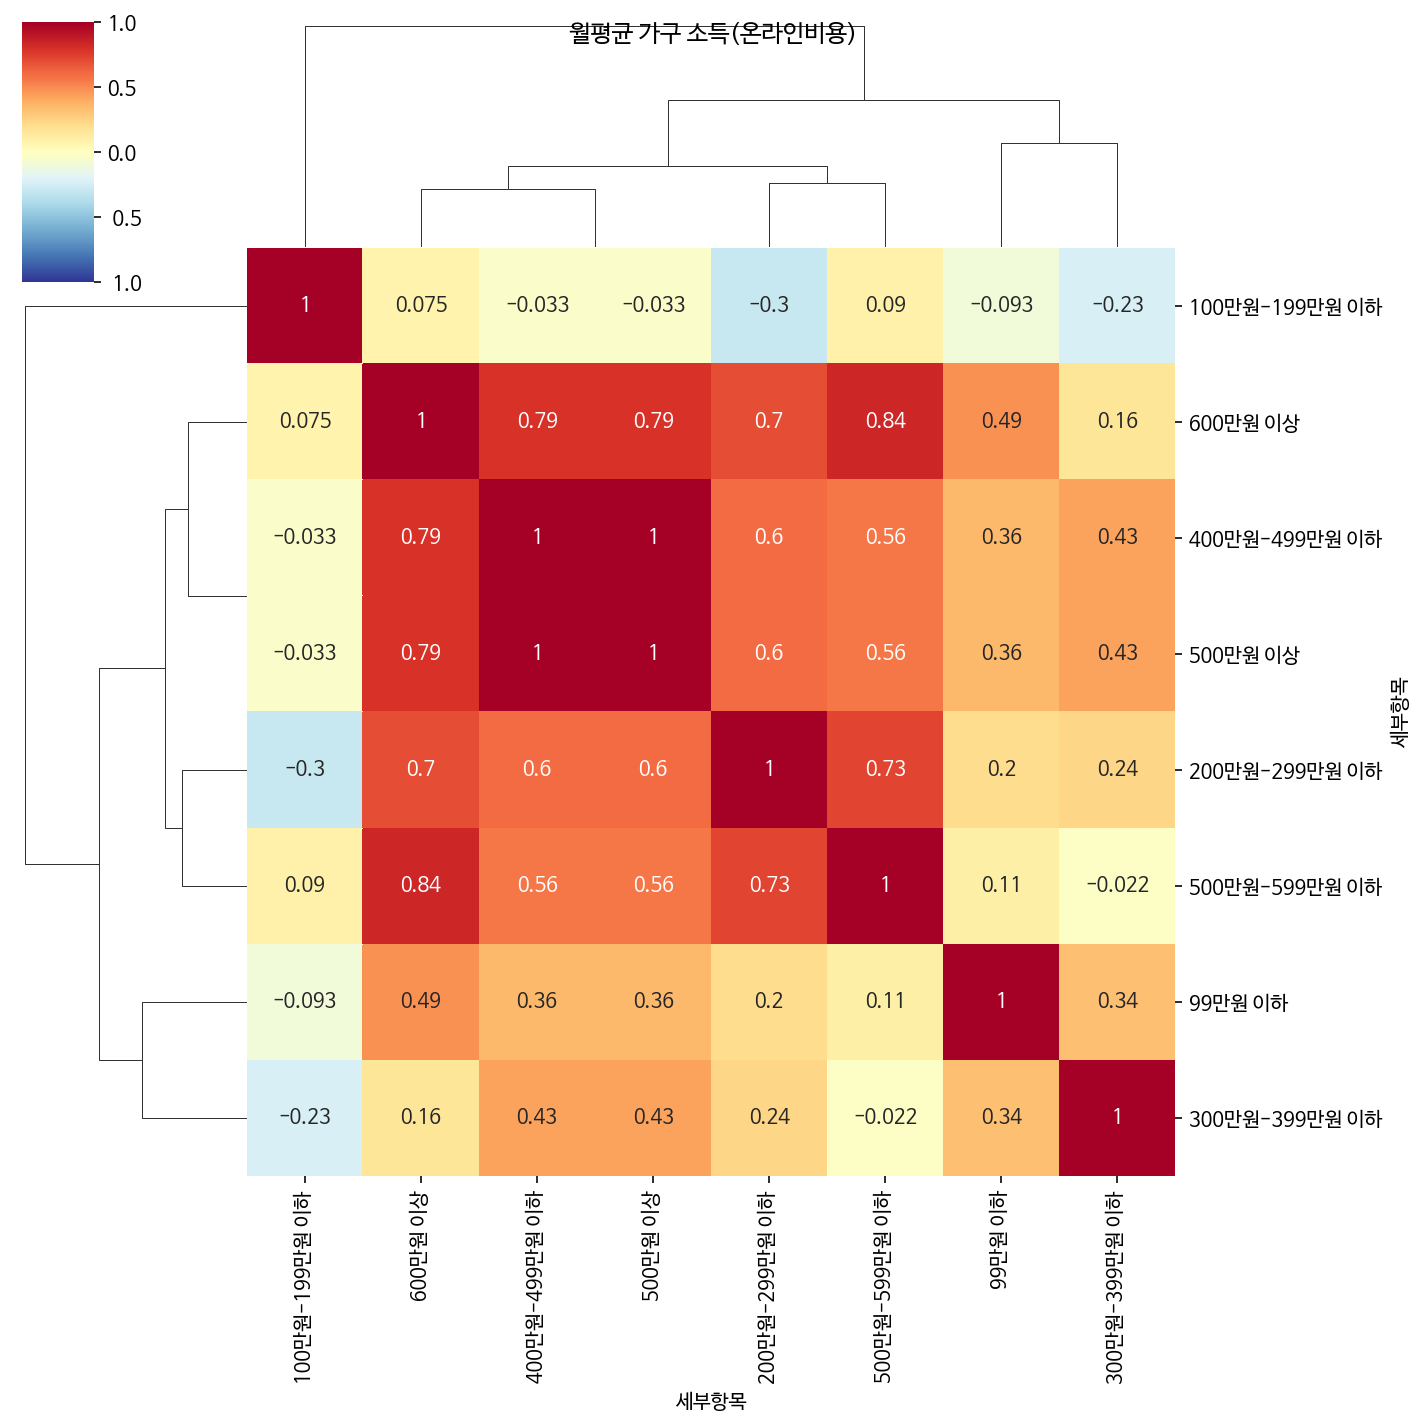

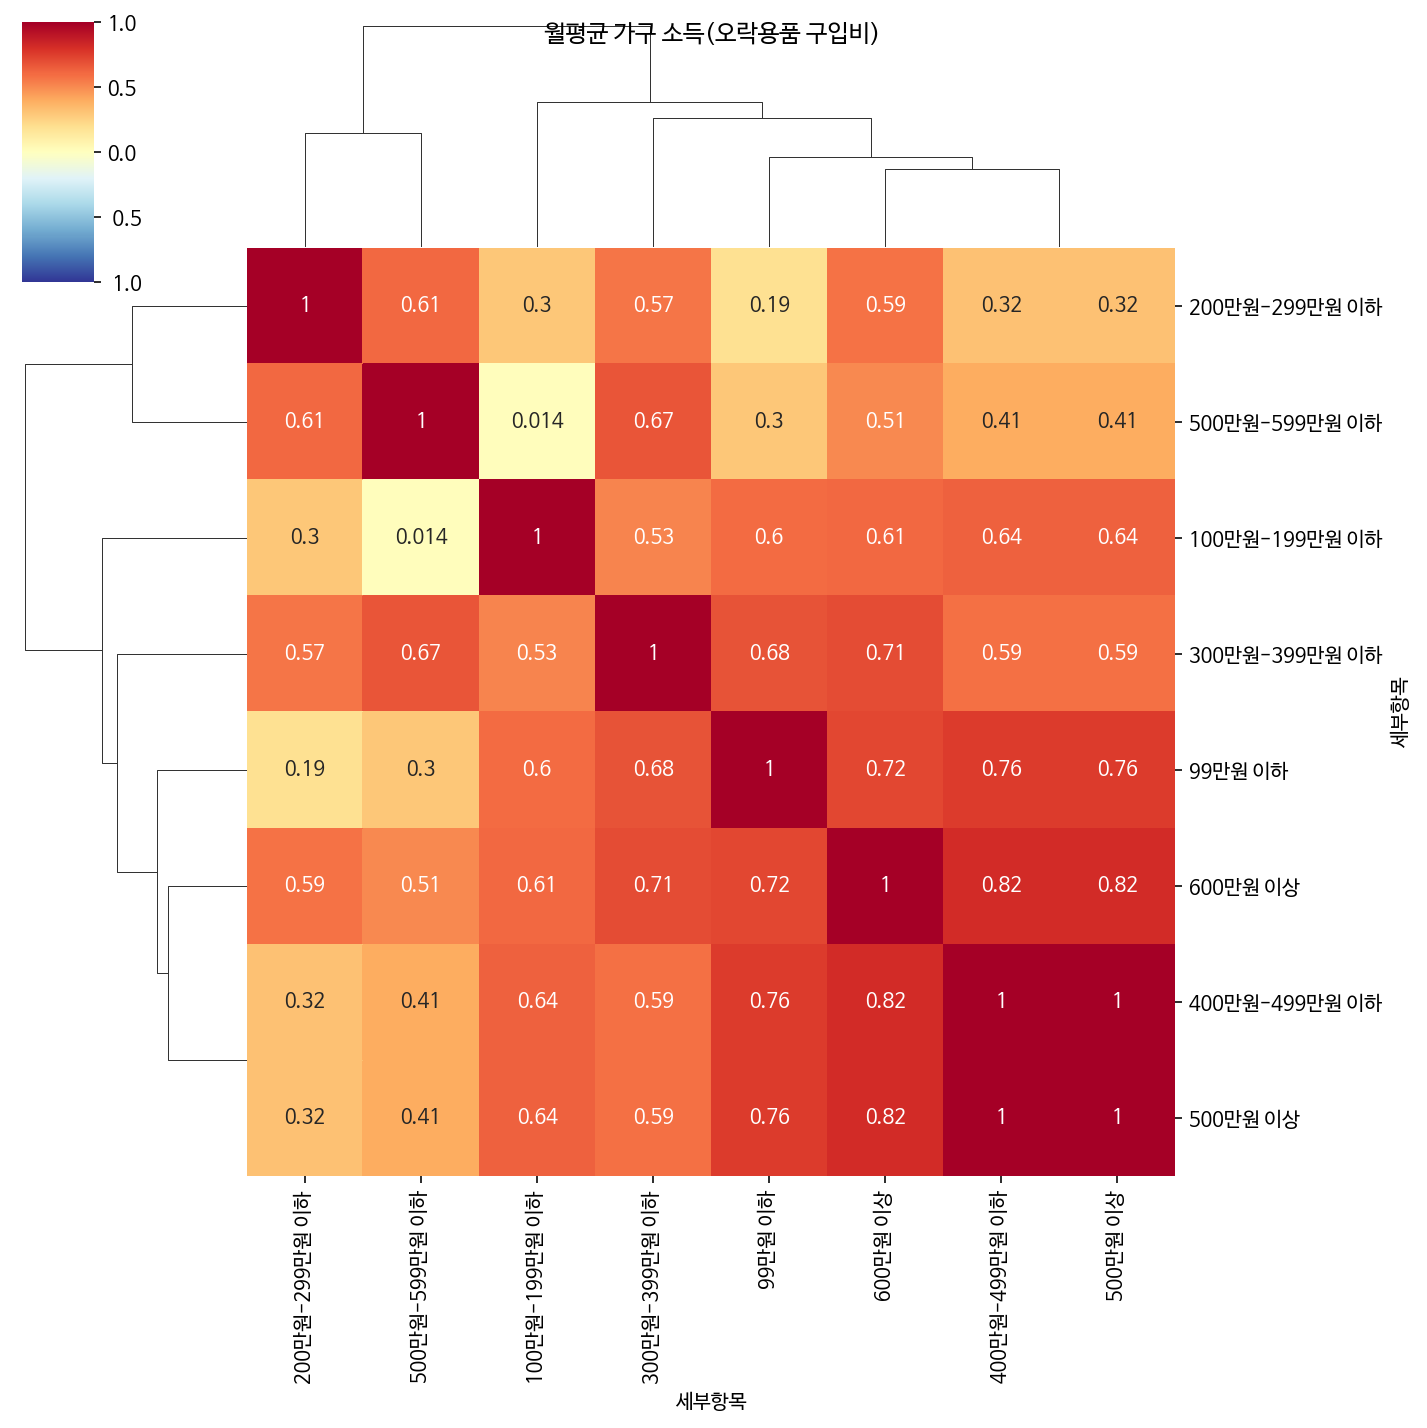

In [10]:



# 가구주연령별
df = future_family_age_off_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(오프라인비용)')

df = future_family_age_off_trip_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(해외 여행비)')

df = future_family_age_on_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(온라인비용)')

df = future_family_age_on_play_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(오락용품 구입비)')

# 가구원 수별

df = future_family_num_off_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구원 수(오프라인비용)')

df = future_family_num_off_trip_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(오프라인비용)')

df = future_family_num_on_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구원 수(온라인비용)')

df = future_family_num_on_play_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구원 수(오락용품 구입비)')

# 월평균 가구 소득

df = future_family_income_off_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('가구주연령별(오프라인비용)')

df = future_family_income_off_trip_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('월평균 가구 소득(오프라인비용)')

df = future_family_income_on_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('월평균 가구 소득(온라인비용)')

df = future_family_income_on_play_df.T.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              ).fig.suptitle('월평균 가구 소득(오락용품 구입비)')



## 3. 분기별 코로나 확진자 수

In [11]:
q_corona_df = pd.read_csv('/gdrive/MyDrive/likelion_CoronaCosumePattern_project1/data/new_cases_by_quater.csv', index_col='0')
q_corona_df.columns = ['순서', '확진자 수']
q_corona_df.index.names = ['분기']

q = q_corona_df['확진자 수']
nind = []
for ind in q_corona_df.index:
    ind = ind.split('_')
    print(ind)
    nind.append(ind[0]+'년 0'+ind[1]+'분기')
q_corona_df.index = nind
q_corona_df = q_corona_df.sort_values(by = '순서', ascending=False)
display(q_corona_df.info())
display(q_corona_df)

['2020', '1']
['2020', '2']
['2020', '3']
['2020', '4']
['2021', '1']
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2021년 01분기 to 2020년 01분기
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순서      5 non-null      int64  
 1   확진자 수   5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 120.0+ bytes


None

,순서,확진자 수
2021년 01분기,4,41319.0
2020년 04분기,3,37880.0
2020년 03분기,2,11039.0
2020년 02분기,1,3064.0
2020년 01분기,0,9785.0


### 3-1 분기별 코로나 확진자 시각화

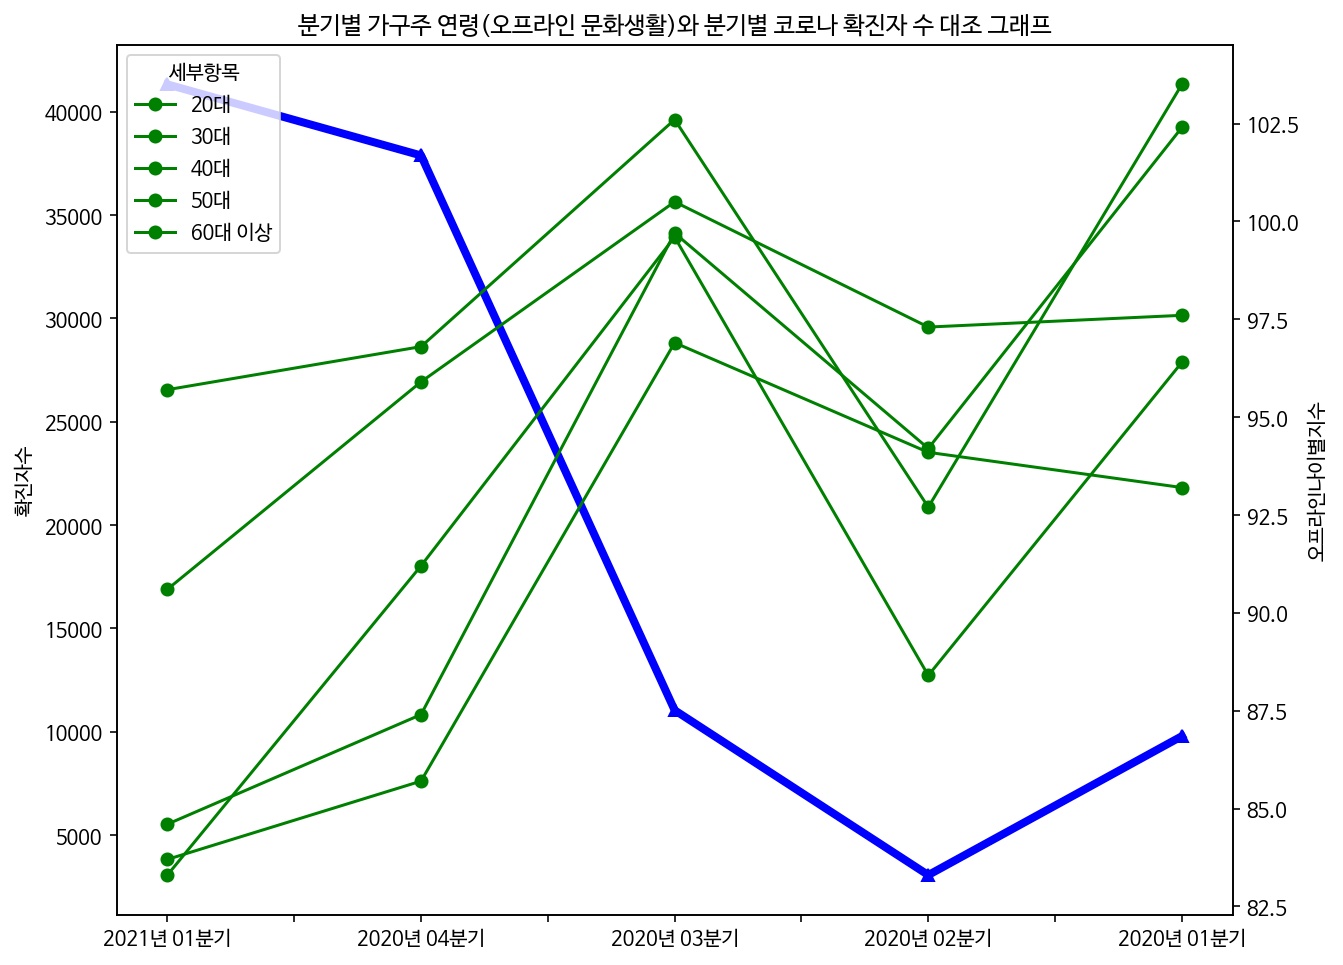

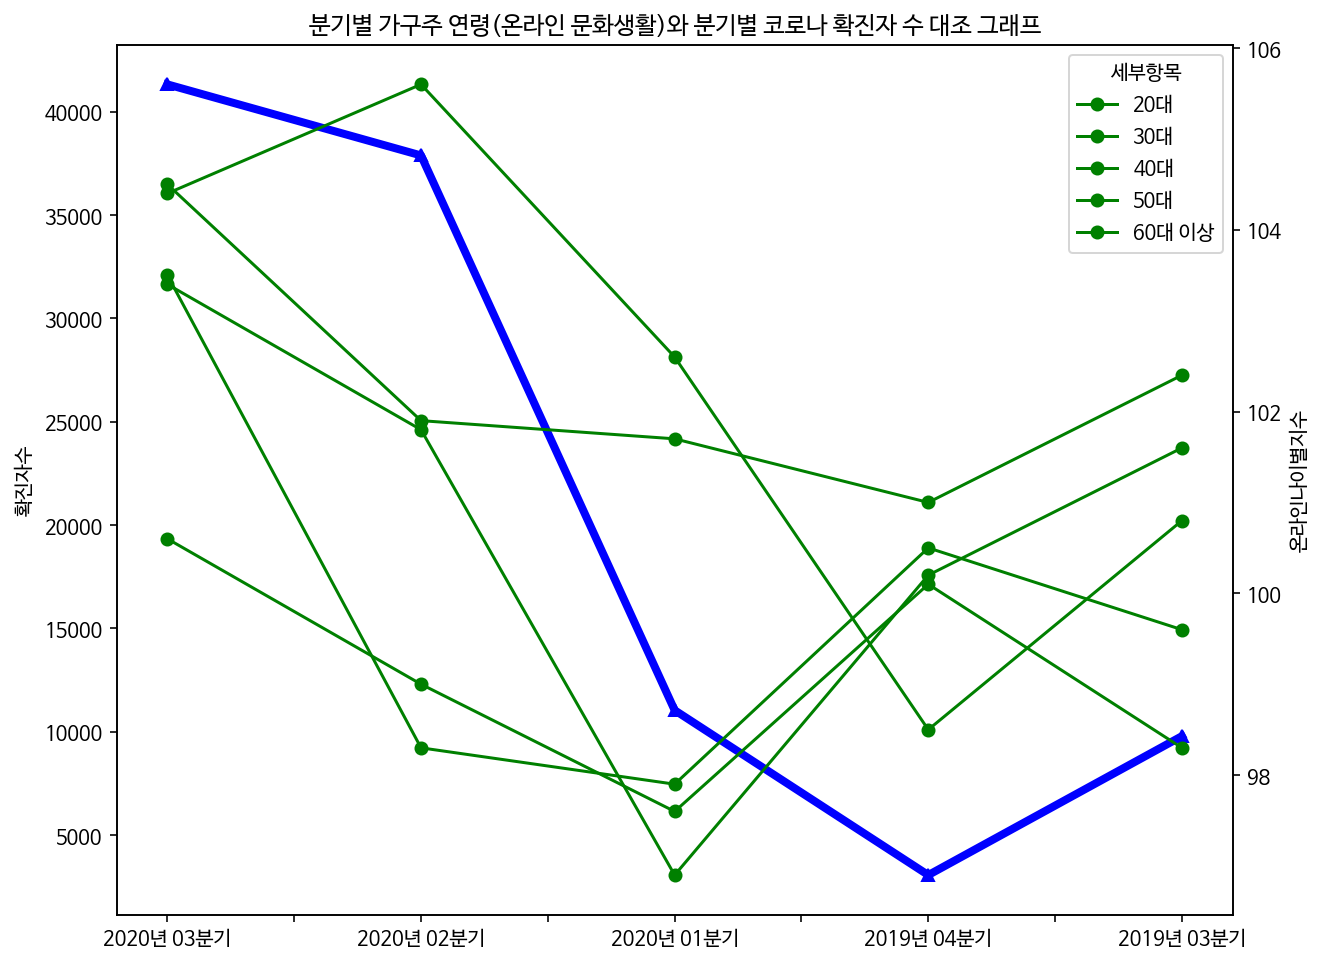

In [33]:
import seaborn as sns

dfx1 = q_corona_df['확진자 수']

dfx2 = future_family_age_off_df.iloc[0:, 0:5].T  # 가구주 연령 중 오프라인 문화생활비만 추출

fig, dx1 = plt.subplots() # 빈플롯과 그 설정 fig를 선언
fig.set_size_inches((10,8))
dx2 = dx1.twinx()   # dx1을 복사해서 dx2에 넣기(빈 subplot)
dx1.set_title("분기별 가구주 연령(오프라인 문화생활)와 분기별 코로나 확진자 수 대조 그래프")
dx1.set_ylabel('확진자수')
dx2.set_ylabel('오프라인나이별지수')

dfx1.plot(kind='line',color='blue',marker = '^',ax=dx1, linewidth=4.0) #dfx1 그래프 그리고 dx1 빈 플롯에 넣기
dfx2.plot(kind='line',color='green',marker = 'o',ax=dx2) #dfx2 그래프 그리고 dx2 빈 플롯에 넣기
plt.show()


dfx1 = q_corona_df['확진자 수']
dfx3 = future_family_age_on_df.iloc[0:, 2:7].T  # 가구주 연령 중 온라인 문화생활비만 추출


fig, dx1 = plt.subplots()
fig.set_size_inches((10,8))
dx1.set_title("분기별 가구주 연령(온라인 문화생활)와 분기별 코로나 확진자 수 대조 그래프")
dx2 = dx1.twinx()

dx1.set_ylabel('확진자수')
dx2.set_ylabel('온라인나이별지수')

width=0.4
dfx1.plot(kind='line',color='blue',marker = '^',ax=dx1,linewidth=4.0)
dfx3.plot(kind='line',color='green',marker = 'o', ax=dx2)
plt.show()

##4. 한국의 백신 현황

In [123]:
vc_corona_df = pd.read_csv('/gdrive/MyDrive/likelion_CoronaCosumePattern_project1/data/South Korea Vaccinations.csv', index_col='date')

display(vc_corona_df.info())
display(vc_corona_df)

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2021-02-25 to 2021-03-30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   location                 33 non-null     object
 1   vaccine                  33 non-null     object
 2   source_url               33 non-null     object
 3   total_vaccinations       33 non-null     int64 
 4   people_vaccinated        33 non-null     int64 
 5   people_fully_vaccinated  33 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.8+ KB


None

,location,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
date,,,,,,
2021-02-25,South Korea,Oxford/AstraZeneca,http://ncv.kdca.go.kr/,0,0,0
2021-02-26,South Korea,Oxford/AstraZeneca,http://ncv.kdca.go.kr/,18489,18489,0
2021-02-27,South Korea,Oxford/AstraZeneca,http://ncv.kdca.go.kr/,20322,20322,0
2021-02-28,South Korea,Oxford/AstraZeneca,http://ncv.kdca.go.kr/,21177,21177,0
2021-03-02,South Korea,Oxford/AstraZeneca,http://ncv.kdca.go.kr/,87428,87428,0
2021-03-03,South Korea,Oxford/AstraZeneca,http://ncv.kdca.go.kr/,154421,154421,0
2021-03-04,South Korea,Oxford/AstraZeneca,http://ncv.kdca.go.kr/,225853,225853,0
2021-03-05,South Korea,Oxford/AstraZeneca,http://ncv.kdca.go.kr/,296380,296380,0
2021-03-06,South Korea,Oxford/AstraZeneca,http://ncv.kdca.go.kr/,314656,314656,0


### 4-1 백신 총량, 1차, 2차 접종 인원 시각화 

,total_vaccinations,people_vaccinated,people_fully_vaccinated
date,,,
2021-02-25,0,0,0
2021-02-26,18489,18489,0
2021-02-27,20322,20322,0
2021-02-28,21177,21177,0
2021-03-02,87428,87428,0
2021-03-03,154421,154421,0
2021-03-04,225853,225853,0
2021-03-05,296380,296380,0
2021-03-06,314656,314656,0


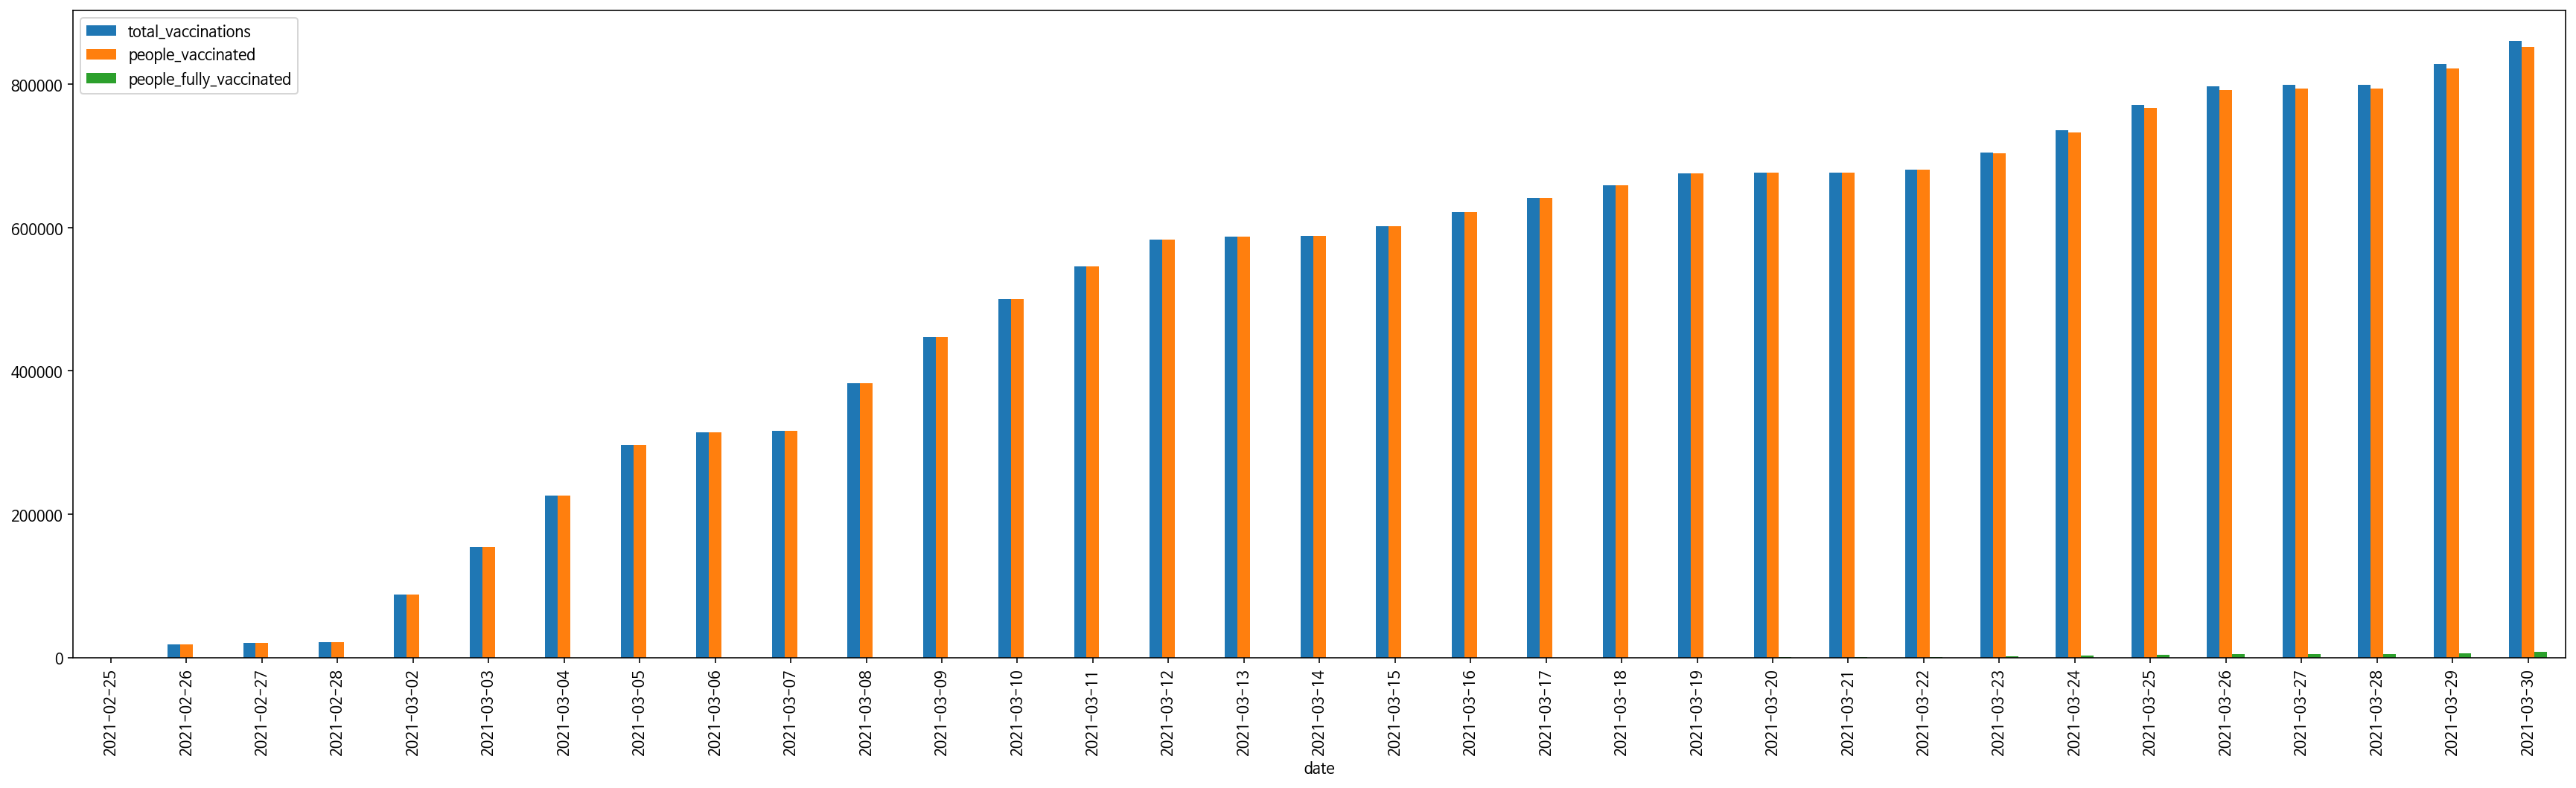

In [146]:
vced_corona_df = vc_corona_df[['total_vaccinations','people_vaccinated','people_fully_vaccinated']]

display(vced_corona_df)
# Dodged Bar Chart
vced_corona_df.plot(kind = 'bar', figsize=(30,8))

plt.show()

#sns.lineplot(data = vced_corona_df)

### 4-2 백신 확보 현황 시각화 

,total_vaccinations,vaccine
date,,
2021-02-25,0,Oxford/AstraZeneca
2021-02-26,18489,Oxford/AstraZeneca
2021-02-27,20322,Oxford/AstraZeneca
2021-02-28,21177,Oxford/AstraZeneca
2021-03-02,87428,Oxford/AstraZeneca
2021-03-03,154421,Oxford/AstraZeneca
2021-03-04,225853,Oxford/AstraZeneca
2021-03-05,296380,Oxford/AstraZeneca
2021-03-06,314656,Oxford/AstraZeneca


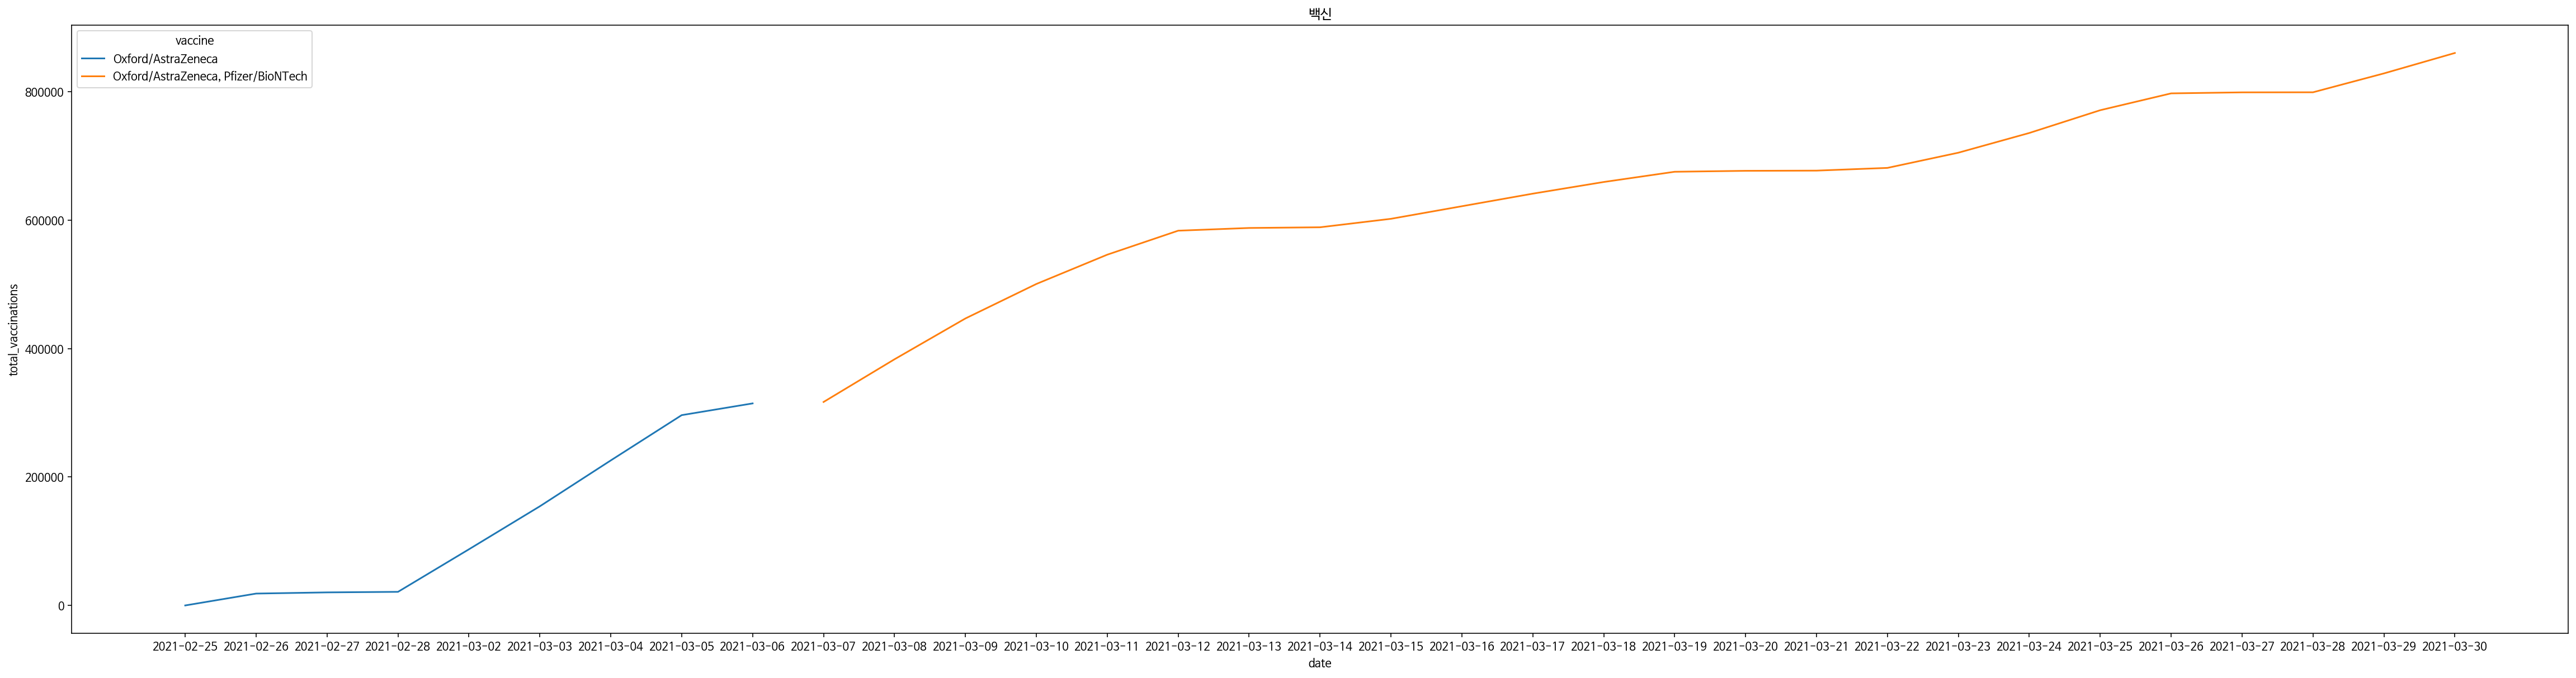

In [102]:
import seaborn as sns
get_vc_df = vc_corona_df[['total_vaccinations', 'vaccine']]
display(get_vc_df)
plt.figure(figsize=(40,10))
plt.title('백신')
sns.lineplot(x = get_vc_df.index , y = 'total_vaccinations' ,data = get_vc_df, hue = 'vaccine')